## Project Title:  Book Rating Prediction & Recommender System

## **ABSTRACT**


**Data Set Title:** Goodreads-Books

**URL:** https://www.kaggle.com/jealousleopard/goodreadsbooks

**Description:** I would like to develop a Machine Learning data model on the Kaggle Dataset “Goodreads-Books” (“https://www.kaggle.com/jealousleopard/goodreadsbooks”). Here I aim to develop a book rating prediction model and evaluate the model with necessary metrics.

**Introduction:** Goodreads is a social cataloging website which allows users to search books, annotations, and reviews. Ratings play a vital role for users in selection process. 


## **Problem Statement:** 
As rating will faciliate to identity best books, I aim to predict average rating for books. This will facilitate a quick glance on top rated books.

**Data Set Information:** The data set contains few features about books with which book rating could be predicted. 


**Columns data:**
1.	bookID: A unique Identification number for each book.
2.	Title: The name under which the book was published.
3.	Authors: Names of the authors of the book. Multiple authors are delimited with -.
4.	average_rating: The average rating of the book received in total.
5.	Isbn: Another unique number to identify the book, the International Standard Book Number.
6.	isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
7.	language_code: Helps understand what is the primary language of the book. For instance, eng is standard for English.
8.	No of num_pages: Number of pages the book contains.
9.	ratings_count: Total number of ratings the book received.
10.	text_reviews_count: Total number of written text reviews the book received.

**End Goal:** To develop a book rating prediction model and evaluate the model with necessary metrics, build a recommender system.

**Process:**
 I would like to perform the follow steps in the process as follows:
1.	Data collection
2.	Data cleaning and preprocessing
3.	Exploratory Data Analysis (EDA)
4.	Data visualization
5.	Data Modelling
6.	Model Evaluation

Firstly I begin with data collection and understand prominently the features and its basic information such as type. Based on the columns I would check if there is any possibility to preprocess the data and perform data cleaning. I would imply exploratory data techniques and get analysis of feature correlation with target features. I would use different plots such as box plot, scatter plot, line plots, histograms, bar charts as necessary to perform Data visualization for data analysis. Based on the analysis, I aim to develop a Machine Learning model which will predict the average rating of books. 

**Secodary data set:**  https://www.kaggle.com/zygmunt/goodbooks-10k
Data set contains 5 files as follows which contains ratings for ten thousand popular books. 
1.	Book_tags.csv ( 3 columns ) : This contains tags assigned by users to books.
2.	Books.csv ( 3 columns ) : This contain meta data of books.
3.	Ratings.csv ( 3 columns ) : This contains ratings information.
4.	Tags.csv ( 3 columns ) : This contains names which are translated from tag ID. 
5.	To_read.csv ( 3 columns ) : This contains IDs of books marked “to_read” by each user.

Using, these files I would like build a recommendation system on the data by relevant techniques as per data analysis and evaluate the model.

**References:**
1.	https://towardsdatascience.com/introducing-tf-ranking-f94433c33ff
2.	https://towardsdatascience.com/learning-to-rank-with-python-scikit-learn-327a5cfd81f
3.	https://medium.com/recombee-blog/machine-learning-for-recommender-systems-part-1-algorithms-evaluation-and-cold-start-6f696683d0ed
4.	https://www.researchgate.net/publication/309775673_A_random_forest_approach_for_rating-based_recommender_system




# IMPLEMENTATION

# Primary Data Set: Prediction System

# STEP 1 - DATA COLLECTION

In [0]:
#libraries
import numpy as np
import pandas as pd
import io
import seaborn as sns
from matplotlib import mlab
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error

In [0]:
#read data from URL - dataset is placed in the public folder
data = pd.read_csv('https://www.cs.odu.edu/~hchintha/Data/books.csv', error_bad_lines = False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [0]:
#view data
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [0]:
#No of rows , No of columns 
print("No of rows , No of columns :",data.shape)


No of rows , No of columns : (13714, 10)


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn                  13714 non-null object
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [0]:
data.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,22159.859195,3.930620,9.764017e+12,342.402727,1.776540e+04,533.632128
std,13700.926816,0.357893,3.987679e+11,252.650165,1.129572e+05,2529.006691
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.250000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,9.780613e+12,301.000000,6.305000e+02,40.000000
75%,33311.750000,4.130000,9.780940e+12,421.000000,4.742250e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


In [0]:
data.isnull()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
13709,False,False,False,False,False,False,False,False,False,False
13710,False,False,False,False,False,False,False,False,False,False
13711,False,False,False,False,False,False,False,False,False,False
13712,False,False,False,False,False,False,False,False,False,False


In [0]:
data.isnull().any()

bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
# num_pages           False
ratings_count         False
text_reviews_count    False
dtype: bool

# STEP 2 - DATA PREPROCESSING

In [0]:
#rename column name
data=data.rename(columns={"# num_pages": "num_pages"})

In [0]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


# **STEP 3 - EXPLORATORY DATA ANALYSIS**

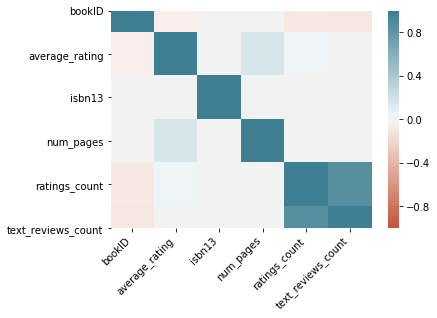

In [0]:
#correlation 
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Text(0.5, 0.98, ' Correlations Heat Map for attributes')

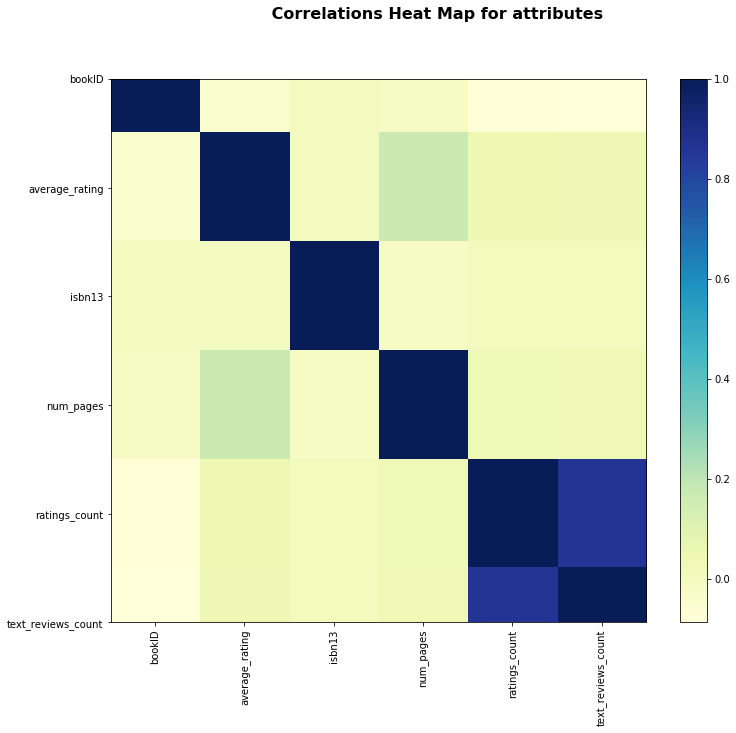

In [0]:
#correlation 
corltn=data.corr()
corltn=corltn.fillna(0)
plt.figure(figsize=(12, 10))
plt.imshow(corltn, cmap='YlGnBu', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corltn)), corltn.columns, rotation='vertical')
plt.yticks(range(len(corltn)), corltn.columns);
plt.suptitle(' Correlations Heat Map for attributes', fontsize=16, fontweight='bold')

**Note:** average rating is more correlated to # num_pages

 Range of average_rating :  $ 0.0  -  $ 5.0


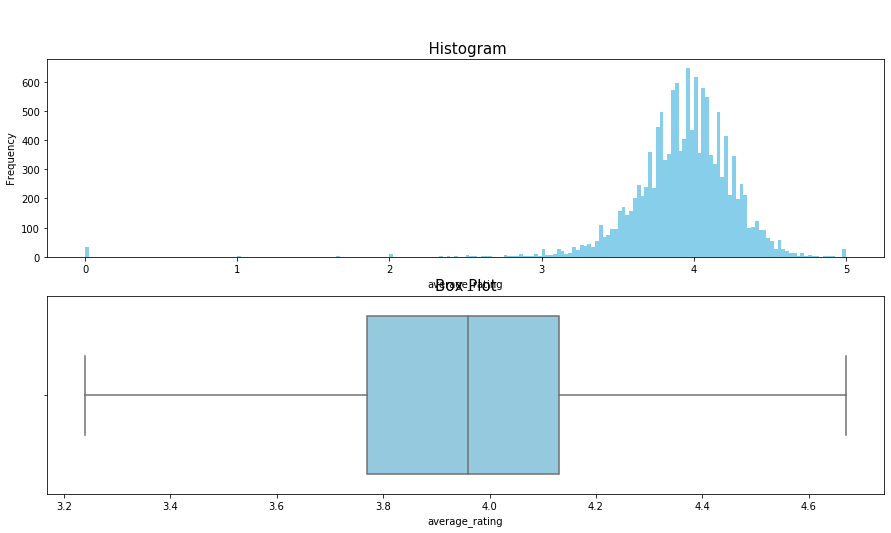

In [0]:
# average_rating column data analysis
print(" Range of average_rating : ",'$',data["average_rating"].min(), ' - ','$',data["average_rating"].max())
fig, ax = plt.subplots(2, 1, figsize = (15, 8))
ax[0].hist(data.average_rating, bins = 200, range = [min(data.average_rating), max(data.average_rating)], label = "average_rating",color = "skyblue")
ax[0].set_title("\n \n  Histogram ", fontsize = 15)
ax[0].set_xlabel("average_rating", fontsize = 10)
ax[0].set_ylabel(" Frequency ", fontsize = 10)
sns.boxplot(data.average_rating, showfliers = False, ax = ax[1],color = "skyblue")
ax[1].set_title("Box Plot", fontsize = 15)
plt.show()

**Note:** Major concentration of average rating is around 3.8 to 4.1

 Range of ratings_count :  $ 0  -  $ 93619


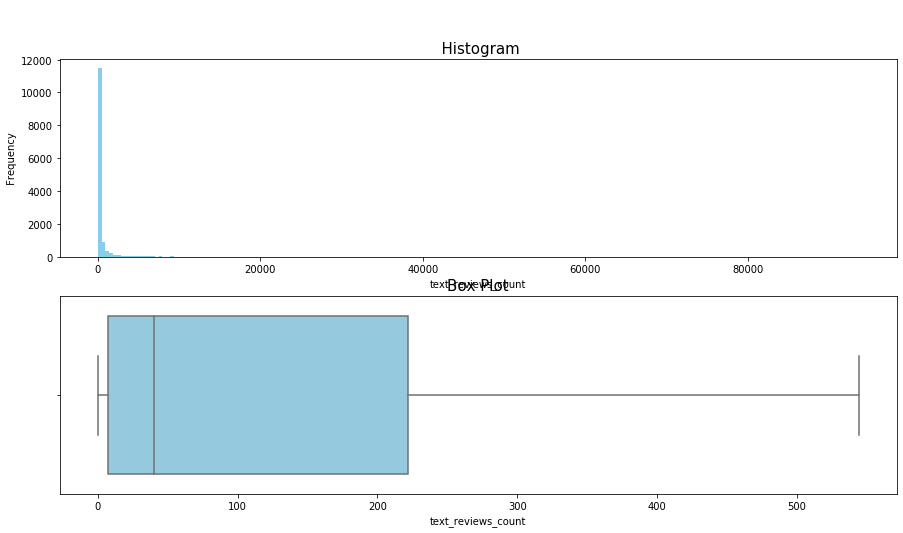

In [0]:
# ratings_count coulmn data analysis
print(" Range of ratings_count : ",'$',data["text_reviews_count"].min(), ' - ','$',data["text_reviews_count"].max())
fig, ax = plt.subplots(2, 1, figsize = (15, 8))
ax[0].hist(data.text_reviews_count, bins = 200, range = [min(data.text_reviews_count), max(data.text_reviews_count)], label = "text_reviews_count",color = "skyblue")
ax[0].set_title("\n \n  Histogram ", fontsize = 15)
ax[0].set_xlabel("text_reviews_count", fontsize = 10)
ax[0].set_ylabel(" Frequency ", fontsize = 10)
sns.boxplot(data.text_reviews_count, showfliers = False, ax = ax[1],color = "skyblue")
ax[1].set_title("Box Plot", fontsize = 15)
plt.show()

**Note:** Text review count is distributed untill 210



In [0]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [0]:
#view all columns
print("data",data.columns)
print("\n data.title.unique()",data.title.unique())
print("\n data['title'].size",data['title'].size)
print("\n data['title'].count()",data['title'].count())
print("\n data['title'].nunique()",data['title'].nunique())
print("\n data.authors.unique()",data.authors.unique())
print("\n data['authors'].size",data['authors'].size)
print("\n data['authors'].nunique()",data['authors'].nunique())
print("\n data['average_rating'].nunique()",data['average_rating'].nunique())
print("\n data['language_code'].nunique()",data['language_code'].nunique())

data Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

 data.title.unique() ['Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
 "Harry Potter and the Sorcerer's Stone (Harry Potter  #1)" ...
 'InterWorld (InterWorld  #1)' "The Faeries' Oracle"
 'The World of The Dark Crystal']

 data['title'].size 13714

 data['title'].count() 13714

 data['title'].nunique() 12422

 data.authors.unique() ['J.K. Rowling-Mary GrandPré' 'J.K. Rowling' 'W. Frederick Zimmerman' ...
 'Neil Gaiman-Michael Reaves' 'Brian Froud-Jessica Macbeth' 'Brian Froud']

 data['authors'].size 13714

 data['authors'].nunique() 7600

 data['average_rating'].nunique() 216

 data['language_code'].nunique() 30


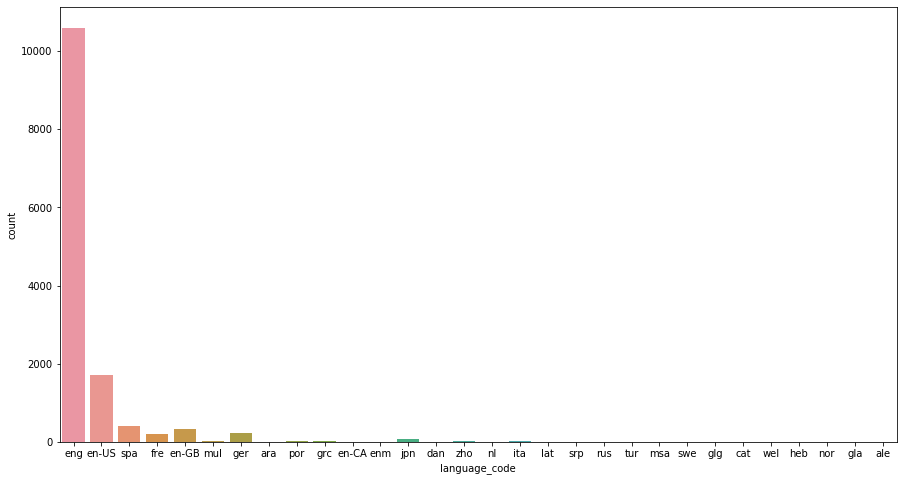

In [0]:
# language_code column data analysis
plt.figure(figsize=(15,8))
p = sns.countplot(data=data, x = 'language_code')

**Note:** Majority in english

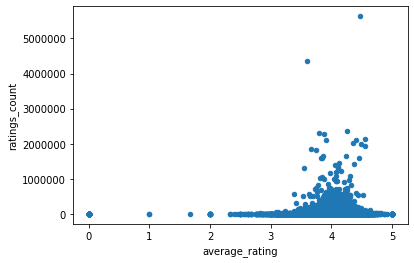

In [0]:
# average_rating and ratings_count relation
ax2 = data.plot.scatter(x='average_rating', y='ratings_count')

**Note:** Focused on average rating around 4 to rating count below 2000000

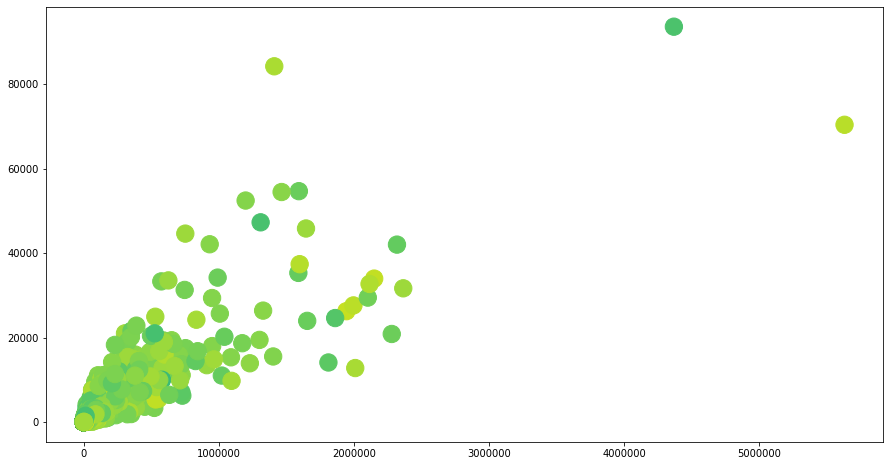

In [0]:
#ratings_count and text_reviews_count relation
plt.figure(figsize=(15,8))
plt.scatter(data.ratings_count, data.text_reviews_count, s=300, c=data.average_rating)

**Note:** average rating is distributed over below 100000 rating count and 20000 text review count

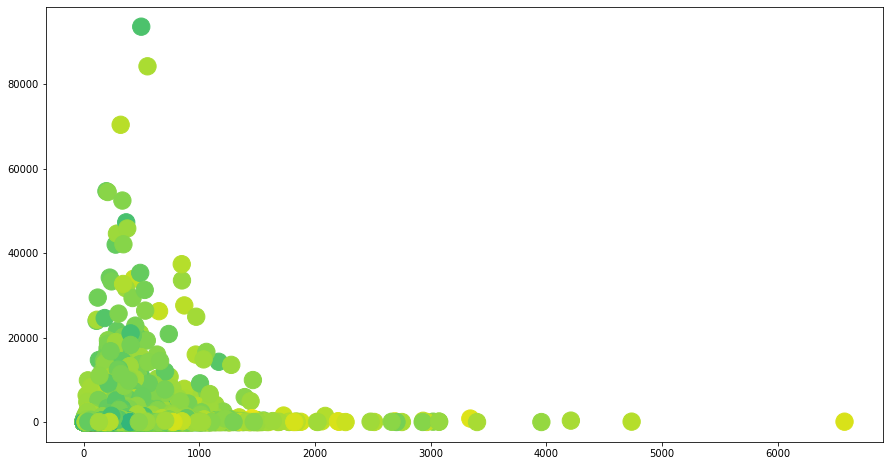

In [0]:
#num_pages and text_reviews_count relation
plt.figure(figsize=(15,8))
plt.scatter(data.num_pages, data.text_reviews_count, s=300, c=data.average_rating)

Note: average rating is around 1000 num of pages and 20000 text review count

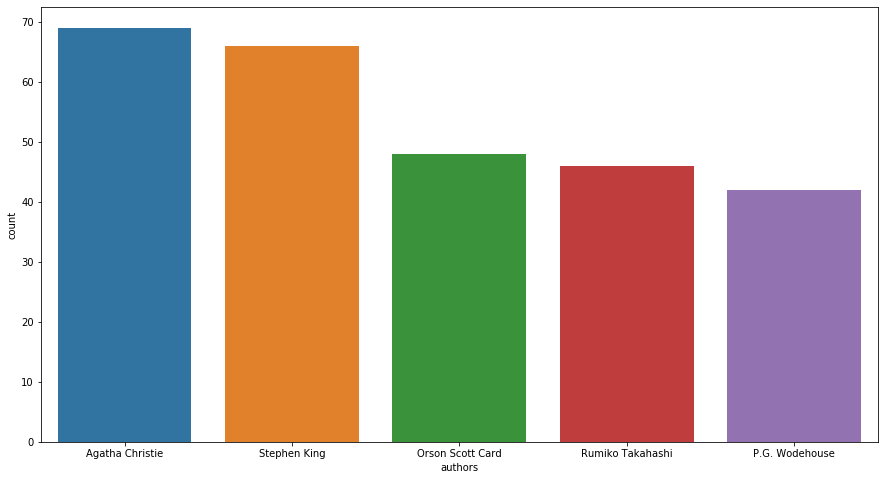

In [0]:
#top 5 authors
plt.figure(figsize=(15,8))
ax=sns.countplot(x = "authors", order=data['authors'].value_counts().index[0:5] ,data=data)

Unique authors : 7600


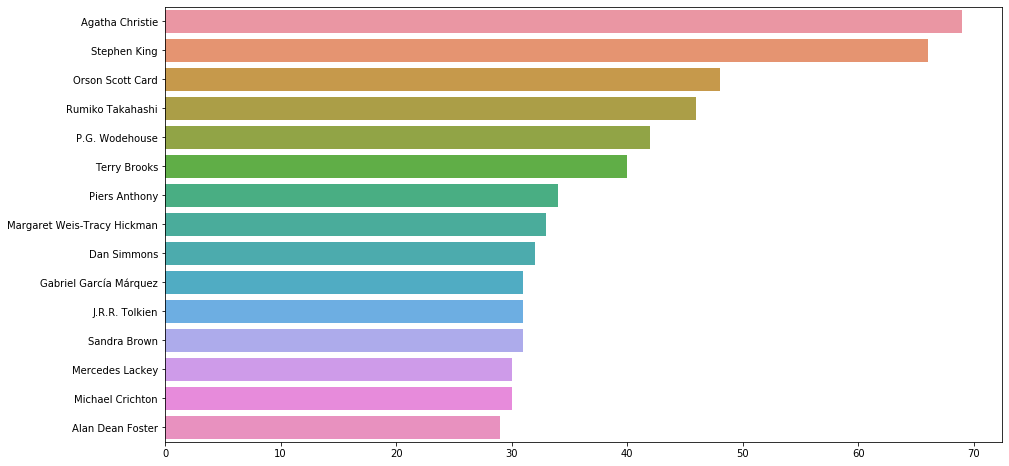

In [0]:
#top 15 authors
plt.figure(figsize=(15,8))
authors = data["authors"].value_counts()
print("Unique authors :", authors.size)
ax=sns.barplot(authors[0:15].values, authors[0:15].index)

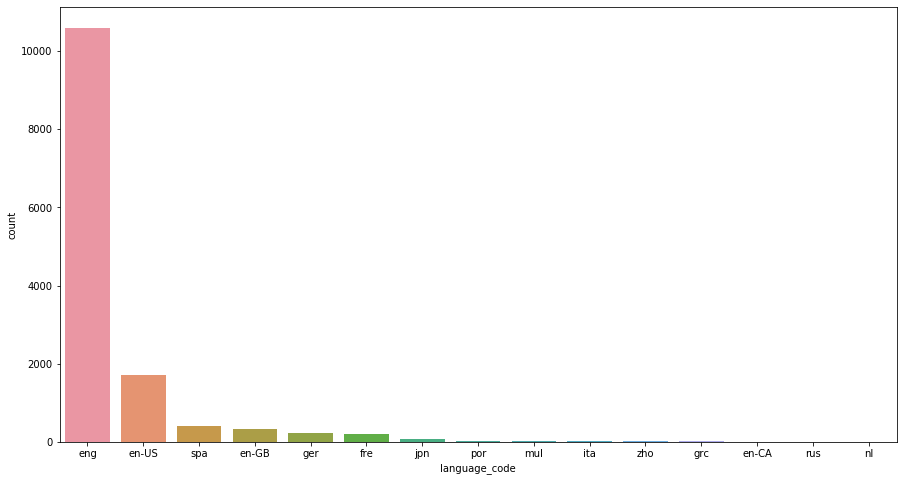

In [0]:
#top unique language code  
plt.figure(figsize=(15,8))
ax=sns.countplot(x = "language_code", order=data['language_code'].value_counts().index[0:15] ,data=data)

Unique language_code : 30


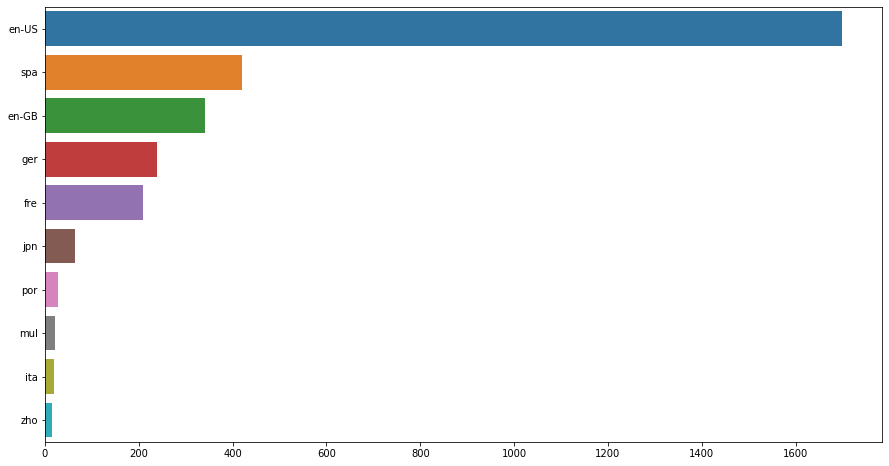

In [0]:
#top unique language code  
plt.figure(figsize=(15,8))
language_code = data["language_code"].value_counts()
print("Unique language_code :", language_code.size)
ax=sns.barplot(language_code[1:11].values, language_code[1:11].index)

Note: en-US is dominant

Unique title : 12422


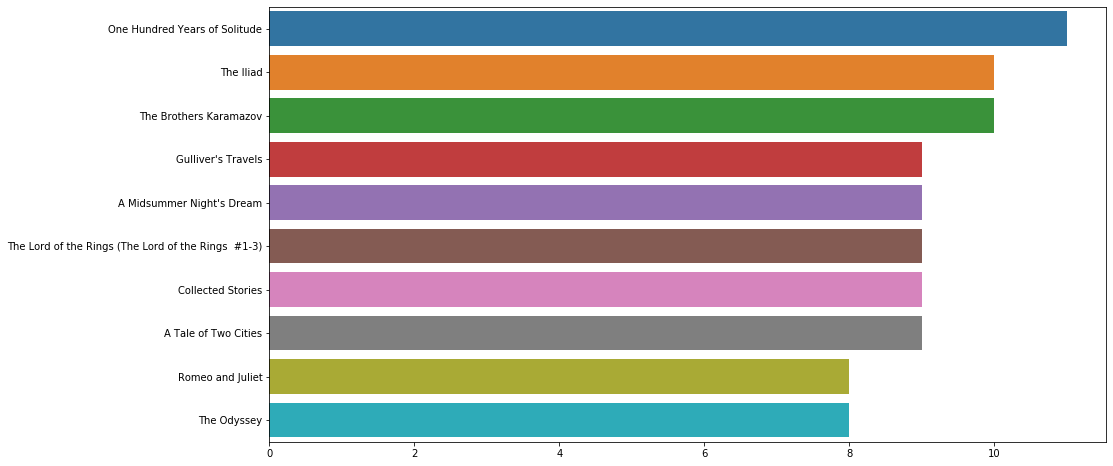

In [0]:
#top unique title
plt.figure(figsize=(15,8))
title = data["title"].value_counts()
print("Unique title :", title.size)
ax= sns.barplot(title[1:11].values, title[1:11].index)

Unique ratings_count : 12422


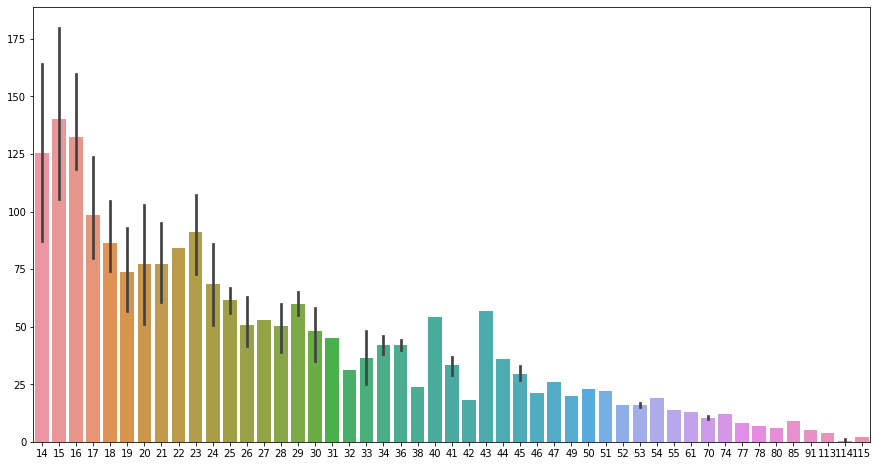

In [0]:
#top unique ratings_count
plt.figure(figsize=(15,8))
ratings_count = data["ratings_count"].value_counts()
print("Unique ratings_count :", title.size)
ax=sns.barplot(ratings_count[1:111].values, ratings_count[1:111].index)

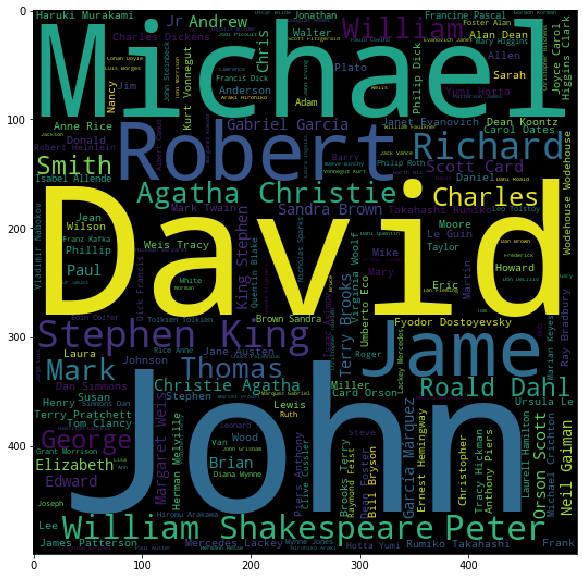

In [0]:
#analysis: size of each word indicates its frequency
wordcloud = WordCloud(width = 500, height = 500).generate(" ".join(data.authors.astype(str)))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.show()

Note: David and John is most frequently repeated.

In [0]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


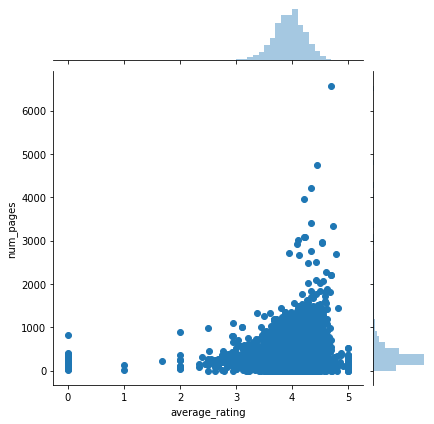

In [0]:
fig=sns.jointplot(x = 'average_rating', y = 'num_pages', data = data, kind='scatter')

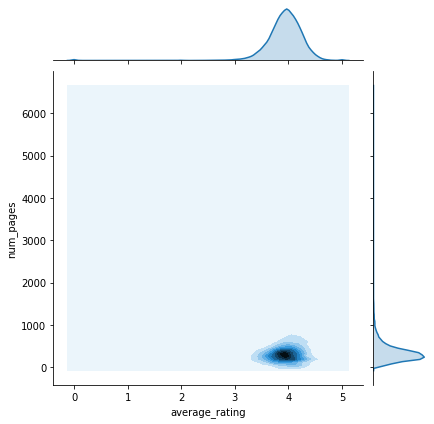

In [0]:
fig=sns.jointplot(x = 'average_rating', y = 'num_pages', data = data, kind='kde')

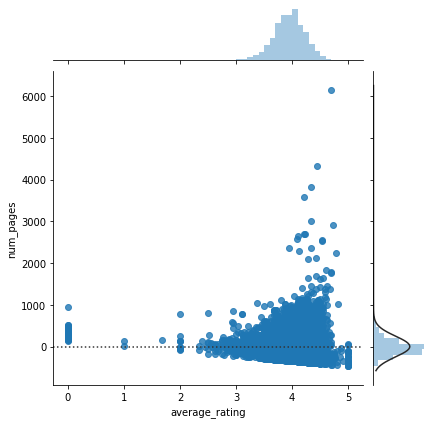

In [0]:
fig=sns.jointplot(x = 'average_rating', y = 'num_pages', data = data,kind='resid')

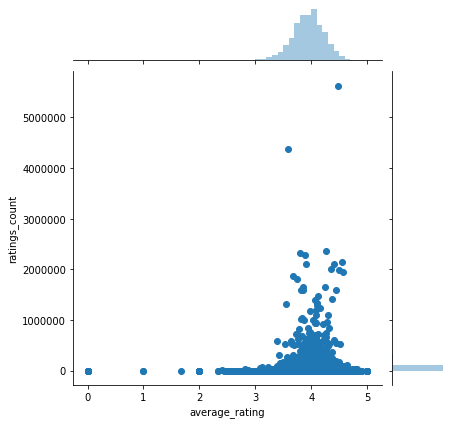

In [0]:
fig=sns.jointplot(x = 'average_rating', y = 'ratings_count', data = data, kind='scatter')

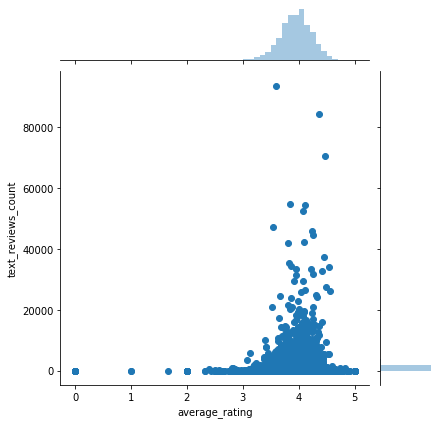

In [0]:
fig=sns.jointplot(x = 'average_rating', y = 'text_reviews_count', data = data, kind='scatter')

In [0]:
X= data['average_rating']

# STEP 4 - DATA MODELLING

In [0]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [0]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

In [0]:
X=data[['bookID', 'title', 'authors', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count']]

In [0]:
X.head()

,bookID,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,043965548X,9780439655484,eng,435,2149872,33964


In [0]:
y=data['average_rating']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [0]:
X=X.drop(['language_code'],axis=1)

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 8 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
isbn                  13714 non-null object
isbn13                13714 non-null int64
num_pages             13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: int64(5), object(3)
memory usage: 857.2+ KB


In [0]:
le = preprocessing.LabelEncoder()
X['title'] = le.fit_transform(X['title'])

In [0]:
X['authors'] = le.fit_transform(X['authors'])

In [0]:
X.head()

,bookID,title,authors,isbn,isbn13,num_pages,ratings_count,text_reviews_count
0,1,3718,3024,0439785960,9780439785969,652,1944099,26249
1,2,3719,3024,0439358078,9780439358071,870,1996446,27613
2,3,3722,3024,0439554934,9780439554930,320,5629932,70390
3,4,3716,3018,0439554896,9780439554893,352,6267,272
4,5,3721,3024,043965548X,9780439655484,435,2149872,33964


## Model 1 : Linear Regression

In [0]:
X=X.drop(['isbn'],axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [0]:
regr = linear_model.LinearRegression()
y_train = y_train[:, np.newaxis]
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10971, 7)
(10971, 1)
(2743, 7)
(2743,)


# STEP 5 - MODEL EVALUATION

**Mean Square Error:**
* Measures average squared error of our predictions.
* For each point, it calculates square difference between the predictions and the target and then average those values.

**Root Mean Square Error:**
* RMSE is just the square root of MSE.
* It make scale of the errors to be the same as the scale of targets.

**Mean Absolute Error:**
* Average of absolute differences between the target values and the predictions. 
* Linear score which means that all the individual differences are weighted equally in the average.


**Reference:**

[Which metrics is better ?](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)

[Right evaluation metrics](https://towardsdatascience.com/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-1-regrression-metrics-3606e25beae0)



In [0]:
y_predict = regr.predict(X_test)
print("Mean squared error: ",mean_squared_error(y_test,y_predict))

Mean squared error 0.10443235598106729


In [0]:
print("Root mean square error: ",np.sqrt(mean_squared_error(y_test,y_predict)))

Root mean square error:  0.3231599541729564


In [0]:
print("Mean absolute error: ",mean_absolute_error(y_test, y_predict))

0.22458068486219945


In [0]:
X.head()

,bookID,title,authors,isbn13,num_pages,ratings_count,text_reviews_count
0,1,3718,3024,9780439785969,652,1944099,26249
1,2,3719,3024,9780439358071,870,1996446,27613
2,3,3722,3024,9780439554930,320,5629932,70390
3,4,3716,3018,9780439554893,352,6267,272
4,5,3721,3024,9780439655484,435,2149872,33964


Linear regression with different features

In [0]:
X1=X.drop(['isbn13'],axis=1)

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.20, random_state = 10)

In [0]:
regr = linear_model.LinearRegression()
y_train1 = y_train1[:, np.newaxis]
regr.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Metrics evaluation

In [0]:
y_predict1 = regr.predict(X_test1)
print("Mean squared error",mean_squared_error(y_test1,y_predict1))

Mean squared error 0.10440524311638462


In [0]:
print("Root mean square error: ",np.sqrt(mean_squared_error(y_test,y_predict)))

Root mean square error:  0.3231599541729564


In [0]:
print("Mean absolute error",mean_absolute_error(y_test1, y_predict1))

Mean absolute error 0.22460907487681908


## Model 2 : Random Forest

**Random Forest Regressor:**
* Meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset.
* Averaging to improve the predictive accuracy and control over-fitting.


**Reference:**
[Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [0]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=150,n_jobs=-1,min_samples_leaf=5, max_features=0.5)
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [0]:
predict_test= model.predict(X_test)

In [0]:
print('Accuracy score of Random Forest model',model.score(X_test,y_test))

Accuracy score of Random Forest model 0.11052618915978984


# Secondary Data Set: Recommender System

In [0]:
#view main book data
books = pd.read_csv('https://www.cs.odu.edu/~hchintha/Data/books2.csv', error_bad_lines = False)

In [0]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [0]:
#view ratings data which has book_id, user_id, rating.
ratings = pd.read_csv('https://www.cs.odu.edu/~hchintha/Data/ratings.csv', error_bad_lines = False)

In [0]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [0]:
#view book tags which has book id, tag id and count
book_tags = pd.read_csv('https://www.cs.odu.edu/~hchintha/Data/book_tags.csv', error_bad_lines = False)

In [0]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [0]:
#view tags data which has tag id and tag name
tags = pd.read_csv('https://www.cs.odu.edu/~hchintha/Data/tags.csv', error_bad_lines = False)

In [0]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [0]:
# view to read which has books marked to read by user
to_read = pd.read_csv('https://www.cs.odu.edu/~hchintha/Data/to_read.csv', error_bad_lines = False)

In [0]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


## Recommendation based on authors 

**Tfidf: Term frequency- Inverse document frequency** 

*   tf-idf weight is a weight often used in information retrieval and text mining.
*   This weight is a statistical measure used to evaluate how important a word is to a document in a collection.
*   The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

**Formulas:**
TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).


**Reference:**
[Tfidf](http://www.tfidf.com/)



In [0]:
tf_vec = TfidfVectorizer(stop_words='english',analyzer='word', min_df=0,ngram_range=(1, 2))
tfidf_matrix = tf_vec.fit_transform(books['authors'])

**Cosine Similarity:**
* Metric to determinie similarity of the document irrespective of their size.

* It measures the cosine of the angle between two vectors projected in a multi-dimensional space.

* It is advantage because even if the two similar documents are far apart by the Euclidean distance because of the size they could still have a smaller angle between them. Smaller the angle, higher the similarity.


Reference:
[Cosine Similarity](https://www.machinelearningplus.com/nlp/cosine-similarity/)


In [0]:
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [0]:
cosine_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [0]:
book_titles = books['title']
indices = pd.Series(books.index, index=books['title'])
def recommendations_based_author(titles):
    val = list(enumerate(cosine_similarity[indices[titles]]))
    val = sorted(val, key=lambda k: k[1], reverse=True)[1:11]
    book_indices = [s[0] for s in val]
    return book_titles.iloc[book_indices]

recommendations_based_author('Ladder of Years').head(10)

6180    Dinner at the Homesick Restaurant
6453                    Breathing Lessons
6736                         Vinegar Girl
6869                   Digging to America
7827               The Beginner's Goodbye
8365                          Saint Maybe
8438           Back When We Were Grownups
9771                 The Amateur Marriage
9976                      Ladder of Years
1201               The Accidental Tourist
Name: title, dtype: object

## Recommendation based on tags



In [0]:
#merging book tags with tags data to connect tag name with book it.
tags_merge = pd.merge(book_tags, tags, left_on='tag_id', right_on='tag_id',suffixes=(False, False), how='inner')
tags_merge.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


In [0]:
#merging book with above data to obtain whole data in 1 data frame.
books_tags_merge = pd.merge(books, tags_merge, left_on='book_id', right_on='goodreads_book_id',suffixes=(False, False), how='inner')
books_tags_merge.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id,tag_id,count,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,30574,11314,to-read
1,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,11305,10836,fantasy
2,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,11557,50755,favorites
3,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,8717,35418,currently-reading
4,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,33114,25968,young-adult


In [0]:
tf_vec1 = TfidfVectorizer(stop_words='english',analyzer='word', min_df=0,ngram_range=(1, 2))
tfidf_matrix1 = tf_vec1.fit_transform(books_tags_merge['tag_name'].head(10000))

In [0]:
cosine_similarity1 = linear_kernel(tfidf_matrix1, tfidf_matrix1)

In [0]:
cosine_similarity1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [0]:
def recommendations_based_tags(titles):   
    val = list(enumerate(cosine_similarity1[indices[titles]]))
    val = sorted(val, key=lambda k: k[1], reverse=True)[1:11]
    book_indices = [s[0] for s in val]
    return book_titles.iloc[book_indices]

recommendations_based_tags('Ladder of Years').head(10)

482                                      Franny and Zooey
780                                 Specials (Uglies, #3)
869     Team of Rivals: The Political Genius of Abraha...
2572                                   Skipping Christmas
2962                       What's So Amazing About Grace?
3076                      The Rime of the Ancient Mariner
3174                           Odd Hours (Odd Thomas, #4)
3278     Inside the Human Body (The Magic School Bus, #3)
4181    To Green Angel Tower (Memory, Sorrow, and Thor...
4571                                The 100 (The 100, #1)
Name: title, dtype: object

# SUMMARY

**Title:** Book Rating Prediction and Recommender System

**Name:** Hari Chandana Chintha

**UIN:** 01077086



**Introduction:** 
* Goodreads is a social cataloging website which allows users to search books, annotations, and reviews. 
* Ratings play a vital role for users in selection process. 
* So I aim to predict average rating for books which would facilitate a quick glance on top rated books.


#Insights

![Target Variable - Average Rating](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA3sAAAIVCAYAAABoROZ9AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO3dfbytdV0n/M9XUCEhUQ96M4Adu8Oc%0AyVLsqHjrNI5kiZqYmg+TicUt1ZgPd90pNU1Z48xQNpmalZQZNuZDiMqYaQ7qNFaoIIgiVoQPcNIA%0ARXxAQfA7f6xr63Z7OGcdzl57nf3b7/frtV/run7Xw/qufa299/rs3++6ruruAAAAMJZbLbsAAAAA%0A1p+wBwAAMCBhDwAAYEDCHgAAwICEPQAAgAEJewAAAAMS9gAAAAYk7AEAAAxI2AMAABiQsAcAADAg%0AYQ8AAGBAwh4AAMCAhD0AAIABCXsAAAADEvYAAAAGJOwBAAAMSNgDAAAYkLAHAAAwIGEPAABgQMIe%0AAADAgIQ9AACAAQl7AAAAAxL2AAAABiTsAQAADEjYAwAAGJCwBwAAMCBhDwAAYEDCHgAAwICEPQAA%0AgAEJewAAAAMS9gAAAAYk7AEAAAxI2AMAABiQsAcAADAgYQ8AAGBAwh4AAMCAhD0AAIABCXsAAAAD%0AEvYAAAAGJOwBAAAMSNgDAAAYkLAHwKZSVV1VP7OL9u3TskeuavtYVf3mXuz7lKp69HrVCgDLdOCy%0ACwCABfrhJJ/ei/VPSfKhJG9cTDkAsHGEPQCG1d0XLLuGPamqg7v7S8uuA4DxGMYJwLDWDuOsqu+q%0AqrdW1Weq6otVdUlVPX1a9q4k35vkpGk4aFfVU6dlB1TV86rqE1V1fVVdXFX/bhfP9zNVdfm07zdW%0A1fHTfh68ap2uqp+tqt+uqquSfHBqf0RVvb2qrqyqz1XVuVX1A2v2/7yqurqq7l9V51XVl6rq3VV1%0At6q68/ScX5he10PW/zsKwGaiZw+AzehWVbX2b9gBc2z3P5JckuTJSa5P8p1JvnVa9u+TvD7JZUn+%0A09T2j9PjryV5TpJfTfK+JI9N8qqq6u5+dZJU1Q8neUmS303ypiQPSvLym6nj55P8VZIfy9f/8Xq3%0Aqb7fTPLVJCck+Yuq+r7u/utV235LktOT/EaSLyZ5cZI/mV7PX0zP/5wkf1ZVR3f3dXN8XwAYkLAH%0AwGb0oulrblW1LbNAdWJ3f3BqPmdleXd/uKq+mOSq7j531XZ3TPLsJM/v7udPzW+rqqOSPC/Jq6e2%0AX0zylu5++jT/l9Nz/vQuyvlkdz9hdUN3/86q57xVkncm+a4kJydZHfYOTvLM7v5f07r/IslLk/xK%0Ad//m1HZFkouT/JvMAiAAW5BhnABsRi9Ict81X4/awzafSXJ5kt+vqidU1Z3nfK57Ztab9mdr2l+b%0A5O5VdfjUy3hskrPXrLN2fsVb1jZU1VFVdUZV7UxyY5KvJPmBJHdfs+oNSf73qvlLp8d37KLtyJt5%0AfgC2AD17AGxGn+ju81Y3VNX23W3Q3V+dzoH7z0n+KMnBVfXXmfWS7e5CLkdMj/+8pn1l/o6ZDSE9%0AIMlVa9ZZO79225Xab5VZMDw0yS9nFta+mNnw0bWh9PPd/dVV8zdMj59daejuG6oqSQ66mecHYAsQ%0A9gDYMrr7I0keW1W3TvKvk/x6kj+vqqPWBKjVPjk93jnfeBuHu0yPn0lyTZKbkhy+Ztu1818rZc38%0Ad2TWM3hCd791pbGqDt7NywGA3TKME4Atp7u/0t3vSPJbmfXcHTYtuiHf3Bv2oSTXJfmRNe2PT/L3%0A3X1Vd9+Y5IIkJ65ZZ09DS1eshLrrVxqq6tuSPHDO7QHgm+jZA2BLqKrvyexKl6/N7Iqbd0jy3CQf%0A6O7PTKt9JMkPVtUPZtaL99Hu/nRV/XaSX6qqG5Ocl+QxSR6e5EmrnuK/Jnl9Vf1OZkMyH5jkEdOy%0Am+s1XPGRJFck+W9V9R8zG875q0l27sNLBmCL07MHwFbxqczOlfsP+fotCi7JN/a+PX9qe11mt1j4%0Aoan9lzMLcz+d5M1Jvi/Jk7v7NSsbdvdZSZ6Z5NFJ3pjZRWP+/2nx53ZXWHdfn1mAvDHJmZnd+uG/%0AJvlft+iVAkCS6l572gAAsB6q6pcyC5d37O4vLbseALYWwzgBYB1U1eFJfiGz++Ndl9kFYJ6b5OWC%0AHgDLIOwBwPq4Ick9kjwlye0zu4rni5L8x2UWBcDWZRgnAADAgFygBQAAYECbehjntm3bevv27csu%0AAwAAYCnOP//8q7v78F0t29Rhb/v27TnvvPOWXQYAAMBSVNXHb26ZYZwAAAADEvYAAAAGJOwBAAAM%0ASNgDAAAYkLAHAAAwIGEPAABgQMIeAADAgDb1ffYAANg6Trvg6m+YP/XYbUuqBDYHPXsAAAADEvYA%0AAAAGJOwBAAAMSNgDAAAYkLAHAAAwIGEPAABgQMIeAADAgIQ9AACAAbmpOgAAQ3DTdfhGevYAAAAG%0AtNCwV1WHVdWZVfWRqrqkqh5QVXesqrdX1T9Mj3eY1q2qenFVXVpVF1XVfRZZGwAAwMgW3bP3oiRv%0A7e57JLlXkkuSnJrknO4+Jsk503ySnJDkmOnrlCS/t+DaAAAAhrWwsFdVt0/yfUleniTdfUN3fzbJ%0AiUnOmFY7I8mjp+kTk7yyZ85NclhVHbGo+gAAAEa2yJ69uyW5KskrquqCqvrDqrpdkrt09yendT6V%0A5C7T9JFJLl+1/RVT2zeoqlOq6ryqOu+qq65aYPkAAACb1yKvxnlgkvskeUZ3v6eqXpSvD9lMknR3%0AV1XvzU67+/QkpyfJjh079mpbAAD2L66gCYuzyJ69K5Jc0d3vmebPzCz8/fPK8Mzp8cpp+c4kR6/a%0A/qipDQAAgL20sLDX3Z9KcnlVfefUdHySDyc5O8lJU9tJSd40TZ+d5CnTVTmPS3LtquGeAAAA7IVF%0A31T9GUleVVW3SXJZkh/PLGC+rqpOTvLxJI+f1n1LkocnuTTJddO6AAAA3AILDXvdfWGSHbtYdPwu%0A1u0kT19kPQAAAFvFonv2AABg6VwIhq1o0TdVBwAAYAn07AEAsGHW9rABi6NnDwAAYEDCHgAAwICE%0APQAAgAEJewAAAAMS9gAAAAYk7AEAAAzIrRcAANhy3GSdrUDPHgAAwICEPQAAgAEJewAAAAMS9gAA%0AAAYk7AEAAAxI2AMAABiQsAcAADAgYQ8AAGBAwh4AAMCAhD0AAIABLTTsVdXHquqDVXVhVZ03td2x%0Aqt5eVf8wPd5haq+qenFVXVpVF1XVfRZZGwAAwMg2omfv33b3vbt7xzR/apJzuvuYJOdM80lyQpJj%0Apq9TkvzeBtQGAAAwpGUM4zwxyRnT9BlJHr2q/ZU9c26Sw6rqiCXUBwAAsOktOux1kr+sqvOr6pSp%0A7S7d/clp+lNJ7jJNH5nk8lXbXjG1fYOqOqWqzquq86666qpF1Q0AALCpHbjg/T+ou3dW1Z2TvL2q%0APrJ6YXd3VfXe7LC7T09yepLs2LFjr7YFAGD9nXbB1V+bPvXYbUusZHG2wmtkPAvt2evundPjlUne%0AkOR+Sf55ZXjm9HjltPrOJEev2vyoqQ0AAIC9tLCwV1W3q6pDV6aT/ECSDyU5O8lJ02onJXnTNH12%0AkqdMV+U8Lsm1q4Z7AgAAsBcWOYzzLkneUFUrz/On3f3WqnpfktdV1clJPp7k8dP6b0ny8CSXJrku%0AyY8vsDYAAIChLSzsdfdlSe61i/ZPJzl+F+2d5OmLqgcAAGArWcatFwAAAFgwYQ8AAGBAwh4AAMCA%0AhD0AAIABCXsAAAADEvYAAAAGJOwBAAAMSNgDAAAYkLAHAAAwIGEPAABgQAcuuwAAADaX0y64etkl%0AAHPQswcAADAgYQ8AAGBAhnECALApGU4Ku6dnDwAAYEDCHgAAwID2GPaq6oeqSigEAADYROYJcU9I%0A8g9V9RtVdY9FFwQAAMC+22PY6+4nJzk2yT8m+eOq+tuqOqWqDl14dQAAANwic12Ns7s/V1VnJjk4%0AybOT/HCSn6+qF3f3SxZZIAAA7M/WXhX01GO3LakS+EbznLP3qKp6Q5J3Jbl1kvt19wlJ7pXk5+bY%0A/oCquqCq3jzN362q3lNVl1bVa6vqNlP7baf5S6fl22/5ywIAANja5jln77FJXtjd393dL+juK5Ok%0Au69LcvIc2z8rySWr5n992t93JLlm1T5OTnLN1P7CaT0AAABugXmGcT4vySdXZqrq4CR36e6Pdfc5%0Au9uwqo5K8ogk/znJz1ZVJXlIkn83rXLGtP/fS3LiNJ0kZyb5naqq7u55XwwAAONw03TYN/P07P1Z%0Akq+umr9papvHbyd5zqrt75Tks9194zR/RZIjp+kjk1yeJNPya6f1v8F0cZjzquq8q666as4yAAAA%0AtpZ5wt6B3X3Dysw0fZs9bVRVj0xyZXefvw/1fZPuPr27d3T3jsMPP3w9dw0AADCMecLeVVX1qJWZ%0AqjoxyTx96g9M8qiq+liS12Q2fPNFSQ6rqpXho0cl2TlN70xy9PQcBya5fZJPz/E8AAAArDFP2Pup%0AJL9YVZ+oqsuTPDfJT+5po+7+he4+qru3J3liknd0948meWeSx02rnZTkTdP02dN8puXvcL4eAADA%0ALbPHC7R09z8mOa6qDpnmv7CPz/ncJK+pqucnuSDJy6f2lyf5k6q6NMlnMguIAAAA3AJ7DHtVddvM%0Abr+wPcmBswtqJt39a/M+SXe/K7P79KW7L0tyv12s8+UkPzLvPgEAALh589x64U2ZXRnz/CTXL7Yc%0AAAAA1sM8Ye+o7n7YwisBAABg3cxzgZa/qarvXnglAAAArJt5evYelOSpVfXRzIZxVpLu7u9ZaGUA%0AAADcYvOEvRMWXgUAAADrap5bL3y8qh6U5JjufkVVHZ7kkMWXBgDAVnPaBVcvuwQYxjy3XviVJDuS%0AfGeSVyS5dZL/nuSBiy0NAIBlWBu4Tj1225IqAfbFPMM4fzjJsUnenyTd/U9VdehCqwIAgH2kl5Ct%0Abp6wd0N3d1V1klTV7RZcEwAAgxC4YHnmCXuvq6qXJTmsqp6W5CeS/MFiywIAgI1j6CojmucCLb9Z%0AVQ9N8rnMztv75e5++8IrAwCAAQiSLMs8PXuZwp2ABwAAsEnMczXOzyfpafY2mV2N84vd/a2LLAwA%0AAIBbbp5hnF+78mZVVZITkxy3yKIAAADYN3MN41zR3Z3kjdO9905dTEkAAGxWrr4J+495hnE+ZtXs%0ArTK7wfqXF1YRAAAA+2yenr0fWjV9Y5KPZTaUEwAAgP3UPOfs/fhGFAIAAMD6mWcY54t3t7y7n7l+%0A5QAAwPI595AR3GqOdQ5Kcp8k/zB93TuzWzCcP30BAACwn5nnnL3vSfKg7r4xSarq95P87+7+qd1t%0AVFUHJfmrJLednufM7v6VqrpbktckuVNmYfHHuvuGqrptklcm+d4kn07yhO7+2C17WQAAAFvbPD17%0Ad0iy+gbqh0xte3J9kod0970y6w18WFUdl+TXk7ywu78jyTVJTp7WPznJNVP7C6f1AAAAuAXmCXun%0AJbmgqv64qs5I8v4k/2VPG/XMF6bZW09fneQhSc6c2s9I8uhp+sRpPtPy46ebuAMAALCX5rka5yuq%0A6i+S3H9qem53f2qenVfVAZkN1fyOJC9N8o9JPrsyJDTJFUmOnKaPTHL59Jw3VtW1mQ31vHrNPk9J%0AckqS3PWud52nDAAAgC1njz17U+/a9ye5V3e/Kcltqup+8+y8u2/q7nsnOSrJ/ZLcY1+KnfZ5enfv%0A6O4dhx9++L7uDgAAYEjzDOP83SQPSPKkaf7zmfXSza27P5vkndN+DquqlR7Fo5LsnKZ3Jjk6Sabl%0At8/sQi0AAADspXnC3v27++lJvpwk3X1NZrde2K2qOryqDpumD07y0CSXZBb6HjetdlKSN03TZ0/z%0AmZa/o7t7ztcBAADAKvPceuEr07l3ncxCXJKvzrHdEUnOmLa9VZLXdfebq+rDSV5TVc9PckGSl0/r%0AvzzJn1TVpUk+k+SJe/dSAAAAWDFP2HtxkjckuXNV/efMet1+aU8bdfdFSY7dRftlmZ2/t7b9y0l+%0AZI56AAAA2IN5rsb5qqo6P8nxSSrJo7v7koVXBgAAwC2227A3DcG8uLvvkeQjG1MSAAAA+2q3Ya+7%0Ab6qqv6uqu3b3JzaqKAAA2F+ddsHVe14J9gPznLN3hyQXV9V7k3xxpbG7H7WwqgAAANgn84S9/7jw%0AKgAAAFhXNxv2quq47j63u//XRhYEAADAvtvdTdV/d2Wiqv52A2oBAABgnewu7NWq6YMWXQgAAADr%0AZ3fn7N2qqu6QWSBcmf5aAOzuzyy6OAAAAG6Z3YW92yc5P18PeO9ftayTfPuiigIAgK1i9a0cTj12%0A2xIrYTQ3G/a6e/sG1gEAwAKtvTecUAHj2905ewAAAGxS89xnDwCAga3t9QPGIOwBALBbwiBsToZx%0AAgAADEjYAwAAGJCwBwAAMCBhDwAAYEDCHgAAwICEPQAAgAEt7NYLVXV0klcmuUuSTnJ6d7+oqu6Y%0A5LVJtif5WJLHd/c1VVVJXpTk4UmuS/LU7n7/ouoDAIBF2JdbVazd9tRjt+1rOWxhi7zP3o1Jfq67%0A319VhyY5v6renuSpSc7p7tOq6tQkpyZ5bpITkhwzfd0/ye9NjwAArDP3zoPxLWwYZ3d/cqVnrrs/%0An+SSJEcmOTHJGdNqZyR59DR9YpJX9sy5SQ6rqiMWVR8AAMDIFtmz9zVVtT3JsUnek+Qu3f3JadGn%0AMhvmmcyC4OWrNrtiavvkqrZU1SlJTkmSu971rgurGQBgM9NzByw87FXVIUlen+TZ3f252al5M93d%0AVdV7s7/uPj3J6UmyY8eOvdoWAACWTRBnoyz0apxVdevMgt6ruvusqfmfV4ZnTo9XTu07kxy9avOj%0ApjYAAAD20sLC3nR1zZcnuaS7f2vVorOTnDRNn5TkTavan1IzxyW5dtVwTwAAAPbCIodxPjDJjyX5%0AYFVdOLX9YpLTkryuqk5O8vEkj5+WvSWz2y5cmtmtF358gbUBAAAMbWFhr7vfnaRuZvHxu1i/kzx9%0AUfUAAABsJQs9Zw8AAIDlEPYAAAAGJOwBAAAMaENuqg4AwL5bfX+2U4/dtsRKgM1Azx4AAMCAhD0A%0AAIABCXsAAAADcs4eAMB+avU5euu5LrA16NkDAAAYkLAHAAAwIGEPAABgQM7ZAwDYhJyjB+yJnj0A%0AAIABCXsAAAADEvYAAAAGJOwBAAAMSNgDAAAYkKtxAgDAJrX2qqynHrttSZWwP9KzBwAAMCBhDwAA%0AYEDCHgAAwIAWds5eVf1RkkcmubK77zm13THJa5NsT/KxJI/v7muqqpK8KMnDk1yX5Knd/f5F1QYA%0AsCjOoQL2F4vs2fvjJA9b03ZqknO6+5gk50zzSXJCkmOmr1OS/N4C6wIAABjewnr2uvuvqmr7muYT%0Akzx4mj4jybuSPHdqf2V3d5Jzq+qwqjqiuz+5qPoAAGCzWdtzDLuz0bdeuMuqAPepJHeZpo9Mcvmq%0A9a6Y2r4p7FXVKZn1/uWud73r4ioFAIAlE+7YF0u7z153d1X1Ldju9CSnJ8mOHTv2ensAgP2FD/LA%0AIm102PvnleGZVXVEkiun9p1Jjl613lFTGwAAMKfd/QPBxYK2no2+9cLZSU6apk9K8qZV7U+pmeOS%0AXOt8PQAAgFtukbdeeHVmF2PZVlVXJPmVJKcleV1VnZzk40keP63+lsxuu3BpZrde+PFF1QUAALAV%0ALPJqnE+6mUXH72LdTvL0RdUCAACw1Wz0ME4AAAA2wNKuxgkAsNW4+iawkfTsAQAADEjPHgDAAunN%0AA5ZF2AMAgC1g7T8e3HdvfIZxAgAADEjPHgAA8E1W9wTqBdychD0AgH3gnDw2K8M6x2cYJwAAwICE%0APQAAgAEZxgkAsBuGugGblbAHAGx5Ah0wImEPAGANF10BRiDsLYD/DgLA/mU9/zYLgsBm4QItAAAA%0AA9KzBwBsmH25SbORM7BYu+u13oo/fyO8ZmEPANhyDMUEtgJhDwDYlPallxDYNyP0em0FztkDAAAY%0AkJ49AGA4hmnCxtrTz9zqnj+9ghtnvwp7VfWwJC9KckCSP+zu05ZcEsCW4g8wyb69D5Z1iwPhDuCb%0A7Tdhr6oOSPLSJA9NckWS91XV2d394eVWBgA3b389b2x/rWs1AQ3YFf94XD/7TdhLcr8kl3b3ZUlS%0AVa9JcmISYQ9W8Qtw/+FY7L/2dGx2F4TWs1drrT09195suzf2NVTty/YCHZDs3W0d9mb5vvxe3dX2%0Ao6nuXnYNSZKqelySh3X3/zvN/1iS+3f3z6xZ75Qkp0yz35nk7za00PlsS+KvG4vi/cUieX+xaN5j%0ALJL3F4u0v76/vq27D9/Vgv2pZ28u3X16ktOXXcfuVNV53b1j2XUwJu8vFsn7i0XzHmORvL9YpM34%0A/tqfbr2wM8nRq+aPmtoAAADYS/tT2HtfkmOq6m5VdZskT0xy9pJrAgAA2JT2m2Gc3X1jVf1Mkrdl%0AduuFP+rui5dc1i21Xw8zZdPz/mKRvL9YNO8xFsn7i0XadO+v/eYCLQAAAKyf/WkYJwAAAOtE2AMA%0AABiQsLfOquphVfV3VXVpVZ267HoYR1X9UVVdWVUfWnYtjKeqjq6qd1bVh6vq4qp61rJrYhxVdVBV%0AvbeqPjC9v3512TUxnqo6oKouqKo3L7sWxlNVH6uqD1bVhVV13rLrmZdz9tZRVR2Q5O+TPDTJFZld%0AYfRJ3f3hpRbGEKrq+5J8Ickru/uey66HsVTVEUmO6O73V9WhSc5P8mi/v1gPVVVJbtfdX6iqWyd5%0Ad5Jndfe5Sy6NgVTVzybZkeRbu/uRy66HsVTVx5Ls6O798abqN0vP3vq6X5JLu/uy7r4hyWuSnLjk%0AmhhEd/9Vks8suw7G1N2f7O73T9OfT3JJkiOXWxWj6JkvTLO3nr78t5l1U1VHJXlEkj9cdi2wPxH2%0A1teRSS5fNX9FfFgCNpmq2p7k2CTvWW4ljGQaYndhkiuTvL27vb9YT7+d5DlJvrrsQhhWJ/nLqjq/%0Aqk5ZdjHzEvYA+JqqOiTJ65M8u7s/t+x6GEd339Td905yVJL7VZXh6KyLqnpkkiu7+/xl18LQHtTd%0A90lyQpKnT6fX7PeEvfW1M8nRq+aPmtoA9nvTuVSvT/Kq7j5r2fUwpu7+bJJ3JnnYsmthGA9M8qjp%0AnKrXJHlIVf335ZbEaLp75/R4ZZI3ZHb61n5P2Ftf70tyTFXdrapuk+SJSc5eck0AezRdQOPlSS7p%0A7t9adj2MpaoOr6rDpumDM7uQ2UeWWxWj6O5f6O6junt7Zp+93tHdT15yWQykqm43XbwsVXW7JD+Q%0AZFNcHV3YW0fdfWOSn0nytswubvC67r54uVUxiqp6dZK/TfKdVXVFVZ287JoYygOT/Fhm/xG/cPp6%0A+LKLYhhHJHlnVV2U2T9G397dLo8PbBZ3SfLuqvpAkvcm+fPufuuSa5qLWy8AAAAMSM8eAADAgIQ9%0AAACAAQl7AAAAAxL2AAAABiTsAQAADEjYA2AIVfW8qupVX9dV1Qer6pQNrOHBa2q4pqreXVXHr1rn%0AqdOyQ/Zy38+pqgeve9EADEvYA2Ak1yZ5wPT1Q0nOSfKyqvp3G1zHj041PDnJl5O8taruvbsNquoX%0A18z/zZpVnpPkwetYIwCDE/YAGMmN3X3u9HVOdz87s5t4P3pXK1fVAQuq46Kphj+fnvsLSfbUw/gN%0AYa+7/58F1QbAFiHsAbBpVNUbq+r8qrq4qk6pqp+qqhesWuW2VfU707pPrqr3JvmXSe67Euyq6gtV%0A9QdVdW2Sz1XV9VX12ar6+6o6vWZ+pKq+WlWXVdWFVfWCqvq7qvpcVf2Xaf59VXVRVf3kbup9cJK/%0AmGafMj0+c3p838oQ06p6UZJvqaobp693VdV1K/uoqi8nuVOSX1k1RPTBVfXwqvrI9D15cVW9eT2+%0AzwCMQdgDYDP5ie7+3iQ7MgtNb0jyw6uW3zbJn1XVPTMbSvnSJAcn+cdpPklul+RRST6V5Ccy63G7%0AYmq/fZJHdvefJfnctO33JbkpyZFJPprk8iTXdvd9k9w3ydOq6m67qfk+SW5I8tpp/uXT479O8syq%0AulOS753anja9nlslObiqvmNq/8pUz8uTfCjJTya5OMnLkpwwfU8O3903DoCtR9gDYDN5ZlV9IMm5%0ASY5Ocrckl1XVcZkFs1sneVeSDyZ5WJI/TnLNtO63T/v4ama9ZCd092szG2L5lSRHTNt8V1UdluTz%0ASTrJC6ftviWz3rnjkzylqi5M8p5pX8esqfOAqjowyWFJPpPkzpkF0yR56PT4zqmuH0vywCRf7u5X%0AdPf/SHLCtM7PT4/nTjVekeTdSa7LLHxe1t0fndZ59TzfQAC2jgOXXQAAzGMaEvn9SR7Q3ddV1buS%0AHJTkNUken1nguj7Jg6b5/yvJeUl+LcmfdvevTrv6apILuvuyqjooye9m1lP4yswC1EGr1vupJG/O%0ALGhd1d0fqKpK8ozufttuyr1w1fRNSZ7b3W+eXsO/mtofMO37e5JcmVnPYpKku79YVTdOr+XV0+ta%0AvT9/vwHYIz17AGwWt09yzRT07pHkuKn9DUlOTHLPzHrHzsusR+8BmQXBX0vyi1X1PdP6leSfp+mV%0AYHd1kk8nOSpJuvuzmfXsfX5a94DMeuiS5G1Jfrqqbp0kVXX3qvpaUJs8MbMhnj+a5G3d/RurXsMX%0Ap+m7T6/hTpmFva+s7HPSSe64m+/H3yX59qraPs0/YTfrArAFCXsAbBZvTXJgVV2S5LTMhjamu69J%0AcklmQyZvnNo+nOSXkvxlkmckuU2+fl5cZzasciXU/UFm58E9NLPAt+LkJGcl2ZbZsMltU/sfJvlw%0AkvdX1YcyO29ubU/bxVPo/Kfp+Va/hpUrgP7q9Bo+PdVzepKLqupV0/LK1wPmN+nuLyX595nd1uH8%0AzILptTe3PgBbT3X3ntcCgP1cVT0vyc9097Y17T+f5DeSHNHdn5qunvnSJMesnO9WVUcmuSzJ87r7%0Av05tJyT588yGhJ6Q2cVcHtfdr99NDQ/O7Fy87+7uD93MOk9N8ookh3b3F6rqBzMLgf+mu/9qWudb%0AknwsyRu6+yentn9K8sruPpNNKxIAAA/ZSURBVHXVvg6Z9lHTa/qH7n5hACB69gAYy4FVddz09X1V%0A9f9l1sP3pu7+1LTOHyf5RJK/qKrHV9VjM7s9wtWZ9dKlqg6Z1rs2yfMyO//vjCS/V1XretXL6dy/%0Av0ny2qo6qaoemeQtmV1wZvVtJT6S5BHTLRd2VNWhmV0J9MLMrsx5+5X6ASBxgjcAY7l9kr+dpr+S%0A5ONJfj/J81dW6O7rq+r7k/xWZrcyqMyu4PnY7l4ZNvnfMrtAy/+90jYFwIum/T129ZNW1Xcn+ZMk%0Ah0xNZ1bVtd19/znrfvT0nL+d2XmE703ykO6+dNU6P59Z792fZ3Zl0H879eLpyQNglwzjBAAAGJBh%0AnAAAAAMS9gAAAAYk7AEAAAxI2AMAABjQpr4a57Zt23r79u3LLgMAAGApzj///Ku7e5e3BdrUYW/7%0A9u0577zzll0GAADAUlTVx29umWGcAAAAAxL2AAAABiTsAQAADEjYAwAAGJCwBwAAMCBhDwAAYEDC%0AHgAAwICEPQAAgAEJewAAAAMS9gAAAAYk7AEAAAxI2AMAABiQsAcAADAgYQ8AAGBAwh4AAMCAhD0A%0AAIABCXsAAAADOnDZBQCwd84666zs3Llz2WWwytVXX50k2bZt25Ir2RqOPPLIPOYxj1l2GQD7PWEP%0AYJPZuXNnPvqJy3PbOxy+7FKYXH/dl5IkN3z+y0uuZHzXX3PVsksA2DSEPYBN6LZ3ODxHff/jll0G%0Akyv+55lJ4phsgJXvNQB75pw9AACAAQl7AAAAAxL2AAAABiTsAQAADEjYAwAAGJCwBwAAMCBhDwAA%0AYEDCHgAAwICEPQAAgAEJewAAAAMS9gAAAAYk7AEAAAxI2AMAABiQsAcAADAgYQ8AAGBAwh4AAMCA%0AhD0AAIABCXsAAAADEvYAAAAGJOwBAAAMSNgDAAAYkLAHAAAwIGEPAABgQMIeAADAgIQ9AACAAQl7%0AAAAAAxL2AAAABiTsAQAADEjYAwAAGJCwBwAAMCBhDwAAYEDCHgAAwICEPQAAgAEJewAAAAMS9gAA%0AAAYk7AEAAAxI2AMAABiQsLfOzjrrrJx11lnLLgMAAFgnm/Uz/oHLLmA0O3fuXHYJAADAOtqsn/H1%0A7AEAAAxI2AMAABiQsAcAADAgYQ8AAGBAwh4AAMCAhD0AAIABCXsAAAADEvYAAAAGJOwBAAAMSNgD%0AAAAYkLAHAAAwIGEPAABgQMIeAADAgIQ9AACAAQl7AAAAAxL2AAAABiTsAQAADEjYAwAAGJCwBwAA%0AMCBhDwAAYEDCHgAAwICEPQAAgAEJewAAAAMS9gAAAAYk7AEAAAxI2AMAABiQsAcAADAgYQ8AAGBA%0Awh4AAMCAhD0AAIABCXsAAAADEvYAAAAGJOwBAAAMSNgDAAAYkLAHAAAwIGEPAABgQMIeAADAgA5c%0AdgGjufrqq3P99dfnJS95ybJLAQa1c+fOfKUOWHYZsBQ3fP6z2fm5m/ydBTbUzp07c9vb3nbZZey1%0ATdezV1WnVNV5VXXeVVddtexyAAAA9kubrmevu09PcnqS7Nixo5dczjfZtm1bkuQZz3jGkisBRvWS%0Al7wk//T5Ly+7DFiK2xx6WP7FoQf5OwtsqM06mmDT9ewBAACwZ8IeAADAgIQ9AACAAQl7AAAAAxL2%0AAAAABiTsAQAADEjYAwAAGJCwBwAAMCBhDwAAYEDCHgAAwICEPQAAgAEJewAAAAMS9gAAAAYk7AEA%0AAAxI2AMAABiQsAcAADAgYQ8AAGBAwh4AAMCAhD0AAIABCXsAAAADEvYAAAAGJOwBAAAMSNgDAAAY%0AkLAHAAAwIGEPAABgQMIeAADAgIQ9AACAAQl7AAAAAxL2AAAABiTsAQAADEjYAwAAGJCwBwAAMCBh%0ADwAAYEDCHgAAwICEPQAAgAEJewAAAAMS9gAAAAYk7AEAAAzowGUXMJojjzxy2SUAAADraLN+xhf2%0A1tljHvOYZZcAAACso836Gd8wTgAAgAEJewAAAAMS9gAAAAYk7AEAAAxI2AMAABiQsAcAADAgYQ8A%0AAGBAwh4AAMCAhD0AAIABCXsAAAADEvYAAAAGJOwBAAAMSNgDAAAYkLAHAAAwIGEPAABgQMIeAADA%0AgIQ9AACAAQl7AAAAAxL2AAAABiTsAQAADEjYAwAAGJCwBwAAMCBhDwAAYEDCHgAAwICEPQAAgAEJ%0AewAAAAMS9gAAAAYk7AEAAAxI2AMAABiQsAcAADAgYQ8AAGBAwh4AAMCAhD0AAIABCXsAAAADEvYA%0AAAAGJOwBAAAM6MBlFwDA3rv+mqtyxf88c9llMLn+mquSxDHZANdfc1Vy6NHLLgNgUxD2ADaZI488%0ActklsMbV1x+cJNl26EFLrmQLOPRoPwMAcxL2ADaZxzzmMcsuAQDYBJyzBwAAMCBhDwAAYEDCHgAA%0AwICEPQAAgAEJewAAAAMS9gAAAAYk7AEAAAxI2AMAABiQsAcAADAgYQ8AAGBAwh4AAMCAhD0AAIAB%0ACXsAAAADEvYAAAAGJOwBAAAMSNgDAAAYkLAHAAAwIGEPAABgQNXdy67hFquqq5J8fB93sy3J1etQ%0ADovlOG0ejtXm4DhtHo7V5uA4bQ6O0+bhWM3v27r78F0t2NRhbz1U1XndvWPZdbB7jtPm4VhtDo7T%0A5uFYbQ6O0+bgOG0ejtX6MIwTAABgQMIeAADAgIS95PRlF8BcHKfNw7HaHBynzcOx2hwcp83Bcdo8%0AHKt1sOXP2QMAABiRnj0AAIABCXsAAAAD2hJhr6oOqqr3VtUHquriqvrVXazzs1X14aq6qKrOqapv%0AW0atW9k8x2nVuo+tqq4ql+TdYPMep6p6/PQzdXFV/elG18ncv/vuWlXvrKoLpt9/D19GrSRVdcB0%0AHN68i2W3rarXVtWlVfWeqtq+8RWS7PE4+SyxH9ndsVq1js8TS7an4+TzxL7ZEmEvyfVJHtLd90py%0A7yQPq6rj1qxzQZId3f09Sc5M8hsbXCPzHadU1aFJnpXkPRtcHzN7PE5VdUySX0jywO7+riTP3vgy%0AyXw/U7+U5HXdfWySJyb53Q2uka97VpJLbmbZyUmu6e7vSPLCJL++YVWx1u6Ok88S+5fdHSufJ/Yf%0AN3ucfJ7Yd1si7PXMF6bZW09fvWadd3b3ddPsuUmO2sASyXzHafKfMvug8+WNqo2vm/M4PS3JS7v7%0AmmmbKzewRCZzHqtO8q3T9O2T/NMGlccqVXVUkkck+cObWeXEJGdM02cmOb6qaiNq4+v2dJx8lth/%0AzPEzlfg8sXRzHCefJ/bRlgh7yde6iC9McmWSt3f37v6Lc3KSv9iYylhtT8epqu6T5Oju/vOlFEiS%0AuX6e7p7k7lX111V1blU9bOOrJJnrWD0vyZOr6ookb0nyjA0ukZnfTvKcJF+9meVHJrk8Sbr7xiTX%0AJrnTxpTGKns6Tqv5LLFcuz1WPk/sN/b0M+XzxD7aMmGvu2/q7ntn9l+2+1XVPXe1XlU9OcmOJC/Y%0AyPqY2d1xqqpbJfmtJD+3rPqYmePn6cAkxyR5cJInJfmDqjpsY6skmetYPSnJH3f3UUkenuRPpp81%0ANkhVPTLJld19/rJr4ebtzXHyWWK59nSsfJ7YP8z5M+XzxD7acn/Qu/uzSd6Z5Jv+M1BV35/kPyR5%0AVHdfv9G18XU3c5wOTXLPJO+qqo8lOS7J2U6qXp7d/DxdkeTs7v5Kd380yd9n9suaJdnNsTo5yeum%0Adf42yUFJtm1sdVveA5M8avq99pokD6mq/75mnZ1Jjk6SqjowsyG3n97IIpnrOPkssX/Y07HyeWL/%0AMM/PlM8T+2hLhL2qOnzlvwBVdXCShyb5yJp1jk3yssx+ORsPvAR7Ok7dfW13b+vu7d29PbPzIR7V%0A3ectpeAtap6fpyRvzOy/cKmqbZkNw7hsA8skcx+rTyQ5flrnX2YW9q7ayDq3uu7+he4+avq99sQk%0A7+juJ69Z7ewkJ03Tj5vW2dU5zSzIPMfJZ4n9w56Olc8T+4c5f/f5PLGPtkTYS3JEkndW1UVJ3pfZ%0AeStvrqpfq6pHTeu8IMkhSf6sqi6sqrOXVewWNs9xYvnmOU5vS/LpqvpwZr1JP9/deiE23jzH6ueS%0APK2qPpDk1UmeKkTsH9Ycp5cnuVNVXZrkZ5OcurzKWM1nic3D54nNweeJ9VX+pgMAAIxnq/TsAQAA%0AbCnCHgAAwICEPQAAgAEJewAAAAMS9gAAAAYk7AEAAAxI2AOA/UBV/eKa+b9ZVi0AjMF99gDYsqrq%0AgO6+aYOe68DuvnE3y7/Q3YdsRC0AbA169gDYNKrqjVV1flVdXFWnVNVPVdULVi1/alX9zjT95Kp6%0Ab1VdWFUvq6oDpvYvVNV/q6oPJHlAVf1yVb2vqj5UVadXVU3r3beqLpq2f0FVfWhqP2Caf9+0/Cd3%0AU++Dq+p/V9XZST68q9cwtZ2W5ODpuV61Uueqfbyrqs6sqo9U1atW1fjwqe38qnpxVb153b/pAGxa%0Awh4Am8lPdPf3JtmR5JlJ3pDkh1ctf0KS11TVv5ymH9jd905yU5Ifnda5XZL3dPe9uvvdSX6nu+/b%0A3fdMcnCSR07rvSLJT67afsXJSa7t7vsmuW+Sp1XV3XZT832SPKu7776r11BVd+ruU5N8qbvv3d0/%0Auot9HJvk2Un+VZJvT/LAqjooycuSnDDt7/Dd1ADAFiTsAbCZPHPqkTs3ydFJ7pbksqo6rqrulOQe%0ASf46yfFJvjfJ+6rqwmn+26d93JTk9av2+W+r6j1V9cEkD0nyXVV1WJJDu/tvp3X+dNX6P5DkKdN+%0A35PkTkmO2U3N7+3uj+7mNexu29X7uKK7v5rkwiTbp9d62ap9v3qO/QCwhRy47AIAYB5V9eAk35/k%0AAd19XVW9K8lBSV6T5PFJPpLkDd3d0zDHM7r7F3axqy+vnKc39Y79bpId3X15VT1v2uduS0nyjO5+%0A25ylf3GO17An16+avin+fgMwBz17AGwWt09yzRSS7pHkuKn9DUlOTPKkzIJfkpyT5HFVdeckqao7%0AVtW37WKfK0Hr6qo6JMnjkqS7P5vk81V1/2n5E1dt87YkP11Vt572ffequt0+voYk+crKPuf0d0m+%0Avaq2T/NP2IttAdgChD0ANou3Jjmwqi5JclpmwyDT3dckuSTJt3X3e6e2Dyf5pSR/WVUXJXl7kiPW%0A7nAKdX+Q5EOZhbj3rVp8cpI/mIZr3i7JtVP7H2Z2sZX3TxdteVnm72nb5WuYnJ7kopULtOxJd38p%0Ayb9P8taqOj/J51fVCABuvQAAu1JVh3T3yhUxT01yRHc/a8llfYOVGqdhqy9N8g/d/cJl1wXA/kHP%0AHgDs2iOmWyF8KMm/TvL8ZRe0C0+beh4vzmyI6MuWXA8A+xE9ewCwj6rqu5P8yZrm67v7/rtaHwA2%0AgrAHAAAwIMM4AQAABiTsAQAADEjYAwAAGJCwBwAAMKD/AwM4r0HHY4uYAAAAAElFTkSuQmCC)

![Correlation Heat Map](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAuAAAALdCAYAAABtOtZ6AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzde7xtZV0v/s93oyiKV9A0UfGCGt51%0Aq5lamObBLMkyb3kM9eclNfWonaxjRlbn5OVkVphiJZy84OUck4xEj4GaooKKF/DyQ8SATEGBAOX+%0APX/MsWSyWDf2nnuused+v3mN15pzXJ7xjLHmXnzXZz3zmdXdAQAA5mPLZncAAAB2JQpwAACYIwU4%0AAADMkQIcAADmSAEOAABzpAAHAIA5UoAD260mHldV76+qf6uqS6rqO1X1qar6b1W192b3cS1VdXBV%0A9bAcvI1tvLiqDqmqF++I9uelqvad6uvpK2w/fJ7XstZ9XeOY6T52Vb1shX0+sGyfg2fa8Wuhqnar%0Aqv9eVd+sqkuH/py0Wf1ZzfDaOGRYDlhh+wFT2/fdhvaXvhfHTa07ZGr9Nc65ParqPlP9vc8s24b1%0AXGezOwDs3Krq+kneleSxyzbdclgelOTkJH8/567N24uT3D7Jt5L82Sb3ZZHM4r4+p6r+Zw8ffFFV%0At0/y6Bn1bxaeleR3NrsTG7Bvkt+fen7csu0HTG0/LsnpO7g/2+s+uaq/pycZ3S89LC4JOLC93pSr%0Aiu8zkzwuyZ7DckCSdyeZ2Sd+DWn77tu6fTN09+HdXcNy+Gb3Zxd05ySPnHr+nIzr/3/3n3r88OF1%0AMrNEdvglebSW+jf1b+SATe4S7HBj+gEE7GSqav8kTxuedpKDuvvvu/uiYflodz8xyT9OHbN3Vb2+%0Aqk4dhqpcUFXHV9XTl7V9wNSfnl81DGU5PcnlSX5qve1DGzerqtdW1deq6uKq+o+q+mhV/dIGr+8P%0Ahr59ZxgacFFVfbGqfnepyF/qRyYpbZLcfvkQjrWGoAzbPjHch0uq6htV9WfLh+1U1elLbVbVg6rq%0A2Kr6QVX9a1W9ZvqXjqrao6r+x3DdFw79Pq2q/ndV/eRGrn1bVNWBVXVMVX1/uF+nV9VfrHAtM7mv%0AG/St4etzh3avm+QZw7oV26mq5w+vk28Pr5sfVtVXq+rVVXWjZfv+aNhEVT2mqj43HPOtqvqv63Vu%0AuMb/b2rVsUN7h0/tsy2vkYdV1Ser6oeZ/JK82vlvV1VHDtd3blVdVlXnDN/Hn5va7/Akx04d+vtT%0A137I8D2ZTsePrWVDR5bdq8dV1UlVdWmSly/fvkp396yqv6yq7w6v/Q9W1V2n+jg9fOrwtdYP53jr%0AVNtvXenfaFU9pao+VlXnD/f+61X1x1V1g2X38Zer6uNVdfaw378Px710tXvPLq67LRaLZZuWJL+V%0ASeHdST68gf1vlUnR06ssb57a94Cp9ecs2++ADWy/ZZJT1zjXb02d6+Cp9QdPrf/qGse/dYV+Ll9O%0AX6f9N691bJJbTe27dN9+kOTiFfZ/xdS+h67R7gvW+R7tu7z/y7Yfvsq1vHSNc56W5Jazvq9rXMN0%0AH393+HpZkh9P8sTh+XeT/Okq1/LBNc79z8vOtbT++0muWGH/V63T19XOc/h2vEYuSvLD5W2tcv6f%0AXKP9KzJJ5Jff0+XLIVn73/UB69yrQ5ZtP26qf4dMrT9rhba/s3QPcvXX7uFTbVxjfSZDZFbr78HD%0APn+xxj4nJNlj2O9Bq3zvO8mJm/1z2jLORQIObI87TD0+ZQP7/2GuSjQPT7JXknvnqpTy2VX1Uysc%0At1eSFya5SZLbJvnSBra/KsmdMvkf468k2SPJPkk+NhzzR1V163X6+ztJ9h/a3T2ToQxL40SfVlU3%0A7+7jurumruFbfdWf0vddreGqekiSZy8dk8l41JvnqlTu9sM1LLdHkiOT7J2rj7v/z1OPf3r4+qkk%0At0hywyR3S/K8JF9Z64KXmU6de0hrf32Fa7ltkv8xPP3g0PfrJ3nSsO4OSV4xdcgOu68r+GKS4zN5%0Az9OzkvzGsP5vkly6yjF/lqu+H9fN5HXzwWHbw2vlN+zdbLjGmyR5VCYFcJL8dlXdYrXODdd4xNSq%0AOwzXePB2vEZukMnr/I6ZDAX749XOP7R70HCN18/ktfKLw7YtSV409PPgJA+fOu4Ppr4fhwzfkz+Y%0A2v7wqe3HLTvnzZK8PZNfiG6ayc+Cjbgoyd0zee3/72HdLZOs+5eG5XoyzGX6r25Pn+rv4cNfil4w%0AbDs8k/DgBpmEDkmyNVe9lh6aq0YUPDiT1/Q+mdzHd17bvrFrUIAD8/SYqccv7e7vd/cXk7x+av3P%0Ar3Dch7v7L7r7P7r7zO7+3ga2LxURu2XyP+sfZjJGfak43T3Jz6zT3wuGvp06HH9qJkVQMvn5ud86%0Ax69l+l68obu/0N3nJnlJJslZsvK9uCLJi7r7e939D0mW7sXtp/b55vD1J5L8XpJfy6Rw+5vu/sh2%0A9Hk1B2ZSqC49/lYmKf2RU/s8aurxjryvK/mr4esLM/meX5lJsryaszMZTnFyrnrdHDi1/a4rHHNW%0Akj8ZXoMfTvK+Yf3uueo1d21t62skmRSU3+zJULD/f41zfC/JPTMZJva9TIrcf5javtK1bq/zkzy3%0Au7/d3ed39+kbPO613X3K8O97+k2rP7faAdvhF6ceH5zk3zP569Nrp9Yvvaa/ObXu5Zn80nLfJJ/u%0A7v+5A/rGAjALCrA9pv/H8xMb2H8pCbywu78/tf5bU49vucJxn1+n3ZW2r9TOcnuttmFIH4/J2kHF%0AHhs4x2qmU9F/XXrQ3edV1X9kkqSudA3f6e7zp55flMl1XG9q3UsySewekEnRueScqvq17v7QBvv4%0AreVp8zCGdnkKvuF7PYf7upL3ZFLwL32/P9jdp1fVNXasqjsm+fg6fVhp2xnd3VPP/3Xq8bZOw7mt%0Ar5Hvdve/bfAcf57Jm1JXM+vvRZJ8rbt/sA3H/esqj9e7v9tS61ybnx/vS/LGJM/M5K8JBw3rr6iq%0AN3X3C1Y6mF2bBBzYHv+Yq5K4R67yp/lU1dL/AL87fN2zqm42tcvtph5/N9f0wxXWrbd9qZ2Lklxv%0A6s/LNfzZf0t3H7pGm7+aq35GvjrJjYbj/s8q+/cq61czfZ0/uv6qummSG6+wz5LL1jtvd5/a3Q/M%0A5E/8P5fJVH7fzqRQ+Ytr2c+NmO7nK5bf6+G+LRU0O/q+XrOB7otz9WEOf7XKrslkWM9S0fm2JDcf%0A+ven65xmn7p6RT/9mj5ng11dbltfI+v9e5m2NEzokkzevHzdqbaXW+97sdHv1bXp37TbrfJ46f5e%0AMrVueuaXO67S3lr9nb6vT13lNf3AJOmJ52cytOZBSZ6a5J8y+evb86vqwWuch12UAhzYZt19SiZF%0ASpJUkvdX1WOr6obD8jNV9e5c9af0f5w6/HU1maXkHkn+y9T66X22xweGrzdM8tdVdduqum5V3aGq%0Anp3kC+scf/nU4wuTXF5Vj8nqf/JfGgqyd1XdZgP9m77OF1bVPYfC6nWZ3Mvl+2xYVf1WVT0xkyLk%0A45nM076UiN5u1QO33TG56n69tCazodygqm48vAbelOS3h+07+r6u5q+SvD/JO5IcvcZ+0/37QZKL%0AhwLqaavsv2SfJP+1qm40zB7yuGH9pbnqfQfX1g57jUxZut4rk5yXyb+X166y7/TQr5+oquutsf1e%0AVTXrGuOlVXW3qtorV73nIEk+PHz991xVhD+kqm5eVXvm6u8/mDbd33tMBQXJVT8/kuQPq+ohVXW9%0Aoc0Dq+odmQztyvAa/+0kd0ny9UyGvB0/dfyO+DfHzm6z3wVqsVh27iWTtPADWX22gE7yS8O+682C%0A8qapdg+YWn/ICuddb/uPZTL7xqr9mtr34Kn1Bw/rHppJUbJ8VojpmVUOmGrjL1c4x+GrtT+s35YZ%0ALk5fdp0/up9T6/7vGu3+/Trfz32n+7DC9sNXuZb/us5r4JBZ39c1rmG6j7+wxn5/ssL3/c65+gwi%0AS8vXV7nupXXfzeSvE8uPW3MWlBX6u++ybdv9Glnn3G9Z51pPn9r3+pmMj1++/wHD9q0r9XOFe3Xc%0AKn25xvZci1lQhv3fOrXt4kwK8otWeu0kuc2wfXmb+w7b37jGvZ9+zTx1jX0uTHKbef08tuw8iwQc%0A2C7d/cNM3rD0+EwK8e9kUoicneQzmbwJ8F+Gff89k/9J/1mSb2SSDl6YyWwdz+ju586wX98ZzvWa%0ATKa9u2Q419czSUGftPrRSXf/SyYJ19KxpyR5wtK1rOCQTN50ePa16ONzMpmJ4fihb5dl8kvDG5Js%0AHe7Xtjgik5T3zEyKkMsyKXD/NFefLWVmuvs1maTY/5RJsnh5JonkJzN5Q+MRw347/L5uj+4+NZNh%0AKJ/P5N59M5PZY96xzqGnZPKXns9mcl1nZJL6//529mdHvUaW/JdM5gn/biaF6gdy9Q8tmu7LxZlM%0A4/jZTP46sHz7iZm85+AbueZQqVl4TiZF8TmZfG8+lOSnl92DF2fyWjs7k58vRyX5hZUa6+6zMvnL%0Axim5+vCVpe3Py6S4/mgmbxy9LJN/U8dm8gvnPw27fjaTwv8rw35XDH38QCa/nJy1rRfM4qru3uw+%0AAMBOaZiaMUk+2j7BEdggCTgAAMyRAhwAAObIEBQAAJgjCTgAAMyRAhwAAOZIAQ4AAHOkAAcAgDlS%0AgAMAwBwpwAEAYI4U4AAAMEcKcAAAmCMFOAAAzJECHAAA5kgBDgAAc6QABwCAOVKAAwDAHCnAAQBg%0AjhTgAAAwRwpwAACYIwU4AADMkQIcAADmSAEOAABzpAAHAIA5UoADAMAcKcABAGCOFOAAADBHCnAA%0AAJgjBTgAAMyRAhwAAOZIAQ4AAHOkAAcAgDlSgAMAwBwpwAEAYI4U4AAAMEcKcAAAmCMFOAAAzJEC%0AHAAA5kgBDgAAc6QABwCAOVKAAwDAHCnAAQBgjhTgAAAwRwpwAACYIwU4AADMkQIcAADmSAEOAABz%0ApAAHAIA5UoADAMAcKcABAGCOFOAAADBHCnAAAJgjBTgAAMyRAhwAAOZIAQ4AAHOkAAcAgDlSgK+i%0Aqvatqi/PoJ3Tq2rvFdZfOHWeH1bV56vqK1X1mao6eHvPCwDA9quqv62q765WF9bEn1fVqVX1xaq6%0A33ptKsDH4Rvdfd/u/okkT0ry4qp6+mZ3CgCAHJ7kwDW2PzrJfsPy7CR/tV6DCvC1Xaeq3j4k0++t%0AqhtU1SOGtPpLw29E10uS1dYvqao9quqfqupZa52wu09L8pIkL9xxlwUAwEZ098eSfH+NXQ5K8r96%0A4lNJblpVt16rTQX42u6a5I1DMv0fmRTGhyd5YnffM8l1kvxGVV1/pfVT7eyZ5B+SvLO737KB834u%0Ayd1mdREAAOwwt0lyxtTzM4d1q7rODu3Ozu+M7v7E8PhtSX4vyTe7++vDuiOSPD/Jsaus/7Ph+fuT%0AvKa7377B89aqG6qencmfN5La7f51nRtvsEm2xX3vdavN7sIuofuKze7CLmDVHyvMyJbyv1R2fqef%0AflbOOefcTf+Bsdset+6+4pK5nKsvO/fkJBdPrTqsuw/bkef002Jtvez5eUn22oZ2PpHkwKp6R3cv%0Ab3Ml903ylRU7NHlBHJYkW3a/eV/vVv9pG7rDRh3/6Zdtdhd2CZdeecFmd2HhKQ53vD12u8b77dkB%0AqvzxfkfauvWXN7sLSZK+4pLMq8a5+IwjL+7urdvRxFlJbjv1fJ9h3aq8itd2u6p68PD4KUlOTLJv%0AVd15WPefk3w0yddWWb/klUnOTXLoeiesqn2TvC7JX2xv5wEAdkpVqdoyl2UGjkrytGE2lJ9Mcn53%0Af3utAxTga/takudX1VeS3CzJ65M8Pcl7qupLSa5M8qbuvnil9cvaelGSParqNSuc505L0xAmeXeS%0AP+/ut+6YSwIAYKOq6p1Jjk9y16o6s6qeWVXPrarnDrscneS0JKcmeUuS563Xpr9JrqK7T8/Kb4T8%0ASCZDRJbvv9r6faeePn1q/Z5T59ljuzoLAMAO0d1PXmd7Z/Levw1TgAMAMCqVpBZ4oMbiXhkAAIyQ%0ABBwAgJGphZ7xZnGvDAAARkgCDgDA6EjAAQCAmZCAAwAwOlW12V3YYSTgAAAwRxJwAABGprLIOfHi%0AXhkAAIyQBBwAgNExCwoAADATEnAAAEalSgIOAADMiAQcAICRqdQC58SLe2UAADBCCnAAAJgjQ1AA%0AABgdb8IEAABmQgIOAMDIlAQcAACYDQk4AACjIwEHAABmQgIOAMCoVCYfxbOoJOAAADBHEnAAAEbG%0ALCgAAMCMSMABABiXMgsKAAAwIxJwAABGRwIOAADMhAQcAICRqSxyTry4VwYAACOkAAcAgDkyBAUA%0AgNHxJkwAAGAmJOAAAIxK+Sh6AABgViTgAACMTi1wTry4VwYAACMkAQcAYHSMAQcAAGZCAg4AwLhU%0Apao2uxc7jAQcAADmSAIOAMDoGAMOAADMhAQcAIBRqZgHHAAAmBEJ+E7svve6VY7/9Ms2uxsL7SZ3%0AeN1md2GXcPY3nrPZXVh4p5x73mZ3YeHd6cbu8Xws7swYY3BFX7LZXRiUMeAAAMBsKMABAGCODEEB%0AAGB0DEEBAABmQgIOAMDIlGkIAQCA2ZCAAwAwPsaAAwAAsyABBwBgXMosKAAAwIxIwAEAGJVKpao2%0Auxs7jAQcAADmSAIOAMDomAccAACYCQk4AACjYxYUAABgJiTgAACMTCVmQQEAAGZBAQ4AAHNkCAoA%0AAONSWeiYeIEvDQAAxkcCDgDA+HgTJgAAMAsScAAAxkcCDgAAzIIEHACA8VngmHiBLw0AAMZHAg4A%0AwLhU0saAAwAAsyABBwBgfBY3AJeAAwDAPEnAAQAYny2LG4FLwAEAYI4k4AAAjEz5JEwAAGA2FOAA%0AADBHhqAAADAuFdMQAgAAsyEBBwBgfExDCAAAzIIEHACA8TENIQAAMAsKcAAAxqfmtGykK1UHVtXX%0AqurUqnr5CttvV1XHVtXnq+qLVfXza7WnAAcAgFVU1W5JDk3y6CT7J3lyVe2/bLdXJHl3d983yZOS%0AvHGtNo0BBwBgXCpjmgXlgUlO7e7TkqSqjkxyUJJTpvbpJDceHt8kyb+t1aACHAAAVnebJGdMPT8z%0AyYOW7XNIkg9V1W8muWGSR67VoCEoAACMz/zGgO9dVSdOLc/eht4+Ocnh3b1Pkp9P8ndVtWqdLQEH%0AAGBXdk53b11j+1lJbjv1fJ9h3bRnJjkwSbr7+Kq6fpK9k3x3pQYl4AAAjE5XzWXZgBOS7FdVd6iq%0A3TN5k+VRy/b51ySPSJKq+okk109y9moNKsABAGAV3X15khckOSbJVzKZ7eTkqnpVVT122O2lSZ5V%0AVV9I8s4kB3d3r9amISgAAIxL1ZhmQUl3H53k6GXrXjn1+JQkD9loexJwAACYIwX4DlBVv7vs+Sc3%0Aqy8AADulEX0S5qwtTAE+fErRvM613tCdqxXg3f1TO7A7AADsRDatAK+qv6+qz1bVyVX17Kp6blW9%0Admr7wVX1l8Pjp1bVZ6rqpKp681KxXVUXVtX/HAa8P7iqXllVJ1TVl6vqsKrJW1ur6gFV9cXh+NdW%0A1ZeH9bsNz08Ytj9njf4eUFUfr6qjMnzy0fJrGNb9SZI9hnO9famfU20cV1XvraqvVtXbp/r488O6%0Az1bVn1fVB2Z+0wEA2HSbmYA/o7vvn2RrkhcmeV+Sx01tf2KSI4epXJ6Y5CHdfZ8kVyT5tWGfGyb5%0AdHffu7v/JclfdvcDuvseSfZI8gvDfm9N8pyp45c8M8n53f2AJA/I5N2rd1ijz/dL8qLuvstK11BV%0Ae3X3y5P8sLvv092/tkIb903y4iT7J7ljkocMc0W+Ocmjh/ZusVoHhl9WTqyqE885+9w1ugoAsBOr%0Ams+yCTazAH/hkFx/KpPJze+Q5LSq+smq2ivJ3ZJ8IpM5Fe+f5ISqOml4fsehjSuS/O+pNh9eVZ+u%0Aqi8l+dkkd6+qmya5UXcfP+zzjqn9H5XkaUO7n06yV5L91ujzZ7r7m2tcw1rHTrdxZndfmeSkJPsO%0A13raVNvvXO3g7j6su7d299a9b3GzDZwOAIAx2ZRpCKvqgCSPTPLg7v5BVR2XyYTlRyZ5QpKvJnlf%0Ad/cwROOI7v6dFZq6uLuvGNq8fpI3Jtna3WdU1SFDm2t2JclvdvcxG+z6RRu4hvVcMvX4ipgKEgDg%0AmkY0DeGsbVYCfpMk5w6F692S/OSw/n1JDkry5EyK8ST5SJLHV9Utk6Sqbl5Vt1+hzaXi95yq2jPJ%0A45Oku89LckFVPWjY/qSpY45J8htVdd2h7btU1Q238xqS5LKlNjfoa0nuWFX7Ds+feC2OBQBgJ7JZ%0A6esHkzy3qr6SSfH5qSTp7nOHdft392eGdadU1SuSfKiqtiS5LMnzk3xrusHuPq+q3pLky0n+PZOP%0ADV3yzCRvqaork3w0yfnD+r/OZAjI54ak/ewkv7Q91zA4LMkXq+pzq4wDv5ru/mFVPS/JB6vqomV9%0ABwDYtWziFIHzsCkFeHdfkuTRq2z7hRXWvSvJu1ZYv+ey569I8ooVmj25u++VJFX18iQnDvtfmcmU%0Agb+7wjHLz3VckuM2eA2/neS3l/dzhTZeMHXYsd19t+EXgUOX+ggAwGLZVcYfP6aqfieT6/1WkoM3%0AtzsrelZV/XqS3ZN8PpNZUQAAdk2bNEPJPOwSBfhqCfpKquqeSf5u2epLuvtBK+0/K939+iSv35Hn%0AAABg8+0SBfi10d1fSnKfze4HAMCua/Pm6J6HhfkoegAA2BlIwAEAGJfKQsfEC3xpAAAwPhJwAADG%0AxxhwAABgFiTgAACMz+IG4BJwAACYJwU4AADMkSEoAACMSifpLYs7BkUCDgAAcyQBBwBgXCqmIQQA%0AAGZDAg4AwPgsbgAuAQcAgHmSgAMAMD5mQQEAAGZBAg4AwMiUWVAAAIDZkIADADAuFbOgAAAAsyEB%0ABwBgfMyCAgAAzIIEHACA8ZGAAwAAs6AABwCAOTIEBQCAcamkF3cEigQcAADmSQIOAMD4eBMmAAAw%0ACxJwAADGpyTgAADADEjAAQAYlypjwAEAgNmQgAMAMD4LHBMv8KUBAMD4SMABABgfs6AAAACzIAEH%0AAGBcKmZBAQAAZkMCDgDA6LQx4AAAwCwowAEAYI4MQQEAYHwWOCZe4EsDAIDxkYDvxLqvyKVXXrDZ%0A3VhoZ3/jOZvdhV3CLe705s3uwsL73mnP3+wuLLwr+7LN7sIuodOb3YWFVmPJZk1DCAAAzIoEHACA%0AkSkfRQ8AAMyGBBwAgPExBhwAAJgFCTgAAOOzuAG4BBwAAOZJAg4AwLhU0saAAwAAsyABBwBgfCTg%0AAADALEjAAQAYH5+ECQAAzIICHAAA5sgQFAAAxqWy0DHxAl8aAACMjwQcAICRKW/CBAAAZkMCDgDA%0A+PggHgAAYBYk4AAAjEtFAg4AAMyGBBwAgNFps6AAAACzIAEHAGB8FjgmXuBLAwCA8ZGAAwAwLhWf%0AhAkAAMyGBBwAgJEp84ADAACzoQAHAIA5MgQFAIDxMQQFAACYBQU4AADjUnNcNtKdqgOr6mtVdWpV%0AvXyVfZ5QVadU1clV9Y612jMEBQAAVlFVuyU5NMnPJTkzyQlVdVR3nzK1z35JfifJQ7r73Kq65Vpt%0AKsABABiVTtLjGQP+wCSndvdpSVJVRyY5KMkpU/s8K8mh3X1uknT3d9dq0BAUAABY3W2SnDH1/Mxh%0A3bS7JLlLVX2iqj5VVQeu1aAEHACA8ZnfR9HvXVUnTj0/rLsPu5ZtXCfJfkkOSLJPko9V1T27+7zV%0AdgYAgF3VOd29dY3tZyW57dTzfYZ1085M8unuvizJN6vq65kU5Ces1KAhKAAAjEtlMg/4PJb1nZBk%0Av6q6Q1XtnuRJSY5ats/fZ5J+p6r2zmRIymmrNagABwCAVXT35UlekOSYJF9J8u7uPrmqXlVVjx12%0AOybJ96rqlCTHJvmt7v7eam0aggIAwPiMZhKUpLuPTnL0snWvnHrcSV4yLOuSgAMAwBxJwAEAGJVK%0AsmWBY+IFvjQAABgfCTgAAKMzv2nA508CDgAAc6QABwCAOTIEBQCAcSlDUAAAgBmRgAMAMDKVWuAI%0AXAK+hqr65DrbL7yW7e1VVcdW1YVV9ZfLtn2wqr5QVSdX1Zuqardt6TMAAOOmAF9Dd//UjJu8OMnv%0AJXnZCtue0N33TnKPJLdI8qszPjcAwE6hMhkDPo9lMyjA17CUcFfVravqY1V1UlV9uaoeNrXP64fU%0A+iNVdYth3XFV9eqq+kxVfX1p/+6+qLv/JZNC/Gq6+z+Gh9dJsnuS3tHXBwDA/CnAN+YpSY7p7vsk%0AuXeSk4b1N0xyYnffPclHk/z+1DHX6e4HJnnxsvWrqqpjknw3yQVJ3rvKPs+uqhOr6sRzzjl/my4G%0AAGDsJOCckOTpVXVIknt29wXD+iuTvGt4/LYkD5065v8MXz+bZN+NnKS7/1OSWye5XpKfXWWfw7p7%0Aa3dv3Xvvm1ybawAAYAQU4BvQ3R9L8tNJzkpyeFU9bbVdpx5fMny9ItditpnuvjjJ+5MctA1dBQDY%0A+VVSW+azbAYF+AZU1e2TfKe735Lkr5Pcb9i0Jcnjh8dPSfIv29j+nlV16+HxdZI8JslXt6vTAACM%0AknnAN+aAJL9VVZcluTDJUgJ+UZIHVtUrMhm7/cT1Gqqq05PcOMnuVfVLSR6V5HtJjqqq62VS1B+b%0A5E0zvgYAgJ3GAk8DrgBfS3fvOXw9IskRq21fYf0BU4/PydQY8O7e95pHJEkesO09BQBgZ6EABwBg%0AVCrJlgVOwI0BBwCAOZKAAwAwOos8BlwCDgAAc6QABwCAOTIEBQCA0TEEBQAAmAkJOAAA41JJLXAE%0ALgEHAIA5koADADA6tcAx8QJfGgAAjI8EHACAUamYBQUAAJgRCTgAAONSEnAAAGBGJOAAAIyOBBwA%0AAJgJCTgAAKOzRQIOAADMggQcAIBRMQ84AAAwMwpwAACYI0NQAAAYHUNQAACAmZCAAwAwLpXUAs9D%0AKAEHAIA5koADADA6xoADAAAzIQEHAGB0JOAAAMBMSMABABgVH0UPAADMjAQcAIBxqWSBpwGXgAMA%0AwDxJwAEAGB1jwAEAgJmQgCuul50AACAASURBVAMAMDq1wDHxAl8aAACMjwIcAADmyBAUAABGxQfx%0AAAAAMyMBBwBgXCqpBY7AJeAAADBHEnAAAEZngQNwCTgAAMyTBBwAgNGRgAMAADMhAQcAYHQWOQFX%0AgO/UKlvKt3BHOuXc8za7C7uE7532/M3uwsLb646HbnYXFt63T/31ze7CrqGv3OweLLSO+zsPqjcA%0AAEalkmxZ4ATcGHAAAJgjCTgAAONSEnAAAGBGJOAAAIzKZAx4b3Y3dhgJOAAAzJEEHACA0TEGHAAA%0AmAkFOAAAzJEhKAAAjM4ip8SLfG0AADA6EnAAAEbFNIQAAMDMSMABABgd0xACAAAzIQEHAGBUKoud%0AEi/ytQEAwOhIwAEAGJcyBhwAAJgRCTgAAKNT5gEHAABmQQIOAMCoTD4Jc7N7seNIwAEAYI4k4AAA%0AjM4ip8SLfG0AALDdqurAqvpaVZ1aVS9fY79fqaquqq1rtacABwCAVVTVbkkOTfLoJPsneXJV7b/C%0AfjdK8qIkn16vTQU4AACjUulsqfksG/DAJKd292ndfWmSI5MctMJ+f5jk1UkuXq9BBTgAAKzuNknO%0AmHp+5rDuR6rqfklu293/uJEGvQkTAIDRmeM0hHtX1YlTzw/r7sM2enBVbUnyp0kO3ugxCnAAAHZl%0A53T3Wm+aPCvJbaee7zOsW3KjJPdIclxVJcmtkhxVVY/t7unC/kcU4AAAjM6IxkmfkGS/qrpDJoX3%0Ak5I8ZWljd5+fZO+l51V1XJKXrVZ8J6O6NgAAGJfuvjzJC5Ick+QrSd7d3SdX1auq6rHb0qYEHACA%0AUaka10fRd/fRSY5etu6Vq+x7wHrtScABAGCOJOAAAIzOBufo3ilJwAEAYI4k4AAAjEplXGPAZ00C%0ADgAAcyQBBwBgdBY5JV7kawMAgNGRgAMAMDpmQQEAAGZCAQ4AAHNkCAoAAKNiGkIAAGBmJOAAAIxL%0AScABAIAZkYADADAqlcVOiRf52gAAYHQk4AAAjI4P4gEAAGZCAg4AwOiYBQUAAJiJnboAr6p9q+or%0AVfWWqjq5qj5UVXtU1XFVtXXYZ++qOn14fHBV/X1VfbiqTq+qF1TVS6rq81X1qaq6+RrnOq6q3lBV%0AJ1XVl6vqgcP6B1bV8UMbn6yquw7rb1BV766qU6rqfVX16ak+PWo45nNV9Z6q2nNY/yfD/l+sqtft%0A4NsHADBKS7OgzGPZDDt1AT7YL8mh3X33JOcl+ZV19r9Hkl9O8oAkf5zkB9193yTHJ3naOsfeoLvv%0Ak+R5Sf52WPfVJA8b2nhlkv8+rH9eknO7e/8kv5fk/snkF4Ikr0jyyO6+X5ITk7ykqvZK8rgkd+/u%0AeyX5o5U6UFXPrqoTq+rEc845b53uAgAwNoswBvyb3X3S8PizSfZdZ/9ju/uCJBdU1flJ/mFY/6Uk%0A91rn2HcmSXd/rKpuXFU3TXKjJEdU1X5JOsl1h30fmuQNw/5frqovDut/Msn+ST5RVUmyeybF//lJ%0ALk7yN1X1gSQfWKkD3X1YksOS5H73v9vivj0YANilLfIY8EUowC+ZenxFkj2SXJ6r0v3rr7H/lVPP%0Ar8z692N5wdtJ/jCTov5xVbVvkuPWaaOSfLi7n3yNDZNhLY9I8vgkL0jys+u0BQDATmYRhqCs5PQM%0AQz4yKWZn5YlJUlUPTXJ+d5+f5CZJzhq2Hzy17yeSPGHYf/8k9xzWfyrJQ6rqzsO2G1bVXYZx4Dfp%0A7qOT/Jck955hvwEAdipVPZdlMyxCAr6S1yV5d1U9O8k/zrDdi6vq85kMM3nGsO41mQxBecWyc71x%0AWH9KJuPET86kaD+7qg5O8s6qut6w7yuSXJDk/VV1/UxS8pfMsN8AAIzETl2Ad/fpmbypcun59Mwh%0A0+O5XzFsPzzJ4VP77zv1+GrbVvG27n7xsj4cn+Quy8+VyXjup3b3xVV1pyT/N8m3hmP+OZM3gS73%0AwHXODwDATm6nLsBH7gZJjq2q62aSaD+vuy/d5D4BAIxelTdh7lKq6tAkD1m2+g3dfcC1aWeYaWXr%0ArPoFAMBiUIAv093P3+w+AADs6hZ1ppBksa8NAABGRwIOAMCoVDpbNmmKwHmQgAMAwBxJwAEAGJ1F%0AngVFAg4AAHMkAQcAYHQk4AAAwExIwAEAGJVKsttmd2IHkoADAMAcScABABgd84ADAAAzIQEHAGBU%0AqsyCAgAAzIgCHAAA5sgQFAAARscQFAAAYCYk4AAAjEol2U0CDgAAzIIEHACA0TEGHAAAmAkJOAAA%0Ao1LxUfQAAMCMSMABABgXH0UPAADMigQcAIBRqSS7bXYndiAJOAAAzJEEHACA0TEGHAAAmAkJOAAA%0Ao2MecAAAYCYU4AAAMEeGoAAAMCqVZDdvwgQAAGZBAg4AwOiYhhAAAJgJCTgAAKNSJQEHAABmRAIO%0AAMDoSMABAICZkIADADAqk3nAfRQ9AAAwAxJwAABGZ5FT4kW+NgAAGB0JOAAAo1IxCwoAADAjEvCd%0A2Ja6TvbYbe/N7sZCu9ONz9vsLuwSruzLNrsLC+/bp/76Zndh4d36zkdsdhd2Cfv82EM3uwsL7Yyv%0AXrLZXfgRCTgAADATCnAAAJgjQ1AAABiVqvZBPAAAwGxIwAEAGB1vwgQAAGZCAg4AwKj4IB4AAGBm%0AJOAAAIyOBBwAAJgJCTgAAKNSSXaTgAMAALMgAQcAYFwq2eKTMAEAgFmQgAMAMDqLnBIv8rUBAMB2%0Aq6oDq+prVXVqVb18he0vqapTquqLVfWRqrr9Wu0pwAEAGJWlT8Kcx7JuX6p2S3Jokkcn2T/Jk6tq%0A/2W7fT7J1u6+V5L3JnnNWm0qwAEAYHUPTHJqd5/W3ZcmOTLJQdM7dPex3f2D4emnkuyzVoMKcAAA%0AWN1tkpwx9fzMYd1qnpnkn9Zq0JswAQAYnTl+EM/eVXXi1PPDuvuwbWmoqp6aZGuSn1lrPwU4AAC7%0AsnO6e+sa289Kctup5/sM666mqh6Z5L8l+ZnuvmStEyrAAQAYlcmbMEfzQTwnJNmvqu6QSeH9pCRP%0Amd6hqu6b5M1JDuzu767XoDHgAACwiu6+PMkLkhyT5CtJ3t3dJ1fVq6rqscNur02yZ5L3VNVJVXXU%0AWm1KwAEAGJ2NTBE4L919dJKjl6175dTjR16b9iTgAAAwRxJwAABGpTb4ITk7Kwk4AADMkQQcAIDR%0AWeSUeJGvDQAARkcCDgDA6JQx4AAAwCxIwAEAGJ0FDsAl4AAAME8ScAAARqViDDgAADAjCnAAAJgj%0AQ1AAABidRU6JF/naAABgdCTgAACMTlVvdhd2GAk4AADMkQQcAIDRWeBZCCXgAAAwTxJwAABGxQfx%0AAAAAMyMBBwBgdBY4AJeAAwDAPEnAAQAYl0q2LHAELgEHAIA5koADADA6CxyAS8ABAGCeJOAAAIyK%0AecBHqqpeXFU3mHp+dFXddDP7NAvLrwsAgMUy6gK8Jlbr44uT/KhQ7e6f7+7z5tOzHepq1wUAwGIZ%0AXQFeVftW1deq6n8l+XKSv6mqE6vq5Kr6g2GfFyb58STHVtWxw7rTq2rv4fivVNVbhmM+VFV7DPs8%0AoKq+WFUnVdVrq+rLw/q7V9VnhvVfrKr91ujf04Z9vlBVfzfV538e1n+kqm43rD+8qh4/deyFw9cD%0Aquq4qnpvVX21qt4+/LJxjesCANgV1ZyWzTC6AnywX5I3dvfdk7y0u7cmuVeSn6mqe3X3nyf5tyQP%0A7+6Hr3L8ocPx5yX5lWH9W5M8p7vvk+SKqf2fm+QNw/qtSc5cqVNVdfckr0jys9197yQvGjb9RZIj%0AuvteSd6e5M83cI33zSTt3j/JHZM8ZAPXlap69vALyYlnn33uBk4DAMCYjLUA/1Z3f2p4/ISq+lyS%0Azye5eyYF63q+2d0nDY8/m2TfYXz4jbr7+GH9O6b2Pz7J71bVbye5fXf/cJV2fzbJe7r7nCTp7u8P%0A6x881d7fJXnoBvr4me4+s7uvTHJSkn03cEy6+7Du3trdW29xi5tt5BAAgJ2OBHz+LkqSqrpDkpcl%0AecSQLv9jkutv4PhLph5fkXVme+nudyR5bJIfJjm6qn52Wzq9gssz3ONhLPvu29pHAAAWw1gL8CU3%0AzqQYP7+qfizJo6e2XZDkRhttaHiD5gVV9aBh1ZOWtlXVHZOcNgwBeX8mw11W8s9JfrWq9hqOu/mw%0A/pNT7f1ako8Pj09Pcv/h8WOTXHcDXb1W1wUAsIi21HyWTbm2zTntxnT3FzIZevLVTIZ4fGJq82FJ%0APngt36z4zCRvqaqTktwwyfnD+ick+fKw/h5J/tcq/Tk5yR8n+WhVfSHJnw6bfjPJ06vqi0n+c64a%0AG/6WTMatfyGTYSoXbaCP23JdAADsJKq7N7sPc1NVe3b30kwkL09y6+5+0TqHjdbWrffoE05472Z3%0AY6Gdd+mpm92FXcJ1t9xws7uw8C7vS9bfie1y6zsfsdld2CXs82MbeZsV2+qMU16diy/6103/CJx7%0A3ne//j/HvX4u57rLTX/xs8OEH3Ozq407fkxV/U4m1/2tJAdvbncAANjV7FIFeHe/K8m71ttvGOP9%0AkRU2PaK7vzfzjgEAcDVViztKY5cqwDdqKLLvs9n9AABg8SjAAQAYnU0fiL4DjXoWFAAAWDQScAAA%0AxqWSWuAIXAIOAABzJAEHAGBUKoudEi/ytQEAwOhIwAEAGB1jwAEAgJlQgAMAwBwZggIAwOgs8AgU%0ACTgAAMyTBBwAgNHxJkwAAGAmJOAAAIzOAgfgEnAAAJgnCTgAAKNSSbYscAQuAQcAgDmSgAMAMDoL%0AHIBLwAEAYJ4k4AAAjEynqje7EzuMBBwAAOZIAg4AwOgYAw4AAMyEBBwAgFGpmiyLSgIOAABzpAAH%0AAIA5MgQFAIDRWeARKBJwAACYJwk4AACjs8gp8SJfGwAAjI4EHACA0TENIQAAMBMScAAARqayyPOg%0ASMABAGCOJOAAAIzKJP+WgAMAADMgAQcAYHSqFjcnXtwrAwCAEZKAAwAwQsaAAwAAMyABBwBgZMos%0AKAAAwGwowAEAYI4MQQEAYIQWdwiKAnwnt8hzZI7D4v7jH5NOb3YXFl9fudk9WHj7/NhDN7sLu4Qz%0Av/Mvm92FhXbpZRdudhd2CQpwAABGZ5FDxsW9MgAAGCEJOAAAI7S4w0Al4AAAMEcScAAARqV8EA8A%0AADArEnAAAEZHAg4AALuoqjqwqr5WVadW1ctX2H69qnrXsP3TVbXvWu0pwAEAGKEtc1rWVlW7JTk0%0AyaOT7J/kyVW1/7Ldnpnk3O6+c5LXJ3n1elcGAACs7IFJTu3u07r70iRHJjlo2T4HJTliePzeJI+o%0AqlXH0BgDDgDA6KxRv87bbZKcMfX8zCQPWm2f7r68qs5PsleSc1ZqUAEOAMCubO+qOnHq+WHdfdiO%0APKECHACAkanM8ZMwz+nurWtsPyvJbaee7zOsW2mfM6vqOklukuR7qzVoDDgAAKzuhCT7VdUdqmr3%0AJE9KctSyfY5K8uvD48cn+efu7tUalIADAMAqhjHdL0hyTJLdkvxtd59cVa9KcmJ3H5Xkb5L8XVWd%0AmuT7mRTpq1KAAwAwOmP6IJ7uPjrJ0cvWvXLq8cVJfnWj7RmCAgAAcyQBBwBghBY3J17cKwMAgBGS%0AgAMAMDpjGgM+axJwAACYIwk4AACjUlVj+ij6mZOAAwDAHEnAAQAYIQk4AAAwAxJwAABGpxY4J17c%0AKwMAgBGSgAMAMELGgAMAADMgAQcAYGTMAw4AAMyIAhwAAObIEBQAAEbIEBQAAGAGJOAAAIyOD+IB%0AAABmQgIOAMAIGQMOAADMgAQcAICRqZQEHAAAmAUJOAAAo1KJj6IHAABmQwIOAMAILW5OvLhXBgAA%0AIyQBBwBgdMyCAgAAzIQEHACAkan4JEwAAGAmFOAAADBHhqAAADA6PogHAACYCQk4AAAjtLg58ZpX%0AVlU3rarnbUvDVbVvVT1l27q14XP8eFW9d0eeY56q6peqav/N7gcAADvOer9a3DTJNhXgSfZNsuEC%0AvKqudRrf3f/W3Y+/tseN2C8lUYADALu8mtN/m3Jt3b36xqojkxyU5GtJPpzku0mekOR6Sd7X3b9f%0AVQ9I8jdJHphktySfSfLEJH+d5CeSfDPJEd39+hXaPzjJLyfZM8lu3f0zVfVbK5zjT5Kc0d2HDscd%0AkuTCJO9N8oHuvkdV7ZbkT5IcMBx7aHe/uaoOTXJMdx9VVe9Lcm53P6OqnpHkTkn+e5J3J9ln6P8f%0Adve7VrkfD0jyhiQ3THJJkkckuSzJXyXZmuTyJC/p7mOHa9va3S8Yjv1Aktd193FVdeHQzi8k+eFw%0Aj++U5ANJzh+WX+nub6zQh2cnefbw9K7D92ZnsXeScza7EwvOPZ4P93nHc493PPd4Pna2+3z77r7F%0AZneiqj6Yyb2bh3O6+8A5nSvJ+mPAX57kHt19n6p6VJLHZ1JoV5Kjquqnu/tjVXVUkj9KskeSt3X3%0Al6vq5Ule1t2/sM457pfkXt39/eEc+y0/R5J3JfmzJIcOxzwhyX/KpGBe8swk53f3A6rqekk+UVUf%0ASvLxJA9LclSS2yS59bD/w5IcmeTAJP/W3Y9Jkqq6yUqdrKrdh348sbtPqKobZ1I8vyhJd/c9q+pu%0AST5UVXdZ55pvmORT3f3fquo1SZ7V3X803McPdPeqw2q6+7Akh63T/ihV1YndvXWz+7HI3OP5cJ93%0APPd4x3OP58N93jbzLojn7dqMbn/UsHw+yeeS3C2TYjlJXpXk5zJJgV9zLfvw4e7+/lrn6O7PJ7nl%0AMOb73pmk2Ges0L+nVdVJST6dZK+hfx9P8rBhbPUpSb5TVbdO8uAkn0zypSQ/V1WvrqqHdff5q/Tz%0Arkm+3d0nJEl3/0d3X57koUneNqz7apJvJVmvAL80k7Q7ST6byXAdAAB2Addm3HUl+R/d/eYVtu2V%0AyTCS6ya5fpKLrkW70/uudY73ZJLA3yqTJHql/v1mdx9zjQ1VN80k6f5YkptnkqBf2N0XJLmgqu6X%0A5OeT/FFVfaS7X3Ut+r+ay3P1X3CuP/X4sr5q7M8VMRsNAMAuY70E/IIkNxoeH5PkGVW1Z5JU1W2q%0A6pbDtjcn+b0kb0/y6hWO3ai1zvGuJE/KpAh/zyrH/kZVXXc49i5VdcNh26eSvDiTAvzjSV42fE1V%0A/XiSH3T325K8NpMhMSv5WpJbD+PAU1U3Gt44+vEkv7Z0ziS3G/Y9Pcl9qmpLVd02k2E169mWe7Yz%0A2SmHzuxk3OP5cJ93PPd4x3OP58N95hrWTF67+3tV9Ymq+nKSf0ryjiTHD59MdGGSp1bVgZkkuu8Y%0A3gj5yf/X3r1H21nV5x7/PlwkERIuigUHBAExGAElEpSLFxS8FLWHm4iCiIIWPIJateqxaI9aPCie%0ASlpRQRFQQajWC8dyQKHcAhUJmAhCqwQciNQqAgFMQsLTP+a7k5W4c19rz5WZ5zPGHnu/8907ecYa%0AyV6/NdecvynpZZTCdJGknwJfHW0T5ih/3+WSnr3s3wH81vZtkiYAv7b9m1F+/BzKUo6ZKj/8X5Su%0AInRZXmH7F5LuocyCX9vd2x34tKQnKBsqT1xOtgWSjgSmSxpPWf99IPB54CxJsymz3m+xPV/S9ZQN%0AqLcDP6csqVmZi4CzJZ0MHD7aJsx1Wbd+PQYoj/HYyOM8eHmMBy+P8djI4xyjWWEXlIiIiIiI6K92%0AjxiKiIiIiBhCY7L5T9IrWbI2fMQc24eMxd+/urp+4TsuM/zXo23wjIiIiIhYHVmCEhEREdEnkna0%0APWdlY7F+yxKUGBhJx0qaKenR7uMnkt5cO1eLJH1f0veW+bhA0imSxq38T4jlUfF6SUd0X79c0pmS%0ATpKU36F9JOl0SRMlbSzpR5L+S9LRtXO1RtKPVmUs1ti3Rhlb7gF7sX5K/+kYCEnHUlo/vpfSAUaU%0AFo+flmTbF9TM16C7gK2BC7vrIyltLZ8FnA0cUylXC/4ReBrwJOAvgE0oJ+seTDmg65R60ZrzCtsf%0AkHQIpZXroZT2sV+rmqoR3YvxJwNPlbQl5fcywETKSdGxFrrTsJ8DbC7p0J5bE1n6LJCIFOAxMCcC%0Ah9i+u2fsSkmHUdotpgDvr31tT+u5/r6km2xPk3RbtVRteJHt3bszBu4Htu3akl7IqrUXjVU38px0%0AMHCJ7Ye6lrTRH++gTIw8nXIK88iD+zDwD7VCNWQy8BpgC+C1PeNzgROqJIqhlQI8BmXiMsU3ALbv%0AljSxQp7WbSZpku1fAUiaRDmdFmBBvVhNWAhg+/HuRc2C7nphd35A9M+lku6gnLNwoqStgXmVMzXD%0A9ueAz0l6l+3ptfO0xvZ3ge9K2sf2DbXzxHBLAR6D8sc1vBdr5q+A6yT9kjKrtSNwUnca7HlVk637%0A7pe0me1HbL9qZFDSNuTFTV/Z/qCk04GHbC+S9Bhl2U/0ke3pkvalHF63Uc/4+dVCteUXkj7Mnz6+%0Ab62WKIZOuqDEQHRPnL8Y7Rawk+1NxzhS8yRtAuzaXd5pOzOHA9S9uNnU9m9rZ2mFpCdT9o1Msv12%0ASbsAk21fWjlaUyRdAOwM3Aos6oZt++R6qdohaQbltO2bWfL4Ynu0zZmxnkoBHgMhaYcV3bd9z1hl%0AWV9kRmvsSdrV9h21c7RC0jcpRcubbe/WFeQzbD+vcrSmSPo5MMUpAAZC0q35NxsrkyUoMRApsMfW%0A8ma0gBTgg3U5MKl2iIbsbPtISUcB2H5M2YU5CD8DtgF+UztIoy6V9Oe2f1A7SAyvFOAxEJLmUgpA%0AdZ8X36K81ZmNmP21F5nRGghJZy7vFqXbQfTPAknj6X5nSNoZmF83UpOeCtwu6cf0PL62X1cvUlNO%0AAT4saT7wOHnei1GkAI+BsD2hdob1TGa0Buc4yibX0QrBo8Y4S+s+ClwGbC/p68B+wFuqJmrTx2oH%0AaFme/2JVZA14DJSkt9n+8jJjn7L9wVqZWiTpKuB5QGa0+kzSlcBHbM8Y5d4c2ztWiNUsSU8BXkiZ%0ANbzR9u8qR4pYLZJePNq47WvGOksMr8yAx6AdJmme7a8DSPpHYHzlTC36WO0ADTuc5fSiTvHdX5Km%0Adl+OvJMzSdLmwD22F1aK1ZyeJYJQTnjdGHg0SyT65v09X48D9qZsLn5ZnTgxjFKAx6AdBnyvO7Dk%0AVcCD6YXaf7avrp2hVbYfqJ1hPfJ5YCowizIDvhtwG+Vo7xNtX14zXCt6l0h0m1z/gvKuQ/SB7d5T%0AMJG0PfD3leLEkNqgdoBok6StJG1Fme0+HvgA5Tjev+3Gow8kXdd9nivp4Z6PuZIerp2vJZL2k3SF%0ApH+XdJekOZLuqp2rMfcBe9rey/bzgT2Bu4CDgNOrJmuUi+8Ar6ydpWH3As+uHSKGS9aAx0BImsPS%0AXVB6W4nZ9k5VgkWsoe6I9Pfwp4dr/L5aqMZI+pnt3UYbS2/l/pF0aM/lBpQuSi+xvU+lSE2RNJ0l%0AS3w2oOzPudv20fVSxbDJEpQYiKyNHVuSLrB9zMrGYq08ZPtfaodo3G2SzgIu6q6PpLTL24TSzi36%0Ao3eJxELgbsoylOiPn/R8vRC40Pb1tcLEcMoMeAyUpI2BE4GRXeH/CnzRdp5M+0jSTNtTe643AmbZ%0AnlIxVlMkfQrYEPg2S3eamVktVGO6HuAnAft3Q9dT1oXPA55s+5Fa2SJWh6QnAc/qLu/Mc14sKwV4%0ADJSkcyg77M/rho4BFtk+vl6qdkj6EPBhylr7x0aGgQXAl2x/qFa21nStHpdl2+lsEOsUSdsB0yl9%0A1gGuBU6xfW+9VO2Q9FLKc97dlN/H2wPHpg1h9EoBHgMl6ae2n7uysVg7kk5LsR3rOkm7AKcBUyjt%0A2wDInpH+knQF8A3ggm7oaOBNtg+ql6odkm4G3mj7zu76WZRlKM+vmyyGSbqgxKAt6o6TBkDSTvRs%0AYIv+sP0hSVtK2lvSi0c+audqiaSnSDpT0kxJN0v6XHdoTPTPucBZlHWzBwDnA1+rmqhNW9s+1/bC%0A7uOrwNa1QzVk45HiG8D2v1PeCY5YLJswY9DeD1zVtWsTsAPlaO/oI0nHA6cA2wG3Unr63kAOfuin%0Ai4BrKL3tAd4EfBM4sFqi9oy3/SNJsn0P8LFuNvHU2sEa83tJRwMXdtdHAenm0z8/6ZZfjrx4fBNL%0Ab8yMyBKUGLyug8Hk7vJO2/NX9P2x+iTNBqZRju5+nqRdgb+zfehKfjRW0XJa5M22vXutTK2RNIOy%0AAfOfgCuBXwOfsj15hT8Yq0XSDpQ14PtQ2uXNAE62/auqwRrRPee9kyWbia8FPp/nvuiVAjwGKl1Q%0Axoakm2xPk3Qr8ALb8yXdZvs5tbO1QtJngR8DF3dDhwN7235fvVRtkTQN+DmwBfBxYHPgdNs3Vg0W%0AsRokbQrMs72ou94Q2MT2Yyv+yVifpACPgUoXlLEh6Z8pS3veTVl28gfKOsQ/rxqsAZLmsuQwqU0p%0AexhE2UPziO2JFeM1SdJESoeZubWztEjSeZSuJw9211sCZ9h+a91kbZB0I3DgSNtMSZsBl9vet26y%0AGCYpwGOg0gVl7El6CWXm8DLbC2rniVhVkvaibMSc0A09BLzV9s31UrVH0i2291zZWKyZ0U5tzUmu%0Asax0QYlBSxeUAZO0YXdMOgC2r7b9vRTf/SVpv+6tZSQdLemzkibVztWYrwAn2X6G7WdQ1tGeWzdS%0AkzboZr0BkLQVacrQT49K6j0Y7fnAHyvmiSGU/3AxaL1dUACeQbqg9JXtRZLulDQpm6gG6izguZKe%0AC/wVcA6lj/JLqqZqyyLb145c2L5O0sKagRp1BnCDpEu66yOAT1bM05p3A5dIuo+yXG0b4Mi6kWLY%0AZAlKDJSkcZRi5eXAg8BNwP+1Pa9qsMZIugbYk7JJ8NGRcduvqxaqMZJm2p4q6VTg17a/PDJWO1sr%0AJP095VTXCynr7o+kHEP/NQDbM+ula4ukKSxpU3ql7dt77m1p+w91krWha0DQ2/3r8Z57B9m+ok6y%0AGBYpwGOgJF0MPAx8xnfERAAAC2pJREFUvRt6I7CF7SPqpWpPt+77T9i+eqyztErS1cBllHdwXgz8%0AFvhp2hD2j6SrVnDbttPXfgzkheVg5fENyBKUGLzdbE/pub5K0u3L/e5YIysrtCXdYHufscrTqCMp%0ALyDfZvv+bv33pytnaortA1Z0X9Kxts9b0fdEX6h2gMbl8Y1swoyBmynphSMXkl5ATgSrYVztAOs6%0A2/fb/uzIGmXbv7J9fu1c65lTagdYT+St8cHK4xuZAY/B6E5mNKUH+AxJv+qudwDuWNHPxkDkF/4a%0AknSd7f17+oEvvkVZFpE+4GMnM4cR0YQU4DEor6kdIKIfbO/ffZ6wsu+NgcsLybGRFzqDdXftAFFf%0ACvAYCNv31M4QS8kTarQg/477oDub4V7b8yW9FNgDOH/kZExK16pYQ5KOoByENlfSR4CpwCdGuvjY%0APrRqwBgKWQMe0QhJO0g6sPt6vKTeGdtjKsWK6KfrawdoxLcoh6Q9E/gSsD3wjZGbth+oFawRf9MV%0A3/sDBwJfppwjELFYZsAjGiDpBODtwFbAzsB2wBfoZrJs/6xeuohVI2kL4M2UA7sWPz/ZPrn7/D/r%0AJGvOE7YXSjoEmG57uqRbaodqyMhpzwcDX7L9/yR9omagGD4pwCPa8E5gb+DfAGz/h6Sn1Y0Usdp+%0AANwIzAaeqJylZY9LOgo4FnhtN7ZxxTyt+bWkLwIHAf9H0iZkxUEsIwV4RBvm214glSWykjYiG9Zi%0A3TPO9ntrh1gPHAf8JfBJ23Mk7QhcUDlTS14PvAr4jO0HJW0LvL9yphgyOQkzogGSTgcepLx9/y7g%0AJOB22/+rarCI1SDpPcAjwKXA/JHxrEmOdYmkjwPXADNsP1o7TwynFOARDZC0AfA24BWUThH/HzjH%0A+Q8e6xBJ7wQ+SXkxOfJv17Z3qpeqPT3nNPR6iHJI2ids/37sU7VD0nHAi4B9gLnAtcA1tr9bNVgM%0AlRTgERExFCTdBext+3e1s7Sse8dsEUs6n7wBeDJwP7C/7dcu72dj1UnahrIc5X3AljlLIHplDXhE%0AAzKjFY34BfBY7RDrgQNtT+25ni1ppu2pko6ulqoRks4BpgD/SZn9PhyYWTVUDJ0U4BFt+BeWP6P1%0AVZZ0OogYZo8Ct0q6iqXXgJ9cL1KTNpS0t+0fA0iaBmzY3VtYL1YznkJ5PB8EHgB+ZzuPaywlS1Ai%0AGjAyezXamKTZtnevlS1iVUk6drRx2+eNdZaWdQX3V4DNKHtGHgaOB24DDrZ9ccV4zZD0bOCVwHuA%0ADW1vVzlSDJHMgEe0ITNasc5LoT02bN8E7C5p8+76oZ7bKb7XkqTXUDZhvhjYAriSshQlYrEU4BFt%0AOB74iqSlZrQkbQqcVjVZxCqSNIdR+tenC0p/dQfDHEZ34ujI+QG2/3fFWC15FaXg/pzt+2qHieGU%0AJSgRDVnOjFbEOkHSU3ouxwFHAFvZPrVSpCZJuoyySftmlhybju0zqoVqjKQdgF1s/1DSeGAj23Nr%0A54rhkQI8ohGSDgaeQylcgMxoxbpP0s22n187R0sk/cz2brVztErSCcDbKS8ed5a0C/AF2y+vHC2G%0ASJagRDRA0hcoXU8OAM6htL36cdVQEatJUu9G4g2Avcjz1CDMkLS77dm1gzTqncDewL8B2P4PSU+r%0AGymGTX6xRbRhX9t7SJpl+28lnUFpTRixLjmDJWvAFwJ3U5ahRH/tD7ylW3M/n7JvxLb3qBurGfNt%0ALxhZWy9pI0bZ2xDrtxTgEW2Y131+TNLTgd8D21bME7EmXk3P5sBu7A1AllL116trB2jc1ZI+DIyX%0AdBBwEvD9ypliyKQAj2jD9yVtAXyacuKagbPrRopYbd+hHF4ykyUvKqNPJE20/TCQzYCD9UHgbcBs%0A4B3ADyhLAyMWyybMiHWcpA2AF9qe0V1vAoxLJ5RY12Rz4GBJutT2a3raParnttPuMWLspACPaICk%0AW2zvWTtHxNqQ9CVgejYHxrpI0sW2Xy9pNqP3s88a+1gsBXhEAyR9BrgB+LbznzrWUZJuB54JZHPg%0AAEn60bIt8UYbi9UjaVvbv+l6gP8J2/eMdaYYXinAIxogaS6wKeVQjT+ypHCZWDVYxGpI4TJYksZR%0A2pVeBbyUJUtQJgKX2d61UrSmSHovcFFOwYwVySbMiAbYnlA7Q8TaSqE9cO8A3g08nXIK5kgB/jDw%0AD7VCNWgCcIWkB4BvApfY/s/KmWLIZAY8ogEqDWffBOxo++OStge2tZ3DeCJiKZLeZXt67Rytk7QH%0AcCSltea9tg+sHCmGSArwiAZIOgt4AniZ7WdL2hK43Pa0ytEiYghJ2g2YAowbGbN9fr1E7ZG0DeUg%0AqTcAE7KXIXplCUpEG15ge6qkWwBs/0HSk2qHiojhI+mjlDXgUyg9ql8NXAekAO8DSScBrwe2Bi4B%0ATrB9e91UMWxSgEe04XFJG9K1vpK0NWVGPCJiWYcDzwVusX2cpD8DvlY5U0u2B95t+9baQWJ4bVA7%0AQET0xZnAPwNPk/RJymzW39WNFBFDap7tJ4CFkiYCv6UUjdEHtj8EbCbpOCgTIpJ2rBwrhkxmwCMa%0AYPvrkm4GXk7pbPA/bP+8cqyIGDLdhu1ZkrYAzqZ0Q3mEco5A9EG3xGcvYDJwLrAx5R2G/WrmiuGS%0ATZgRDZB0JqXv7IzaWSJiuEmabXv37utnABNtz6oaqiGSbgX2BGaOnFAsaVY2YUavLEGJaMPNwEck%0A/VLSZyTtVTtQRAytmZKmAdi+O8V33y3oTiQe2ZOzaeU8MYQyAx7REElbUXrOvgGYZHuXypEiYshI%0AugN4JnAP8ChLTs7NDG0fSHofsAtwEHAa8FbgG+m9Hr2yBjyiLc8EdgV2ALIGPCJG88raAVpm+zOS%0ADqKcMDoZONX2FZVjxZDJDHhEAySdDhwC/BK4CPiO7QfrpoqIWL907WB/aPuA2lliuGUGPKINvwT2%0ABXYCNgH2kITta+rGiohYf9heJOkJSZvbfqh2nhheKcAj2vAEcCWwHXAr8EJKW7GX1QwVEbEeegSY%0ALekKyhp7AGyfXC9SDJsU4BFtOBmYBtxo+wBJu5KDeCIiavh29xGxXCnAI9owz/Y8SUjaxPYdkibX%0ADhURsb6xfd6K7kv6lu3DxipPDKcU4BFtuLc72e47wBWS/kBpMRYREcNlp9oBor50QYlojKSXAJsD%0Al9leUDtPREQsIWmm7am1c0RdmQGPaIztq2tniIiIiOXLUfQRERERY0e1A0R9KcAjIiIi+kTSKSsZ%0A++sxjBNDKmvAIyIiIvpktDXekm6xvWetTDF8sgY8IiIiYi1JOgp4I7CjpO/13JoAPFAnVQyrFOAR%0AERERa28G8BvgqcAZPeNzgVlVEsXQyhKUiIiIiD6RNMX27cuMvdT2v1aKFEMomzAjIiIi+udiSR9Q%0AMV7SdOC02qFiuKQAj4iIiOifFwCTKEtSbgLuA/armiiGTgrwiIiIiP55HPgjMB4YB8yx/UTdSDFs%0AUoBHRERE9M9NlAJ8GvAi4ChJl9SNFMMmmzAjIiIi+kTSXrZ/sszYMbYvqJUphk8K8IiIiIg+krQ/%0AsIvtcyU9FZhge07tXDE8UoBHRERE9ImkjwJ7AZNtP0vS04FLbGcjZiyWNeARERER/XMI8DrgUQDb%0A91FOw4xYLAV4RERERP8scFleYABJm1bOE0MoBXhERERE/1ws6YvAFpJOAH4InF05UwyZjWoHiIiI%0AiGjI1sA/AQ8Dk4FTgQOrJoqhk02YEREREX0iaabtqcuMzbK9R61MMXwyAx4RERGxliSdCJwE7CRp%0AVs+tCcD1dVLFsMoMeERERMRakrQ5sCVwGvDBnltzbT9QJ1UMqxTgERERERFjKF1QIiIiIiLGUArw%0AiIiIiIgxlAI8IiIiImIMpQCPiIiIiBhDKcAjIiIiIsbQfwMuGDg2N/OzZgAAAABJRU5ErkJggg==)

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAbIAAAGoCAYAAAAjPmDhAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO3df5icZX3v8c93NwNskLIEUwpL0gRM%0Ao1KQwB6CjaeXwinhh0outPyoP6LlMue0WEF7rSf0cBWxWNLmslivthxRabEgP0RcQSwxh+BppRJJ%0A2EAMmEPk94ASTDaSZCHL5nv+mGeW2d15Zp/ZnWee5555v65r2Jl7Zp79PizMd+77+d73be4uAABC%0A1ZF1AAAATAeJDAAQNBIZACBoJDIAQNBIZACAoM3IOoCUUIoJoNVY1gHkFT0yAEDQSGQAgKC16tAi%0AgAB9c/2zVdv/aPHcJkeCkNAjAwAEjUQGAAgaiQwAEDQSGQAgaCQyAEDQqFoEkKq4SkSgUeiRAQCC%0ARiIDAASNRAYACBqJDAAQNBIZACBoJDIAQNBIZACAoDGPDEBDMF8MWaFHBgAIGj0yALlXrbfHHmUo%0Ao0cGAAgaiQwAEDQSGQAgaCQyAEDQSGQAgKCRyAAAQaP8HkCQ4iZgU5bffuiRAQCCRiIDAASNRAYA%0ACBqJDAAQNBIZACBoVC0CqBtbtiBP6JEBAIJGIgMABI1EBgAIGokMABA0EhkAIGhULQJoKazB2H5I%0AZABiUWaPEDC0CAAIGokMABA0EhkAIGgkMgBA0EhkAICgUbUIoC1Uq8CkJL81kMgASKLUHuFiaBEA%0AEDQSGQAgaAwtAm2GIUS0GhIZgLbFuoytgUQGtCh6XmgXXCMDAATN3D3rGNLQkicF0MvKTg6GGy3r%0AAPKqJROZmd0r6c1TfPubJb3cwHDyhvMLG+cXtumc38vufmYjg2kVLZnIpsPMNrh7b9ZxpIXzCxvn%0AF7ZWP7+scI0MABA0EhkAIGgksomuzzqAlHF+YeP8wtbq55cJrpEBAIJGjwwAEDQSGQAgaCQyAEDQ%0ASGQAgKCRyAAAQWvJRHbmmWe6SustcuPGjVur3BJp4c+/WC2ZyF5+uZWXagOAeO34+deSiQwA0D5I%0AZACAoJHIAABBI5EBAIJGIgMABI1EBgAIGokMABA0EhkAIGgkMgBA0EhkAICgzcg6AADIs/6Bolav%0A2aoXBod0VHeX+pYu1LJFPVmHhQokMgCI0T9Q1OV3btbQ8IgkqTg4pMvv3CxJJLMcYWgRAGKsXrN1%0ANImVDQ2PaPWarRlFhGpIZAAQ44XBobra82DHnn1Zh9B0JDIAiHFUd1dd7cgGiQwAYvQtXaiuQueY%0Atq5Cp/qWLswoIlRDsQcAxCgXdFC1mG8kMgCoYdmiHhJXzjG0CAAtZNbBB2QdQtORyAAAQSORAQCC%0ARiIDAASNRAYACBqJDAAQNBIZACBoJDIAQNBIZACAoJHIAABBI5EBAIJGIgMABI1EBgAIGokMABA0%0AEhkAIGgkMgBA0FJNZGbWbWZ3mNnPzOxxM3unmc0ys7Vm9kT087DotWZmXzazbWb2qJmdVHGc5dHr%0AnzCz5WnGDAAIS9o9sr+XdK+7v1XSOyQ9LmmlpPvcfYGk+6LHknSWpAXRbYWk6yTJzGZJulLSYkmn%0ASLqynPwAAEgtkZnZoZJ+X9LXJcnd97n7oKRzJd0YvexGScui++dK+oaXPCip28yOlLRU0lp33+Hu%0AOyWtlXRmWnEDAMKSZo9svqTtkv7ZzAbM7GtmdrCkI9z9xeg1v5B0RHS/R9JzFe9/PmqLawcAINVE%0ANkPSSZKuc/dFkvbojWFESZK7uyRvxC8zsxVmtsHMNmzfvr0RhwSAILT751+aiex5Sc+7+/ro8R0q%0AJbZfRkOGin6+FD1flDSn4v1HR21x7WO4+/Xu3uvuvbNnz27oiQBAnrX7519qiczdfyHpOTNbGDWd%0ALukxSXdJKlceLpf03ej+XZI+GlUvnippVzQEuUbSGWZ2WFTkcUbUBgCAZqR8/D+TdLOZHSDpSUkf%0AVyl53m5mF0t6RtL50Wu/L+lsSdsk7Y1eK3ffYWZ/Jemh6HWfd/cdKccNAAhEqonM3TdJ6q3y1OlV%0AXuuSLok5zg2SbmhsdACAVsDKHgCAoJHIAABBI5EBAIJGIgMABI1EBgAIGokMABA0EhkAIGgkMgBA%0A0EhkAICgkcgAAEEjkQEAgkYiAwAEjUQGAAgaiQwAEDQSGQAgaCQyAEDQSGQAgKCRyAAAQSORAQCC%0ARiIDAASNRAYACBqJDAAQNBIZACBoJDIAQNBIZACAoJHIAABBI5EBAIJGIgMABI1EBgAIGokMABA0%0AEhkAIGgkMgBA0EhkAICgkcgAAEEjkQEAgpZqIjOzp81ss5ltMrMNUdssM1trZk9EPw+L2s3Mvmxm%0A28zsUTM7qeI4y6PXP2Fmy9OMGQAQlmb0yN7j7ie6e2/0eKWk+9x9gaT7oseSdJakBdFthaTrpFLi%0Ak3SlpMWSTpF0ZTn5AQCQxdDiuZJujO7fKGlZRfs3vORBSd1mdqSkpZLWuvsOd98paa2kM5sdNAAg%0An9JOZC7pB2a20cxWRG1HuPuL0f1fSDoiut8j6bmK9z4ftcW1j2FmK8xsg5lt2L59eyPPAQByrd0/%0A/9JOZO9y95NUGja8xMx+v/JJd3eVkt20ufv17t7r7r2zZ89uxCEBIAjt/vmXaiJz92L08yVJ31Hp%0AGtcvoyFDRT9fil5elDSn4u1HR21x7QAApJfIzOxgMzukfF/SGZJ+KukuSeXKw+WSvhvdv0vSR6Pq%0AxVMl7YqGINdIOsPMDouKPM6I2gAA0IwUj32EpO+YWfn3fNPd7zWzhyTdbmYXS3pG0vnR678v6WxJ%0A2yTtlfRxSXL3HWb2V5Ieil73eXffkWLcAICApJbI3P1JSe+o0v4rSadXaXdJl8Qc6wZJNzQ6RgBA%0A+FjZAwBayI49+7IOoelIZACAoKV5jQwAcqN/oKjVa7bqhcEhHdXdpb6lC7Vs0YQpqQgQiQxAy+sf%0AKOryOzdraHhEklQcHNLld26WJJJZC2BoEUDLW71m62gSKxsaHtHqNVszigiNRCID0PJeGByqqz1k%0Asw4+IOsQmo5EBqDlHdXdVVc7wkIiA9Dy+pYuVFehc0xbV6FTfUsXZhQRGoliDwAtr1zQQdViayKR%0AAWgLyxb1kLhaFEOLAICgkcgAAEEjkQEAgkYiAwAEjUQGAAgaiQwAEDQSGQAgaCQyAEDQSGQAgKCR%0AyAAAQSORAQCCRiIDAASNRAYALWTHnn1Zh9B0JDIAQNBIZACAoLEfGYCW0j9QZAPNNkMiA9Ay+geK%0AuvzOzRoaHpEkFQeHdPmdmyWJZNbCGFoE0DJWr9k6msTKhoZHtHrN1owiQjOQyAC0jBcGh+pqb0Wz%0ADj4g6xCajkQGoGUc1d1VVztaA4kMQMvoW7pQXYXOMW1dhU71LV2YUURoBoo9ALSMckEHVYvthUQG%0AoKUsW9RD4mozDC0CAIKWeiIzs04zGzCz70WP55vZejPbZma3mdkBUfuB0eNt0fPzKo5xedS+1cyW%0Aph0zAISKtRbTcamkxyse/42ka939LZJ2Sro4ar9Y0s6o/drodTKzt0u6UNJxks6U9E9mNvZqLgCg%0AbaWayMzsaEnnSPpa9NgknSbpjuglN0paFt0/N3qs6PnTo9efK+lWd3/N3Z+StE3SKWnGDSDf+geK%0AWrJqneavvEdLVq1T/0Ax65CQobR7ZF+S9FlJ+6PHh0sadPfXo8fPSypfle2R9JwkRc/vil4/2l7l%0APaPMbIWZbTCzDdu3b2/0eQDIifIyVMXBIbneWIaqnZNZ5effK4M7sg6n6VJLZGb2XkkvufvGtH5H%0AJXe/3t173b139uzZzfiVADLAMlQTVX7+HdI9K+twmi7N8vslkt5vZmdLOkjSb0j6e0ndZjYj6nUd%0ALan8NaooaY6k581shqRDJf2qor2s8j0A2gzLUGG81Hpk7n65ux/t7vNUKtZY5+4fknS/pA9GL1su%0A6bvR/buix4qeX+fuHrVfGFU1zpe0QNJP0oobQL6xDFVtrLXYHP9T0mfMbJtK18C+HrV/XdLhUftn%0AJK2UJHffIul2SY9JulfSJe4+MuGoANoCy1BhvKas7OHuP5T0w+j+k6pSdejur0r6w5j3f0HSF9KL%0AEEAoWIYK4yVKZGb2t5KuljSkUq/oBEmfdvebUowNAKpiGSpUSjq0eIa7/1rSeyU9LektkvrSCgoA%0AgKSSJrJyz+0cSd9y910pxQMAQF2SXiP7npn9TKWhxT8xs9mSXk0vLAAAkknUI3P3lZJ+T1Kvuw9L%0A2qvS0lEAAGQqUSIzs5mS/lTSdVHTUZJ60woKAICkkl4j+2dJ+1TqlUmllTWuTiUiAADqkDSRHevu%0AfytpWJLcfa8kSy0qAAASSprI9plZlySXJDM7VtJrqUUFAEBCSasWr1RpIvQcM7tZpQWBP5ZWUAAA%0AJJUokbn7WjN7WNKpKg0pXuruL6caGQAACSRdouqk6O6L0c+5ZnaopGcqNskEAKDpkg4t/pOkkyQ9%0AqlKP7HclbZF0qJn9ibv/IKX4AACoKWmxxwuSFkU7kJ4saZGkJyX9gaS/TSs4AAAmkzSR/U60L5gk%0Ayd0fk/TWaEsWAAAyk3RocYuZXSfp1ujxBZIeM7MDFc0tAwAgC0l7ZB+TtE3SZdHtyahtWNJ70ggM%0AAIAkkpbfD0n6YnQbb3dDIwKAaegfKLJ7dJtJWn6/QNI1kt4u6aByu7sfk1JcAFC3/oGiLr9zs4aG%0ARyRJxcEhXX7nZkkimbWwehYNvk7S6yoNJX5D0k1pBQUAU7F6zdbRJFY2NDyi1Wu2ZhRR8+3Ysy/r%0AEJouabFHl7vfZ2bm7s9I+pyZbZT0lynGBgB1eWFwqK72ejBkmV9JE9lrZtYh6Qkz+6RK27i8Kb2w%0AAKB+R3V3qVglaR3V3TWt4zJkmW9JhxYvlTRT0qcknSzpI5KWpxUUAExF39KF6ip0jmnrKnSqb+nC%0AaR2XIct8S1q1+JAkRb2yT7n7K6lGBQBTUO4dNXoIMM0hS0xf0qrFXpUKPg6JHu+S9MfuvjHF2ACg%0AbssW9TR8uC+tIUs0RtKhxRsk/am7z3P3eZIuUSmxAUDLS2vIMg2zDj4g6xCaLmmxx4i7/0f5gbv/%0AyMzYvgVAW0hryBKNkTSR/V8z+4qkWyS5Smst/rC8T5m7P5xSfACQC2kMWaIxkiayd0Q/rxzXvkil%0AxHZawyICAKAOSasWay4MbGbL3f3GxoQEAEBySYs9JnNpg44DAEBdkg4tTsYadBwAmFT/QFFX3b1F%0AO/eWtkPs7iroc+8/jmtYYq3F6fAGHQcAauofKKrvjkc0PPLGx87g0LD6vvWIJJaMakeNGlqkRwag%0AKVav2TomiZUN73eWjGpTjeqRPTC+wcwOkvTvkg6Mfs8d7n6lmc2XdKukwyVtlPQRd99nZgeqtD3M%0AyZJ+JekCd386Otblki6WNKLSEllrGhQ3gByrtuJ8rWWhWDKqPSVdoqpb0kclzat8j7t/Kvr5ySpv%0Ae03Sae6+28wKkn5kZv8m6TOSrnX3W83sf6uUoK6Lfu5097eY2YWS/kbSBWb2dkkXSjpO0lGS/o+Z%0A/Y67j1T5nQBaRNyK890zC6PXxsZjyaj2lHRo8fsqJbHNKvWiyrdYXrI7eliIbuU5Z3dE7TdKWhbd%0APzd6rOj5083MovZb3f01d39K0jZJpySMG0Cg4lacd5cKnROvZhQ6rO4lo/oHilqyap3mr7xHS1at%0AU/9AcVoxIxtJhxYPcvfP1HtwM+tUKeG9RdI/Svq5pEF3Ly9v9byk8pXZHknPSZK7vx4tTHx41P5g%0AxWEr3wOgRcUNE+4aGta1F5w47arF8UUjxcEh9d1BwUiIkiayfzWzT0j6nkpDhpIkd99R603R8N+J%0A0dDkdyS9daqBTsbMVkhaIUlz585N69cAaJJDuwoaHJo4hHhUd1dDlou66u4tE4pGhkdcV929JbhE%0AVvn59+bfCiv2Rkg6tLhP0mpJP9Ybw4obkv4Sdx+UdL+kd0rqNrNyAj1apd2mFf2cI0nR84eqVPQx%0A2l7lPZW/43p373X33tmzZycNDUAO9Q8UtWffxHXJpzJ8GCfuOltce55Vfv4d0j0r63CaLmki+3NJ%0Ab4m2cZkf3Y6p9QYzmx31xGRmXZL+QNLjKiW0D0YvWy7pu9H9u/TGrtMflLTO3T1qv9DMDowqHhdI%0A+knCuAEEKK7E/k0HzQiut4T0JR1a3CZpb53HPlLSjdF1sg5Jt7v798zsMUm3mtnVkgYkfT16/ddV%0AGsLcJmmHSpWKcvctZna7pMckvS7pEioWgdYWd31ssIG9pe6YocvurkLDfgeaI2ki2yNpk5ndr7HX%0AyD4V9wZ3f1Sl1fHHtz+pKlWH7v6qpD+MOdYXJH0hYawAAteMHZk/9/7j1PetRzS8/42eX6HD9Ln3%0AH9ew35EFNtaM1x/dACB1fUsXjplDJjV+R2Y2y2wdSbdxYYsWAE3TrCTDZpmtIenKHk+pysLAkxV8%0AAMBUTTXJVFvWimTV2pIOLfZW3D9IpWtZ7VfjCSDX4pa1kpjk3MoSld+7+68qbkV3/5Kkc1KODUAL%0AS2N5qLhlrVgVv7UlHVo8qeJhh0o9tEatnA+gzaTVc4or22/0qvh5Hr5kY814X9Qb18hel/S0Ykrl%0AAWAytXpO4xNCPUmjGWX7DF/mT9KVPc5SacLyfSrtPVZUNGEZAOqVtOdUThrFwSG53kgaccOQfUsX%0AqqvQOaat0WX7DF/mT9JE1i/pfZKGJe2ObnvSCgpAa4vrIY1vrzdpLFvUo2vOO1493V0yST3dXbrm%0AvOMb2lNq1vAlkks6tHi0u5+ZaiQA2kbSCc9TSRppzw1rxvAl6pO0R/afZnZ8qpEAaBtJe05Je27N%0A1IzhS9QnaY/sXZI+Fk2Mfk2SqbQJ9AmpRQagpSXpOTVjqap6sbRV/iRNZGelGgUAVJHXpMHSVvmS%0AdK3FZ9IOBACqaUTSyPO8L0wfk5oBBK9WomLeV+tLWuwBALk02Vwz5n21PhIZgKBNlqiY99X6SGQA%0AgjZZospjCT8ai0QGIGiTJSrmfbU+EhmAoE2WqJqxbBWyRdUigKAlmWvGvK/WRiIDEDwSVXtjaBEA%0AEDR6ZAAQYQWQMJHIAECsABIyhhYBQKwAEjJ6ZACg+InVxcEhHXv59zXirk4zXbR4jq5exvaMeUKP%0ADABUe6WPEffRnzc9+Kyu6N/crLCQAIkMAFR9YnWcW9Y/l3I0qAeJDABUfQWQOOUeGvKBa2QAEBk/%0Asbp8bWy8TrNmhoVJ0CMD0PL6B4pasmqd5q+8R0tWrRvdq2wyFy2eU1c7skGPDEBLm2x+WK1J0OXq%0AxFvWP0fVYo6RyAC0tMnmh002CfrqZceTuHKORAYgeLV6VbXmh11226YJ7eUkx2oe4UjtGpmZzTGz%0A+83sMTPbYmaXRu2zzGytmT0R/Twsajcz+7KZbTOzR83spIpjLY9e/4SZLU8rZgDhKQ8dFgeH5Hqj%0AV1W+DjaVnaDjkh/yKc1ij9cl/bm7v13SqZIuMbO3S1op6T53XyDpvuixJJ0laUF0WyHpOqmU+CRd%0AKWmxpFMkXVlOfgAw2dBhPfPDyqaS/JCd1BKZu7/o7g9H91+R9LikHknnSroxetmNkpZF98+V9A0v%0AeVBSt5kdKWmppLXuvsPdd0paK+nMtOIGEJa43lO5ffz8sMlU7i6NMDTlGpmZzZO0SNJ6SUe4+4vR%0AU7+QdER0v0dS5XT556O2uPbxv2OFSj05zZ07t3HBA8i1o7q7VKySzCp7VZXzw5asWlf19VJpEnSI%0AW7dUfv69+bfCir0RUp9HZmZvkvRtSZe5+68rn3N3l9SQKfLufr2797p77+zZsxtxSAABqDZ0WKtX%0AFff6L11woh5YeVpwSUwa+/l3SPesrMNpulR7ZGZWUCmJ3ezud0bNvzSzI939xWjo8KWovSipcpbh%0A0VFbUdK7x7X/MM24AYSjnHiSbog52evZXDM85imtGWZmptI1sB3ufllF+2pJv3L3VWa2UtIsd/+s%0AmZ0j6ZOSzlapsOPL7n5KVOyxUVK5ivFhSSe7+464393b2+sbNmxI5bwAtK7xk6elUm/tmvOOz0My%0AS7Qu1jFvO8GffPzRtGPJQuz5p9kjWyLpI5I2m1l5ssZfSFol6XYzu1jSM5LOj577vkpJbJukvZI+%0ALknuvsPM/krSQ9HrPl8riQFob0l6VHGvqVUBmYNEhhip9ciyRI8MaE9JelRxr/nAyT266cFnY4+d%0Ag0IQemQxWDQYQMuYbE5ZrdfcXCOJSRMnWiM/WKIKQDAmGzastRzVklXr9EK0+kc1ScamGGbMJ3pk%0AAIIw2VJUUvyKHBa9vhEXUli+Kn9IZACCkGTYsNocMdPkva16tslk+ar8IZEBCMJkS1FJpTliHzi5%0AZ3QH506zmknMVCri+L1jq08i7uwYm+JYviqfSGQAghDXE6ps7x8o6tsbixqJqrFHalRl93R36alV%0A5+iBlafp6V9VT5KHHDhjdI3Gnu6uvMwnwzgUewAIQt/ShVXL5it7SNWGH6sZ/7643t6uoWFtuvKM%0AaUSNZiCRAQhC3NJSkiatSKxUbT5YkoWHkV8kMgDBqFzFXqo+ubkWk/TAytMmtPctXai+bz2i4f1v%0ApMJCh3E9LBBcIwMQrKRDiWU1e1jjSxfrKWVEpuiRAciNeleer2dOV62Kw9Vrtmp4ZOzA5PCI66q7%0At1DcEQASGYBcGD9MWJ7wLCl2i5XumQXt3Dtc9XiHzSxo5gEzEm3VErfR5s69w+ofKJLMco5EBiAX%0AJlt5vlqiq2Vw77AG/nJsxeEV/Zv1zfXPquJSmIqDQzUnTbMkVf6RyADkQq11EuevvEcyqZ7NOrpn%0AFkarGY/q7tK8w7v0wM+r7wBV67AsSZV/JDIAuVBriM9H/5Hc7ldfHx12LA4OTdqDqxUX8o1EBiAV%0A9RZuVJvwPB2VpfRJzCx0yGU1J1yPV+85Ih0kMgANl6RwY7zxE56bveXv3uH9OmxmQSbX3uH9kqQD%0AZ8TPUJrKOSIdzCMD0HBJVqqvZtmiHj2w8jQ9teocdXcV0gyxqp17h0eTmCQNDg3HbqY51XNE45HI%0AADRckpXqJ7NrqHpZfbPFJadGnCMag6FFAA0XV7jhkuatvEedZrpo8Rxdvez4qteZyq/Ni2rJifUZ%0A84NEBrSpqRQqJH3PZIUbI+666cFn9dT23Xr42V0TrjMdVMjXYFG15JRkNX40B4kMaENTKVSo5z1J%0ACzeqzesaGh5pWOViI8Qlp7jV+Cn0aD7zemYYBqK3t9c3bNiQdRhAbi1Zta7qsFhPd1fV1eGn+p6y%0AeSvvmVqgGTIpb8kp0TLGx7ztBH/y8UfTjiULsedPjwxoQ5MVKlQbQpxOcUOnWc3dmvOmu6vAhpoB%0AyddANICmiCtIOKq7a3QIsRgNCZaHELtnVi+Hr1Xc0D9Q1JJV64JKYpJkbOESFBIZ0Ib6li5UV6Fz%0ATFv5WlDc/Ch3xb6nmsqEGJrBmBX1kU8MLQJtqFahwqdv21T1PbuGhnXtBSeOec973jpbq9ds1WUV%0A7ymX1t//s+25KtqoR4eZ5q+8J2/XyBCDRAa0qWWLeqp+QNeaH1X5nv6Boj5926YJFYnl0vqQlYdC%0AWXYqDAwtAhij1rBjpc/e8UiuJi2nhWWn8o9EBmCMZYt6dM15x6unu0umUnn9NecdP6FHsm+kHdJY%0ASWjLTn1zfdg94noxtAjkVJZbhMQNO7Yrlp3KNxIZkENsEZIfHRLLTuUcQ4tADoWwRciC3zw46xCa%0AYv/kL0HGSGRADuV5i5DyJOcnXtqTdShNk6cvEJgotaFFM7tB0nslveTuvxu1zZJ0m6R5kp6WdL67%0A7zQzk/T3ks6WtFfSx9z94eg9yyVdER32ane/Ma2YgbxIukXIFf2bdcv65zTiPmZrlKlIck1u/JBn%0Au8jDFwjES7NH9i+SzhzXtlLSfe6+QNJ90WNJOkvSgui2QtJ10mjiu1LSYkmnSLrSzA5LMWYgkXKv%0AZP7Ke7Rk1bqqOwhPR5IS+Cv6N+umB58dnfNUnr91Rf/mun9f3LJU48+r2pBnO3Aplb8zGiO1RObu%0A/y5p/B4N50oq96hulLSsov0bXvKgpG4zO1LSUklr3X2Hu++UtFYTkyPQVEk/9KcjSQn8Leufq/re%0AuPZakl6Ta+eeSRp/ZzRGs6sWj3D3F6P7v5B0RHS/R1Ll/33PR21x7ROY2QqVenOaO3duA0MGxqr1%0Aod/IisLJSuDjFuKdygK9Sa/JxQ15tpqemPNM4+/cCJWff2/+rXzF1gyZld+7u5tZw2ZUuvv1kq6X%0ASvuRNeq4wHh5KcSI2xqlcwpLt8clqEO7Clqyat3odbN5h7dHItvz2uuxz+WxV1r5+XfM205ou8+/%0AZlct/jIaMlT086WovShpTsXrjo7a4tqBMdK+ZlWp1hYozXTR4jl1tddS7ZqcJA0ODY8ZQq22o3Mr%0AGhyKX/2eydH50+xEdpek5dH95ZK+W9H+USs5VdKuaAhyjaQzzOywqMjjjKgNGNWMa1aVkq5FmLar%0Alx2vD586d7QH1mmmD586d0pVi5XX5KSEWxG3oSz+zpiceUob3pnZLZLeLenNkn6pUvVhv6TbJc2V%0A9IxK5fc7ovL7f1CpkGOvpI+7+4boOH8s6S+iw37B3f95st/d29vrGzZsaOwJIbeWrFpXdbirp7tL%0AD6w8LZXfmeXyUWmL+/fZ7nqy/zsn+n5xzNtO8Kv/5Xujj/9occvUDMSef2rXyNz9opinTq/yWpd0%0AScxxbpB0QwNDq6qVP5haXRbXrFp1LcL+gSJJrIo0vxRh+lhrUaxrF7qkk4dD0j9Q1FV3b9HOaKfi%0A7q6CPvf+41L977H8/wEmYjgx31iiSmGsa4d4eblm1Sj9A0X13fHIaBKTSsUHfd96JNUilnad7JzE%0A6jVbmT+WY/TIlJ9yakxNuZfSKkPDq9ds1XCVvb6G93viOUxTGSrnv/d4jNLkG4lMrTk01W5a6ZpV%0ArYSSJNkkGSqvTHTdMwtyV1vs9jwdeZ0MPZnyJpstVPQxAUOLar2hKYSt1heo8gTlWvPlJhsqHz9d%0AYefe4ZrzpvCG4uAQQ4w5RNtyxKQAAA5tSURBVCJT8q3dgWboW7pQhc6JlcYdkvbse33S+XKTDZVz%0ALWx6+u5I91ol6sfQYqSVhqYQtvJ/h//rO5u1Z18p4ZikrgM6Rx+XVRvuihsq755ZYI5YAwyPJL9W%0AieagRwbk1P6Ki1YuTUhiZeN7YNWGygudpl3RclOYPgpj8oVEBuRQPcN/46+pLVvUow+c3DNm6SrT%0A2MSI6aEQLF8YWgRyKOk3/kKnqW/pwglViLtffX3MhpsjCS+JdRU6NDS8f6pht4Xyv/PQlKsXx2uF%0AakYSGZBDSff9Gh5xXXbbJpneKJ+vnEhdjw6TDpzRSSKrocOk1R98B9fHcoahRSCHql3nqrVibCNG%0ADfd77e1LwPBsXtEjA3Jo/Golh3YVSDI5MZUVPq7o36xb1j+nEXd1mumixXOmtN0OqqNHBuTUskU9%0AemDlabr2ghP12usM9+VFveuwXtG/WTc9+OyYa5Y3PfisruhngeZGIZEBOccE5vypp/z+lvXP1dWO%0A+jG0CEzRVPewq/d9zFnKn+6ZhcSvHYnZvDiuvdniqhknk6dqRxIZMAVT3cMu6fsqk12HWdUPvcNm%0AFqZcoYjpqScHdcb8/crz/DB9DC1G+geKky7GCpRNdQ+7JO8bv6hvtQ/BQqfpyvcdN/UTwLTsqlJ4%0AE/cZctHiOVWPEdeO+tEj0xsbGZb3gCoODqnvjkcksfcQqpvqHnZxzxcHh7To8z9I3MMaierAexLO%0AN0NjjV/Zo1ZPu1ydSNVieuiRSbrq7i0TNjIcHnFddfeWjCJCvZrdo45bomiypYtqXVupZ5hwv0uX%0A3bZJL+4iiWVh/Moek/W0n9q+e0zV4lPbdzcn0DZBIlP8BwjXH8IwfigubnuTRprKHnb9A8WqQ1LT%0AwQTd5uvuKmjZop4xX57iesXFwSF96Ks/1gM/3zGm/YGf79CHvvrjZoTbFhhaRPBqfRue7tBwXIXh%0A+AnLSaoPr7p7C4kncIUOk5k0b+U9Y5YFi9NpNiGJlcW1h2Kq1Y71SFoZSSJD8KZ6vWoyk1UY1ruH%0AHT38sHV3FbRn3+ujf8ck30nyUmLf6khkCF7cArvT3WpjsuselavNu5cq2cb3zCp7dAjbr18drrtH%0ATTFOc5DIELy+pQv1mds3jfmQ6bCJF+TrVavCsLLKtbKnVRwc0mW3bRrd3TnJ8BPCUG8SK18zvey2%0ATekEhFEUeyBTjag2/NaGZyd8yOz3Uvt0xPXoOkwTqlzHK+/mTBJrH4UO02EzCzKVemLXnHc803ea%0AhESGzDSq2jCti+lxlYkUbGC8w2YWdPCBMzS4d+LwcmfMAh5x7agfiQyZmerqGM2ybFGPrjnvePV0%0Ad435lg2M9+rwfg0ODVf9QhbXeZ+kU486cI0MmUmr2nC64kruy+3AeGlN/0AyJLI2MdWV2tPUqGrD%0AJcfOqjqMuOTYWXXHFFdyv+GZHfr2xiLbqSCx8heyuIIfRhYbh6HFNpDFyhdJTGV1jGpu/sQ7dcQh%0AB4xpO+KQA3TzJ95Zd0xxw523rH+OJIa6uKQlq9ZR8NMEJLI2kNdrUXHXoOrtKV7Rv1m/fGXfmLZf%0AvrJvSjvwxg1rMrEVU1FrDhn/RTUOQ4ttIK/XoiTVvTpGNbV24K13hfHumD2+Oqzx6xrG7VOFMLXD%0AnME8baZZiR5ZG5jqSu2haOQOvHFvOXBGx4Rh0PHq2Sjx6VXn6OfXnM3mii2k1ZNYngWTyMzsTDPb%0AambbzGxl1vGEpG/pQhU6xn5gFjps2itftKK41elfHd4/OgwqTbxQ31Xo1BfPf0eiC/gmjU4Ap0cG%0ATF8QiczMOiX9o6SzJL1d0kVm9vZsowrM+E9YOgJV1eq9LlvUowdWnqanV52jD506d7Q31WmmD5xc%0AGiJN0sv16MYafK3nsJmFSXvuaLwgEpmkUyRtc/cn3X2fpFslnZtxTMFYvWZr1Y1Dsy72yKMklZT9%0AA0V9e2NxzEaJ395YVP9AUe956+zYYycdRuwqdOrDp+bzWgRqO+eEIycUMCF9oRR79EiqvKL/vKTF%0AGcUSnDwXezTCzEKH9g7vr9peryT7jE2lCrSnuyvRv++e6PfxJSNM9/9su65eNrbydt7KezKMqD2E%0AksgmZWYrJK2QpLlz6/s221Xo0FCVD8KuKXwQ5lFa25zkxV+fd0LV1e//+rwTpnS8ySopp/LFoJwU%0Aaw0nmqQHVp4mSfp0ghXTlxw7S0//aoghyhzJ6svh+M+/vFYXpiWUT+qipDkVj4+O2ka5+/Xu3uvu%0AvbNnxw/vVHPNeSdM+BfREbW3gkZNPM6rZYt69HfnnzhmOOfvzj8xtZVLal1Hq/Vctb9D3HEn+5Kx%0A5NhZuvkT75z0mGiurL4cTufzrxWE0iN7SNICM5uvUgK7UNIfNergU9m2PiStfn5SY+ajJdW3dOGY%0AZayksV8M4p4rx3fV3VsmzFUb/8Ui7neMnzBe+bctDg5NOpfpw6fOVe9vzxr9b+HQroJeee11jbCk%0Af1WFDtN+acK/nw5JnZ025tpz3JfDRi6hhurMAyn/NbOzJX1JUqekG9z9C3Gv7e3t9Q0bNjQtNrSf%0AWmtXJlnXslGviYurODgkszfmxR02s6Ar33dc1fdXvqc8Sbu7q6Ch4RG99vrEIfdWnPi74DcP1t59%0A+8f8Oyhfr5TGfvno7iroc+8/TlLyL4cf+uqPxySzco+6TomqhVr48y/2/INJZPVo4T8kgPZFIosR%0AyjUyAACqIpEBAIJGIgMABI1EBgAIGokMABA0EhkAIGgkMgBA0EhkAICgkcgAAEFryZU9zGy7pGem%0A+PY3S3q5geHkDecXNs4vbNM5v5fd/czJXmRm9yZ5XStpyUQ2HWa2wd17s44jLZxf2Di/sLX6+WWF%0AoUUAQNBIZACAoJHIJro+6wBSxvmFjfMLW6ufXya4RgYACBo9MgBA0EhkAICgkcgiZnammW01s21m%0AtjLreBrNzG4ws5fM7KdZx5IGM5tjZveb2WNmtsXMLs06pkYys4PM7Cdm9kh0fldlHVOjmVmnmQ2Y%0A2feyjiUNZva0mW02s01m1pJbOGeFa2Qq/Q8k6f9J+gNJz0t6SNJF7v5YpoE1kJn9vqTdkr7h7r+b%0AdTyNZmZHSjrS3R82s0MkbZS0rFX+hmZmkg52991mVpD0I0mXuvuDGYfWMGb2GUm9kn7D3d+bdTyN%0AZmZPS+p191ae8J0JemQlp0ja5u5Puvs+SbdKOjfjmBrK3f9d0o6s40iLu7/o7g9H91+R9Liknmyj%0Aahwv2R09LES3lvkWamZHSzpH0teyjgXhIZGV9Eh6ruLx82qhD8F2Y2bzJC2StD7bSBorGnrbJOkl%0ASWvdvZXO70uSPitpf9aBpMgl/cDMNprZiqyDaSUkMrQUM3uTpG9Luszdf511PI3k7iPufqKkoyWd%0AYmYtMURsZu+V9JK7b8w6lpS9y91PknSWpEui4X40AImspChpTsXjo6M2BCS6dvRtSTe7+51Zx5MW%0Adx+UdL+kVlkYdomk90fXkG6VdJqZ3ZRtSI3n7sXo50uSvqPSJQ00AIms5CFJC8xsvpkdIOlCSXdl%0AHBPqEBVDfF3S4+7+d1nH02hmNtvMuqP7XSoVJv0s26gaw90vd/ej3X2eSv/vrXP3D2ccVkOZ2cFR%0AEZLM7GBJZ0hqyQriLJDIJLn765I+KWmNSkUCt7v7lmyjaiwzu0XSjyUtNLPnzezirGNqsCWSPqLS%0At/lN0e3srINqoCMl3W9mj6r0xWutu7dkmXqLOkLSj8zsEUk/kXSPu9+bcUwtg/J7AEDQ6JEBAIJG%0AIgMABI1EBgAIGokMABA0EhkAIGgkMgBA0EhkQE6Y2V+Me/yfWcUChIR5ZGhrZtbp7iNN+l0zosn3%0Acc/vdvc3NSMWoJXQI0NQzKw/Wj18i5mtMLP/YWarK57/mJn9Q3T/w9FmlJvM7CvRvnMys91m9sVo%0AlYV3mtlfmtlDZvZTM7s+Wu5KZvZfzOzR6P2ry5uSRqvQr47e86iZ/fca8b7bzP7DzO6S9Fi1c4ja%0AVknqin7XzeU4K47xQzO7w8x+ZmY3V8R4dtS20cy+3KqbUgI1uTs3bsHcJM2KfnaptFbdESrtJVd+%0A/t8kvUvS2yTdLakQtf+TpI9G913S+eOPGd3/V0nvi+7/VNI7o/urJP00ur9C0hXR/QMlbZA0Pybe%0Ad0vaU/l8lXM4PHq8e9x7d1ccY5dKi1l3qLTU2LskHaTS9kPzo9fdIul7Wf+NuHFr9o0eGULzqagn%0A9aBKOxbMl/SkmZ1qZodLequkBySdLulkSQ9Fe3idLumY6BgjKq2SX/YeM1tvZpslnSbpuGiB3kPc%0A/cfRa75Z8fozJH00Ou56SYdLWlAj5p+4+1M1zqHWeyuP8by775e0SdK86FyfrDj2LQmOA7ScGVkH%0AACRlZu+W9N9U6iXtNbMfqtQruVXS+SqtBv8dd/do6O1Gd7+8yqFe9ei6mJkdpFJvrdfdnzOzz0XH%0ArBmKpD9z9zUJQ9+T4Bwm81rF/RHx/y4wih4ZQnKopJ1RAnirpFOj9u9IOlfSRSolNUm6T9IHzew3%0AJcnMZpnZb1c5ZjmJvBxtyvlBaXTPr1fMbHH0/IUV71kj6U+i/c9kZr8Tbc0xnXOQpOHyMRPaKumY%0AaEdsSbqgjvcCLYNEhpDcK2mGmT2u0jWrByXJ3XeqtP3Ob7v7T6K2xyRdodLW8o9KWqvSVihjRAnr%0Aqypdq1qj0hYpZRdL+mo0hHiwStepJOlrKhVuPBwVgHxFyXtIVc8hcr2kR8vFHpNx9yFJfyrpXjPb%0AKOmVihiBtkH5PRDDzN7k7uXKwZWSjnT3SzMOa4xyjNFQ6j9KesLdr806LqCZ6JEB8c6JyuF/Kum/%0ASro664Cq+ETUY9yi0rDlVzKOB2g6emRAA5jZ8SqV7ld6zd0XV3s9gMYhkQEAgsbQIgAgaCQyAEDQ%0ASGQAgKCRyAAAQfv/1+Z7tuzT5/QAAAAASUVORK5CYII=)

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA/EAAAHSCAYAAACkZkskAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdZ5hlVZ2//fsLDZIbFGQEwRZoRSQ0%0A0CBRQTE7KoIBwwj+GR5mGBkxjMzIKGbFcXAQUREFjCgiDqJDUAkCTeiGhm6SKKIiBjI0UZrf8+Ks%0AkkNRqQNdten7c1111T57r73Wb5+qN9+z1t4nVYUkSZIkSZr4lhnvAiRJkiRJ0tgY4iVJkiRJ6ghD%0AvCRJkiRJHWGIlyRJkiSpIwzxkiRJkiR1hCFekiRJkqSOmDTeBUiDrbnmmjVlypTxLkOSJEmSxsWs%0AWbNuqaq1hjpmiNeEM2XKFGbOnDneZUiSJEnSuEjy2+GOuZxekiRJkqSOcCZeE85DN9/GzV/85niX%0AIUmSJOkJaq1/eut4l7DQnImXJEmSJKkjDPGSJEmSJHWEIV6SJEmSpI4wxEuSJEmS1BGGeEmSJEmS%0AOsIQL0mSJElSRxjiJUmSJEnqCEP8YpTktUkqycaL2M/eSdbpe31DkjUXob9nJflJkuuSXJrke0nW%0AbuMcOcY+jkmyyQLUPGJ7SZIkSdKCM8QvXnsB57Xfi2JvYJ3RGo1FkhWAHwNfrKqpVbUVcBSw1gL0%0AsWxV7VtVV43QbG/6ah5De0mSJEnSAjLELyZJVgF2Av4f8Ka+/cskOSrJNUnObDPie7ZjH0xySZK5%0ASY5Oz57AdOBbSWYnWbF19c42iz5nYKY/ybZJZiS5LMkFSZ49RGlvBmZU1Y8GdlTV2VU1t71cJ8lp%0AbZb+sL665yX5bJLLge2TnJ1kepJlkxzXap6T5KChah5o3/p6Savz0iQntvdKkiRJkrSADPGLz2uA%0A06rql8CtSbZu+18HTAE2Ad4GbN93zpFVtU1VbQqsCLyqqr4PzATeUlXTquq+1vaWNov+ReC9bd81%0AwM5VtSXwQeATQ9S1KTBrhLqnAW8ENgPemGS9tn9l4KKq2qKqzhvUft2q2rSqNgOOHaFm2m0AhwC7%0AtfpnAu8eXESS/ZLMTDLz1nl3jVCuJEmSJC29DPGLz17ACW37BB5ZUr8TcGJVPVxVfwLO6jtn1yQX%0AJZkDvBB47gj9/6D9nkXvQwGAycCJSeYCh49y/nB+VlV3VtX9wFXAM9r++cBJQ7S/HtggyeeTvAwY%0ALXFvR+8DjPOTzAbe3jfG31TV0VU1vaqmP2WV1RbiMiRJkiTpiW/SeBfwRJDkyfRC+GZJClgWqCTv%0AG+GcFejdmz69qn6f5FBghRGGeaD9ns8jf7ePAmdV1e5JpgBnD3HelcALxtDv4L7vr6r5gxtX1e1J%0AtgBeCuwPvAF4xwj9Bzizqhb1OQGSJEmStNRzJn7x2BP4RlU9o6qmVNV6wG+AnYHzgT3avfFrA7u0%0AcwYC+y3tHvE9+/q7G1h1DONOBv7Qtvceps23gR2SvHJgR5LnJ9l0DP0/Rlsev0xVnURvmfxWo9R8%0AIbBjko3a+SsnedbCjC1JkiRJSztD/OKxF3DyoH0ntf0nATfSW6r+TeBS4M6qugP4CjAXOB24pO/c%0A44AvDXqw3VAOAz6Z5DKGWVXR7k9/Fb0H412X5Crgn4GbF+gKH7EucHZbGv9N4N9Hqrmqbqb3AcN3%0AklwBzAAW6Sv4JEmSJGlplaoa7xqe8JKsUlXzkjwFuBjYsd0fryFMe8YGdebBHxnvMiRJkiQ9Qa31%0AT28d7xJGlGRWVU0f6pj3xC8ZpyZZHVge+KgBXpIkSZK0MAzxS0BV7TLeNUiSJEmSus974iVJkiRJ%0A6ghDvCRJkiRJHWGIlyRJkiSpIwzxkiRJkiR1hA+204Qzaa0nT/ivfJAkSZKk8eBMvCRJkiRJHWGI%0AlyRJkiSpIwzxkiRJkiR1hCFekiRJkqSOMMRLkiRJktQRPp1eE85f//J7bvrCu8e7DEmSJEmL2ToH%0A/Pd4l9B5zsRLkiRJktQRhnhJkiRJkjrCEC9JkiRJUkcY4iVJkiRJ6ghDvCRJkiRJHWGIlyRJkiSp%0AIwzxkiRJkiR1hCF+CUvygSRXJrkiyewkz2v735VkpUXo97gkey6+Sv/W76FJ3tu2V0hyZpJD2+sL%0AFvd4kiRJkqThTRrvApYmSbYHXgVsVVUPJFkTWL4dfhfwTeDe8apvJEmWB04CZlXVoQBVtcO4FiVJ%0AkiRJSxln4pespwG3VNUDAFV1S1XdlORAYB3grCRnASR5SZIZSS5NcmKSVdr+G5IclmROkouTbNTX%0A//OTXJDk+v5Z+STvS3JJm/3/cNs3JcnVSb7SVgackWTFYeqeBHwXuK6qDu7rd177vUuSs5N8P8k1%0ASb6VJO3YK9q+WUmOSHLqYnovJUmSJGmpY4hfss4A1kvyyyRHJXkBQFUdAdwE7FpVu7YZ+kOA3apq%0AK2Am8O6+fu6sqs2AI4HP9e1/GrATvdn+T0HvwwBgKrAtMA3YOsnzW/upwBeq6rnAHcAew9T9b8CD%0AVfWuEa5tS3qrCTYBNgB2TLIC8GXg5VW1NbDWcCcn2S/JzCQzb5133wjDSJIkSdLSyxC/BFXVPGBr%0AYD/gZuC7SfYeoul29MLw+UlmA28HntF3/Dt9v7fv2//Dqnq4qq4C1m77XtJ+LgMuBTamF94BflNV%0As9v2LGDKMKWfB+yQ5FkjXN7FVXVjVT0MzG59bQxcX1W/GVT3Y1TV0VU1vaqmP2WV4RYESJIkSdLS%0AzXvil7Cqmg+cDZydZA69gH7coGYBzqyqvYbrZpjtBwb1MfD7k1X15UcNkEwZ1H4+MFx6Phc4Hvi/%0AJDtV1R+HaDO4L/+3JEmSJGkxcyZ+CUry7CRT+3ZNA37btu8GVm3bF9Jbjr5RO2/lQbPgb+z7PWOU%0AYU8H3tF3T/26SZ66oLVX1UnAfwGnJVl9jKddC2zQPjAYqFeSJEmStJCcLV2yVgE+30LwQ8Cv6C2t%0ABziaXkC+qd0XvzfwnSRPascPAX7ZttdIcgW92e/hZusBqKozkjwHmNGeNTcPeCu92fIFUlVfTLI2%0AcEq713609vcl+ed2XfcAlyzomJIkSZKkR6SqRm+lCSPJDcD0qrplvGsZiySrVNW89rT6L9B7wv3h%0AI52zxfpr1/+9/y1LpkBJkiRJS8w6B/z3eJfQCUlmVdX0oY65nF6Pt39sD+e7EphM72n1kiRJkqSF%0A4HL6jqmqKeNdw4Jos+4jzrxLkiRJksbGmXhJkiRJkjrCEC9JkiRJUkcY4iVJkiRJ6ghDvCRJkiRJ%0AHeGD7TThLPfU9fzqCUmSJEkagjPxkiRJkiR1hCFekiRJkqSOMMRLkiRJktQRhnhJkiRJkjrCEC9J%0AkiRJUkf4dHpNOPfc/CtmHP2q8S5DkiRpSNvvd+p4lyBpKeZMvCRJkiRJHWGIlyRJkiSpIwzxkiRJ%0AkiR1hCFekiRJkqSOMMRLkiRJktQRhnhJkiRJkjrCEC9JkiRJUkcY4scoydOT/G+S65L8Osn/JFl+%0ACY6/dpJTk1ye5KokP1nIfvZOsk7f63clWWmYtssl+VS75kuTzEjy8kW4hilJ5i7s+ZIkSZK0tDPE%0Aj0GSAD8AflhVU4FnAasAHx+i7aTHqYyPAGdW1RZVtQlw8EL2szewTt/rdwFDhnjgo8DTgE2raivg%0AtcCqYx0oybILWaMkSZIkaQiG+LF5IXB/VR0LUFXzgYOAdyRZqc1un5Lk58DPkjwtyblJZieZm2Rn%0AgCR7JZnT9n16oPMk85J8vM2yX5hk7SFqeBpw48CLqrqi7/z3t34vT/Kptm9a6+uKJCcnWSPJnsB0%0A4Futtn+lF+jPSnJW/2Btdv4fgXdW1QNtzD9X1ffa8S8mmZnkyiQf7jvvhiSfTnIp8PokW7e6LgcO%0AWNg/gCRJkiTJED9WzwVm9e+oqruA3wEbtV1bAXtW1QuANwOnV9U0YAtgdlvC/ml6HwhMA7ZJ8tp2%0A7srAhVW1BXAuvfA82BeAryY5K8kHBpbEt+XtrwGe184/rLX/OvD+qtocmAN8qKq+D8wE3lJV06rq%0Af4CbgF2ratdB420E/K5d51A+UFXTgc2BFyTZvO/YrVW1VVWdABxL74OALYbph3Yd+7UPBWbePu/B%0AkZpKkiRJ0lLLEL/4nFlVt7XtS4B9khwKbFZVdwPbAGdX1c1V9RDwLeD5rf2DwKltexYwZXDnVXU6%0AsAHwFWBj4LIkawG7AcdW1b2t3W1JJgOrV9U57fTj+8ZaXN7QZtsvo/chxyZ9x74LkGT1Vse5bf83%0Ahuusqo6uqulVNX2NVZbYowYkSZIkqVMM8WNzFbB1/44kqwHrA79qu+4ZONZC6/OBPwDHJfmHUfr/%0Aa1VV254PDHlffVXdVlXfrqq30fugYHEH836/AtZv1/koSZ4JvBd4UZvp/zGwQl+TewafI0mSJEla%0AdIb4sfkZsNJAGG8PbPsscNzADHi/JM8A/lxVXwGOobfU/mJ6y87XbOfvBZwz+NzhJHnhwFPkk6wK%0AbEhvOf+Z9Gb9B449uaruBG4fuBcfeFvfWHfz6IfTDX4NQLuurwJ/ewp/krWSvB5YjV5Qv7Pdvz/k%0AE+ur6g7gjiQ7tV1vGev1SpIkSZIe6/F6kvoTSlVVkt2Bo5L8J70PP34C/Mcwp+wCvC/JX4F5wD9U%0A1R+THAycBQT4cVX97wKUsTVwZJKH2vjHVNUl0HuIHTAzyYN9db0d+FIL99cD+7R+jmv77wO2B44G%0ATkty0xD3xR8CfAy4Ksn99IL7B6vq8iSXAdcAvwfOH6HufYCvJSngjAW4XkmSJEnSIHlkFbc0MTzn%0AGavX1z6w0+gNJUmSxsH2+506eiNJWgRJZrUHiT+Gy+klSZIkSeoIQ7wkSZIkSR1hiJckSZIkqSMM%0A8ZIkSZIkdYQhXpIkSZKkjjDES5IkSZLUEX5PvCacldfayK9ukSRJkqQhOBMvSZIkSVJHGOIlSZIk%0ASeoIQ7wkSZIkSR1hiJckSZIkqSMM8ZIkSZIkdYRPp9eEc/st1/H9Y1823mVIkqSO2nOf08a7BEl6%0A3DgTL0mSJElSRxjiJUmSJEnqCEO8JEmSJEkdYYiXJEmSJKkjDPGSJEmSJHWEIV6SJEmSpI4wxEuS%0AJEmS1BGG+D5J5ieZnWRukh8lWX0x9btOku+37b2THLkQfezTapud5MEkc9r2p0Y4Z98kn1uAMT6W%0A5F0LWtsQ/ZyXZNoQ+5+X5PBF7V+SJEmSllaTxruACea+qpoGkOR44ADg44vaaVXdBOy5iH0cCxzb%0AarsB2LWqblnU2pakqroIuGi865AkSZKkrnImfngzgHUBkuyS5NSBA0mOTLJ3274hySfbrPjMJFsl%0AOT3Jr5Ps39pMSTJ38ABJXplkRpI1W5ufJ7kiyc+SrD/WQpNs1/q5LMn5SaYO0ebV7diTk7wmyUWt%0A/RlJntrXdLMk5yS5PskBfef/KMmsJFcm2bftm5TkG21VwNwkB/b186YkFye5NskOrf1uSX441uuS%0AJEmSJD2aIX4ISZYFXgScMsZTftdm8H8BHEdv1n074MMjjLE7cDDwijaj/nng+KraHPgWcMQClHw1%0AsHNVbQl8FPjYoLH2BN7TxroNOBfYrrX/QTs24FnAi1v9H2nvBcDbq2prYBvg3UnWALYG1qyqzapq%0AU+Dr/cNW1bbA+4APjnYBSfZrH4LMvGvegwtw6ZIkSZK09HA5/aOtmGQ2vRn4q4Ezx3jeQNifA6xS%0AVXcDdyd5YJj76l8ITAdeUlV3tX3bA69r298ADluAulcHvp5kwyGOvRjYto01r+1bH/hekr8DngT8%0Asq/9qVX1IPCXJLcBawF/Ag5K8urW5unAhsCvgGcnOQL4MXBGXz8/aL9nAVNGu4CqOho4GmDDKZNr%0AtPaSJEmStDRyJv7RBu6JfwYQevfEAzzEo9+rFQad90D7/XDf9sDroT4o+TWwKr1Z78Xh48DpbTb8%0AtYPq+xUwGehfYv8F4PCq2gz450Ht++ufD0xKshvwfHqz91sAVwArVNWtwOb0ViAcAHx5iH7m44dF%0AkiRJkrRYGOKHUFX3AgcC70kyCfgtsEmSJ7WZ9Rct4hC/BfagN3v+3LbvAuBNbfst9ILxWE0G/tC2%0A9x507DfA64FvJXlOf/skAd4+xv5vq6r7Wr3bACRZi96y+RPpLZnfagFqliRJkiQtIEP8MKrqMnoz%0AzntV1e+B7wFz2+/LFkP/19AL6ye2ZfDvBPZJcgXwNuBfF6C7TwOfSXIpvRUEg8e6qvV5UpJnAocC%0AJwOXAH8eQ/8/BlZKchW9++0HnjC/HnBuuwXhWOA/FqBmSZIkSdICSpW3H2ti2XDK5Pr0h7Yf7zIk%0ASVJH7bnPaeNdgiQtkiSzqmr6UMeciZckSZIkqSMM8ZIkSZIkdYQhXpIkSZKkjjDES5IkSZLUEYZ4%0ASZIkSZI6whAvSZIkSVJHTBrvAqTB1lhzql8NI0mSJElDcCZekiRJkqSOMMRLkiRJktQRhnhJkiRJ%0AkjrCEC9JkiRJUkcY4iVJkiRJ6gifTq8J5y+3XccR33rpeJchSdJS78C3nD7eJUiSBnEmXpIkSZKk%0AjjDES5IkSZLUEYZ4SZIkSZI6whAvSZIkSVJHGOIlSZIkSeoIQ7wkSZIkSR1hiJckSZIkqSMM8Qsh%0Ayfwks5PMTXJikpWGaLNckk8l+VVre1mSg0fpd+skM/tevy3JvCTLttdbJrl0AercLckPR2mzb5LP%0AjbVPSZIkSdL4McQvnPuqalpVbQo8COw/RJtPAmsBz62qacDzgSeN0u/lwIZ9HwrsAPwS2KLv9QWL%0AWrwkSZIkqZsM8YvuF8BG/TuSrAq8HTiwqh4AqKq7q+rDI3VUVQ8BlwHbtl1bAl+kF95pv89vY7yk%0AzfDPSfKVJMu3/a9Mcm2bsX9NX02rJDkuycVtVcDf9w399CSnJ7kuySf7znlr639ukk+0fZOS3NHX%0A5k1Jjunbnpvk8iRn9bX/7zbuFUn2HcubKkmSJEl6LEP8IkgyCXg5MGfQoanADVV1z0J0ez6wQ/sg%0A4AHgXB4d4i9oM/VfA/aoqs2AlYD92v4vA68AtgbW6ev3g8BpVbUt8ELgs0lWaMe2AF4PbA68Nck6%0ASZ4OfAzYld6HCTsmedUotX8IeFFVbQHs3vbtB/yljbsNcECS9QefmGS/JDOTzJx314NjeJskSZIk%0AaeljiF84KyaZDcwEfgd8daTG7b7z2UluTPK0Ufq+gF5Y3w64mN5y+me385arqt8CzwF+WVW/bud8%0And5y/U0G9ldVAd/q6/clwAda3WcBKwADYfqnVXVXVd0HXNP2Pw/4eVXdUlV/Bb7dxhjJ+cDX22z7%0AwP/WS4B92rgXAavT+5DjUarq6KqaXlXTV1lt+VGGkSRJkqSl06TxLqCj7mv3uQ/nOuCZSVauqnuq%0A6hjgmCTXAMuO0vcMeqF8R2BGVVWSPwF7sGj3wwd4bV/w7+1Mnk9vxn/AfEb+v3i49TVghb7tf6QX%0A/l8FXJpky9b2n6vqZ4tQuyRJkiQJZ+IfF1V1N70gfkSSJ8Hflt4vN4Zz7wD+DLyNXqAHuBA4iHY/%0APHA1MDXJBu31W4FzgKva/mcmCbBXX9enA+8ceNEC9kguAnZN8pRW+5uAc6rqYeD2JFOTLMMjy+YB%0ANqiqC4H/BG4H1m3j/nPrgyTPTrLiaO+DJEmSJOmxDPGLUXs43FPby4OBW4GrklxGL2QfQy+gD247%0A2PnAslX1x/Z6BrABbSa+qu4F/h/wgyRz6M2kf6Xt3x/4P3pL/f/Y1+eHgZXbg+quBA4d6Vqq6kZ6%0AYfxsYDZwYVX9uB1+P71wfgFwY99ph7d65gBnVdVcevfoXwfMTjKX3oP6XAEiSZIkSQshvVunpYlj%0A/Q0m13s/ut14lyFJ0lLvwLecPt4lSNJSKcmsqpo+1DFn4iVJkiRJ6ghDvCRJkiRJHWGIlyRJkiSp%0AIwzxkiRJkiR1hCFekiRJkqSOMMRLkiRJktQRfl+3JpynPnmqX2kjSZIkSUNwJl6SJEmSpI4wxEuS%0AJEmS1BGGeEmSJEmSOsIQL0mSJElSRxjiJUmSJEnqCJ9OrwnnhjuuY5+TXzbeZUiS1AnH7n7aeJcg%0ASVqCnImXJEmSJKkjDPGSJEmSJHWEIV6SJEmSpI4wxEuSJEmS1BGGeEmSJEmSOsIQL0mSJElSRxji%0AJUmSJEnqCEP8OErylCSz28+fkvyh7/Xyj+O430zymzbONUkOWYx9n5dk2uLqT5IkSZL0iEnjXcDS%0ArKpuBaYBJDkUmFdV/zXW85MsW1Xz+15PqqqHxnj6QVX1wyQrAtckOb6qfj+o/wXpT5IkSZL0OHMm%0AfoJK8vYkF7fZ8qOSLJNkUpI7knwuyRXAtkluTPKpJJcB70lySV8fz0ly8ShDrQgUcG87p7+/3ZNs%0AleSiJFckOSnJ5NZuyP19Yy/bZvwPbXV/I8mcJHOTHLg43ytJkiRJWloY4iegJJsCuwM7VNU0eism%0A3tQOTwbOrarNq2pG2/eXqtqyqj4N3NfOB9gHOHaYYQ5PMhv4PfD1tipgwEB/JwLfBN5dVZsD1wL/%0A2doMtx9gOeA7wJyqOhTYGlizqjarqk2Brw9xzfslmZlk5v13PTiGd0mSJEmSlj6G+IlpN2AbYGYL%0A2i8ANmzHHgROHtT+u33bXwX2STIJeD29MD2Ug9oHBH8HvCLJtoP7S/IUYIWqOr/tPx54/nD7+84/%0ABpjVPlQA+BXw7CRHJHkpcOfgYqrq6KqaXlXTV1jtcXscgCRJkiR1miF+Ygrwtaqa1n6eXVUfbcfu%0Aq6oa1P6evu0TgVcBrwZmVNUdIw1UVXcD5wA7DdPfwrgAeFGSJ7UxbgU2B34BHAB8eRH7lyRJkqSl%0AkiF+Yvop8IYka8LfnmK//lhOrKp7gZ8DRzL8Uvq/SbIcsC3w6yH6upXe8vwd2q63AecMt7/v1C+3%0Aazih3Q+/FpC2PP+DwFZjuRZJkiRJ0qMZ4iegqpoDfBj4aXuA3RnA2gvQxbeAvwI/G6HNwD3xVwCz%0AgFOGafe21vYKYBPgY6PsH7iGw4CrgOOA9YBz23jHAv+xANciSZIkSWry2JXZ6rokBwNPqqoPj3ct%0AC2PNjSbX339m+/EuQ5KkTjh299PGuwRJ0mKWZFZVTR/qmN8T/wST5Ef0Zr5fON61SJIkSZIWL0P8%0AE0xV/f141yBJkiRJenx4T7wkSZIkSR1hiJckSZIkqSMM8ZIkSZIkdYQhXpIkSZKkjvDBdppwpqw+%0A1a/LkSRJkqQhOBMvSZIkSVJHGOIlSZIkSeoIQ7wkSZIkSR1hiJckSZIkqSMM8ZIkSZIkdYRPp9eE%0Ac90df+QVJ39svMuQJE1AP9n9kPEuQZKkceVMvCRJkiRJHWGIlyRJkiSpIwzxkiRJkiR1hCFekiRJ%0AkqSOMMRLkiRJktQRhnhJkiRJkjrCEC9JkiRJUkcY4peQJPOTzE4yN8mJSVZq+y94HMecneSEMbad%0AluQVfa8PTfLex6s2SZIkSdKCM8QvOfdV1bSq2hR4ENgfoKp2GGsH6RnT3yzJc4BlgZ2TrDyGU6YB%0Arxi1lSRJkiRp3Bjix8cvgI0Akswb2JnkfUkuSXJFkg+3fVOSXJvk68BcYL0kx7UZ/TlJDhpmjL2A%0AbwBnAK/pG+PsJJ9OcnGSXybZOcnywEeAN7bZ+ze25pu09tcnObCvj3e38ecmeVdfnVcn+UqSK5Oc%0AkWTFJBsmubTv3Kn9ryVJkiRJY2eIX8KSTAJeDswZtP8lwFRgW3qz4lsneX47PBU4qqqeC6wJrFtV%0Am1bVZsCxwwz1RuAE4Dv0An2/SVW1LfAu4ENV9SDwQeC7bbXAd1u7jYGXtpo+lGS5JFsD+wDPA7YD%0A/jHJln11fqHVeQewR1X9GrgzybTWZp+hak6yX5KZSWY+eNc9w1ySJEmSJC3dDPFLzopJZgMzgd8B%0AXx10/CXt5zLgUnoBemo79tuqurBtXw9skOTzSV4G3DV4oCTTgVuq6nfAz4Atkzy5r8kP2u9ZwJQR%0Aav5xVT1QVbcAfwHWBnYCTq6qe6pqXutr59b+N1U1e4i+jwH2SbIsvQ8Xvj14oKo6uqqmV9X05Vcb%0Ay+p/SZIkSVr6TBrvApYi91XVtBGOB/hkVX35UTuTKcDfpqar6vYkW9CbId8feAPwjkF97QVsnOSG%0A9no1YA/gK+31A+33fEb+H3igb3u0tkO1X7FtnwR8CPg5MKuqbh2lH0mSJEnSEJyJnzhOB96RZBWA%0AJOsmeergRknWBJapqpOAQ4CtBh1fhl6w36yqplTVFHr3xA9eUj/Y3cCqY6jzF8Brk6zUHpi3e9s3%0ArKq6v13fFxl++b8kSZIkaRTOxE8QVXVGe6L8jCQA84C30pvR7rcucGzfU+r/fdDxnYE/VNVNffvO%0ApfeQuqeNUMJZwMFtyf8nR6jz0iTHARe3XcdU1WVtxcBIvkUv8J8xSjtJkiRJ0jBSVeNdg5YC7Tvn%0AJ1fVf47WdvJG69aOn/mnJVCVJKlrfrL7IeNdgiRJj7sks6pq+lDHnInX4y7JycCGwAvHuxZJkiRJ%0A6jJDvB53VbX7eNcgSZIkSU8EPthOkiRJkqSOMMRLkiRJktQRhnhJkiRJkjrCEC9JkiRJUkf4YDtN%0AOFNXf5pfISRJkiRJQ3AmXpIkSZKkjjDES5IkSZLUEYZ4SZIkSZI6whAvSZIkSVJHGOIlSZIkSeoI%0An06vCee622/hlScdM95lSJKWgB/vse94lyBJUqc4Ey9JkiRJUkcY4iVJkiRJ6ghDvCRJkiRJHWGI%0AlyRJkiSpIwzxkiRJkiR1hCFekiRJkqSOMMRLkiRJktQRo4b4JJXkm32vJyW5Ocmpj29pY5dklyQ7%0ADLE/SW5JskZ7/bR2PTv1tbk5yVNG6PvVSQ4eYx1fSDI7yVVJ7mvbs5PsuTDXtaCS3Jhk9b7XuyX5%0AYdvePcn7Rjh3oySzl0SdkiRJkqSFM2kMbe4BNk2yYlXdB7wY+MOCDJJkUlU9tDAFjrGPXYB5wAX9%0AO6uqklwIbA/8BNgBuKz9Pi/Js4Fbq+rW4catqlOAU8ZSY1Ud0GqdApxaVdMW4loeF1V18pIcT5Ik%0ASZK0+I11Of1PgFe27b2A77R+tSYAACAASURBVAwcSLJtkhlJLktyQQvGJNk7ySlJfg78LMkySY5K%0Ack2SM5P8ZGCGOskHk1ySZG6So5Ok7T87yeeSzAT+NclaSU5qbS9JsmMLzPsDB7VZ750H1X4BvdBO%0A+304vVA/8Pr8NtZj+u67jiPb9utbjZcnOXeM793A+3ReksPbtfxLktckuai9b2ckeWprt2qS45Nc%0A0X5em2S/JP/V19c/JfnMAo6/b5LPte2/S/K/rf/LkzxvUNuNWl1btfN+kOSnSX7bxn5f39979XbO%0A/u19uzzJiUlWbPu/meR/Wtvrk+y+IHVLkiRJkh4x1hB/AvCmJCsAmwMX9R27Bti5qrYEPgh8ou/Y%0AVsCeVfUC4HXAFGAT4G08EqQBjqyqbapqU2BF4FV9x5avqulV9Vngf4DDq2obYA/gmKq6AfhS2z+t%0Aqn4xqPbzeSTEbwucDKzXXu/AI7P3j+l7iPfhg8BLq2oL4NVDHB/Nsu1aPgecC2zX3rcfAO9pbQ4F%0Abq6qzYEtgHPovf+7JxlYObEP8LVhxvjFwDJ+eu/LUL4AnNnG2Bq4euBAkucAJwL/UFWXtt3PBV5D%0A7/37NHB7q3sW8NbW5sT2N9wC+DWwd994TwV2BF4LfHKogtoHFTOTzHzwrruHKVuSJEmSlm5jWU5P%0AVV3RZrz3ojcr328ycHySqUABy/UdO7OqbmvbO9ELeg8Df0pyVl+7XZP8G7AS8GTgSuBH7dh3+9rt%0ABmzSJuoBVkuyyijlXwJsmWRlYLmqmtdmhDeiF+I/uwB9nw8cl+R79IL3guq/lvWB7yX5O+BJwC/7%0A6ngt9G4HAG4HaDP/L09yPTC/qq5maDtX1R3tnN2AfxmizS7Am9oYDwF3tZUAa9P7kOO1VXVNX/uf%0AV9U9wD1J5vHI32YO8Ky2vXmSjwCrA6sC/c9M+GG7liuSrDtU0VV1NHA0wOQNp9Qw1yZJkiRJS7Ux%0AhfjmFOC/6AXA/gfBfRQ4q6p2b0H/7L5j94zWaZvdPwqYXlW/T3IosMIwfSxDb/b6/kF9DNt/Vd2b%0A5DrgHcDAzPKFwCvozRBfO9a+q2r/tvT8lcCsJFvTe0+2BG6qqleMcrn91/IF4BNV9ZMWtkd7eN4x%0AwLuBG4BjR2k7FkMF5TuAm+h9uNEf4h/o23647/XDPPI/9HXg5VU1N8m+wHbDnD/8H0uSJEmSNKIF%0A+Yq5rwEfrqo5g/ZP5pEH3e09wvnnA3u0e+PXpvdhADwS2G9pM98jPcn9DOCdAy+SDDw47m56s7/D%0AuQB4FzCjvZ4B/CtwYZshHqlv+vZtWFUXVdUHgZuB9apqn7aMf7QAP9hk4A/t/v+39+0/Exh4QF7S%0AnqxfVecDGwKv59Ez+gvjLHrPESDJsklWa/sfoLdsft8kb1jAPlemt8JiOeDNi1ifJEmSJGkIYw7x%0AVXVjVR0xxKHDgE8muYyRZ/ZPAm4ErgK+SW9W/M629PsrwFzgdHrL34dzIDC9PZDtKloQpbe8e/dh%0AHmwHvQ8QNuCREH8p8HQe/TT74fru95kkc5LMbedePkKtozmU3tL1S4A/9+3/MLB2G2M20H893wfO%0Arao7F2Fc6C2xf2mSOcBMYOOBA1U1j94zCd6f5JXDnD+UD9K7lvPp/Y0lSZIkSYtZHpmIXgKDJau0%0Ae9KfAlwM7FhVf1piBXRcktOAT1bVOeNdy+Np8oZTaqfDDhnvMiRJS8CP99h3vEuQJGnCSTKrqqYP%0AdWxB7olfHE5tX0m2PPBRA/zYtA89LgRmPtEDvCRJkiRpeEs0xFfVLktyvCeKqroVmDredUiSJEmS%0AxteCPNhOkiRJkiSNI0O8JEmSJEkdYYiXJEmSJKkjDPGSJEmSJHXEkn46vTSqqWus6VcOSZIkSdIQ%0AnImXJEmSJKkjDPGSJEmSJHWEIV6SJEmSpI4wxEuSJEmS1BGGeEmSJEmSOsKn02vC+dXtd/D33//B%0AeJchSVpIP9rzdeNdgiRJT1jOxEuSJEmS1BGGeEmSJEmSOsIQL0mSJElSRxjiJUmSJEnqCEO8JEmS%0AJEkdYYiXJEmSJKkjDPGSJEmSJHWEIX4JSTI/yewkVya5PMl7kiyW9z/Jdkkuav1fneTQtv/VSQ5e%0AHGNIkiRJksbfpPEuYClyX1VNA0jyVODbwGrAhxZD38cDb6iqy5MsCzwboKpOAU5ZDP1LkiRJkiYA%0AZ+LHQVX9BdgP+Jf0TEnyiySXtp8dAJLskuTsJN9Pck2SbyXJEF0+Ffhj63t+VV3Vzt87yZFt+7gk%0AX0xyYZLrW99fazP3xw10lGReks+0FQM/TbJtq+H6JK9ubVZIcmySOUkuS7Jr33g/SHJakuuSHNb2%0AL9vGn9vOOehxe3MlSZIk6QnMmfhxUlXXt1nzpwJ/AV5cVfcnmQp8B5jemm4JPBe4CTgf2BE4b1B3%0AhwPXJjkbOA04vqruH2LYNYDtgVfTm6HfEdgXuCTJtKqaDawM/Lyq3pfkZOBjwIuBTejN+J8CHNC7%0AhNosycbAGUme1caY1mp+oNX0+XaN61bVpgBJVh9cWJL96H2wwYprrjmWt1CSJEmSljrOxE8MywFf%0ASTIHOJFeYB5wcVXdWFUPA7OBKYNPrqqP0Av9ZwBvphfkh/KjqipgDvDnqprT+r2yr98H+86fA5xT%0AVX9t2wNtdgK+2ca+BvgtMBDif1ZVd7YPEa4CngFcD2yQ5PNJXgbcNcQ1HF1V06tq+vKrTR6mfEmS%0AJElauhnix0mSDYD59GbhDwL+DGxBL4wv39f0gb7t+QyzeqKqfl1VXwReBGyR5ClDNBvo6+FB/T7c%0A1+9fW9B/VLsW9seycuMx9VbV7fSu7Wxgf+CYMfQjSZIkSRrEED8OkqwFfAk4sgXmycAfW1B+G7Ds%0AAvb3yr575afSC893LMaSB/sF8JY29rOA9YFrR6hvTWCZqjoJOATY6nGsTZIkSZKesLwnfslZMcls%0AekvnHwK+Afx3O3YUcFKSf6C3lP2eBez7bcDhSe5tfb+lquYP/Qy8xeIo4Itt+f9DwN5V9cAI460L%0AHNv3lXr//ngVJkmSJElPZHlk5bQ0May+4Ua186cPG+8yJEkL6Ud7vm68S5AkqdOSzKqq6UMdczm9%0AJEmSJEkdYYiXJEmSJKkjDPGSJEmSJHWEIV6SJEmSpI4wxEuSJEmS1BGGeEmSJEmSOsLvideEs9Ea%0Aq/v1RJIkSZI0BGfiJUmSJEnqCEO8JEmSJEkdYYiXJEmSJKkjDPGSJEmSJHWEIV6SJEmSpI7w6fSa%0AcH59+zx2P+m88S5DktScvMdO412CJElqnImXJEmSJKkjDPGSJEmSJHWEIV6SJEmSpI4wxEuSJEmS%0A1BGGeEmSJEmSOsIQL0mSJElSRxjiJ7gkU5K8+XHod5UkByzufiVJkiRJj59OhPgkayf5dpLrk8xK%0AMiPJ7qOcs0uSU8fY/zFJNhmlzdlJpg+xf1KSTyS5Lsns9vOBsYw7hrqWBb4AzBpj+ylJKsnH+vat%0AmeSvSY4c1PzjwHWLo05JkiRJ0pIx4UN8kgA/BM6tqg2qamvgTcDTF1P/y1bVvlV11UJ28TFgHWCz%0AqpoG7Awst6A1DHNoI+DTVXXtAnT3G+CVfa9fD1w5aLyVgPOq6oxh6pm0AONJkiRJkpaQCR/igRcC%0AD1bVlwZ2VNVvq+rz8LfZ518kubT97NB37mpJfpzk2iRfSrJMO2deks8muRzYvn+WPclL2kz/pUlO%0ATLLKcIW1MPyPwDur6v5W291VdWhfmx+21QNXJtmvb//gGrZJckGSy5NcnGRV4GnAv7X227a6Lmvt%0Anj1MWfcCV/etGngj8L2+cf8eOAv4QJKfJlm77T80yTeSnA98I8mKSU5IcnWSk5Nc1Pcezevrb88k%0Ax7XttZKclOSS9rNj2/+TvlUKdyZ5+3DvqSRJkiRpeF2YcX0ucOkIx/8CvLiq7k8yFfgOMBBgtwU2%0AAX4LnAa8Dvg+sDJwUVW9B6A32d9beg4cAuxWVfckeT/wbuAjw4y9EfC7qrp7hPreUVW3JVkRuCTJ%0ASVV1a38NSZYHrgHeWFWXJFkNuG9QP9cAO1fVQ0l2Az4B7DHMmCcAb0ryZ2A+cBO91QIA5wHbVVUl%0A+f/ofUjwnnZsE2CnqrovybuBe6vqOUk2Z+S/wYD/AQ6vqvOSrA+cDjynql4BkGRr4Fh6KysepX3A%0AsR/AimuuPYahJEmSJGnp04UQ/yhJvgDsRG92fht6S9ePTDKNXmB9Vl/zi6vq+nbed9p532/tThqi%0A++3oBdnzW7BfHpixALXtA/wr8BRgh6r6PXBg3/376wFTgVsH1fBs4I9VdQlAVd3V+uvvfjJwfPug%0Aohh5yf5pwEeBPwPfHXRsHeDrSVYHVgJu7jt2SlUNfHjwfOCIVs8VSa4Y9Q2A3YBN+upeLckqVTWv%0AfUDyDeANVXXn4BOr6mjgaIA1Nty4xjCWJEmSJC11uhDir6RvxrmqDmiBcGbbdRC9sLoFvdsD7u87%0Ad3AYHHh9f1XNH2KsAGdW1V5jrO1XwPpJVm3L6I8Fjk0yF1g2yS70gu32VXVvkrOBFUapYTgfBc6q%0Aqt2TTAHOHq5hVT2YZBa9GfZNgFf3HT6S3n32pyXZFfhQ37F7xlhL//u6Qt/2MvRm+fv/BgP3/J8A%0AfKSq5o5xDEmSJEnSIF24J/7nwApJ/qlv30p925PpzWI/DLwN6H9I3LZJntnuhX8jvaXkI7kQ2DHJ%0ARgBJVk7yrOEaV9W9wFfprQRYoZ2zLL0Z/IHabm8BfmN6M/1DuRZ4WpJtWh+rDvFwucnAH9r23qNc%0AB8BngfdX1W2D9q/BI7PvI92bfi7w5lbPpsDmfcf+nOQ57X3t/5aAM4B3DrxoqyMAPgVcUVUnjKFu%0ASZIkSdIwJnyIr6oCXgu8IMlvklwMHA+8vzU5Cnh7e0Dcxjx6NvkSejPPV9N7avvJo4x1M72A/J22%0AfHxG63MkHwD+CMxNchnwi1bfTfSWtU9KcjW9IHvhMOM+SO9Dhs+36ziTR89wAxwGfLKNMeoKiqq6%0AsqqOH+LQR4Dvt5n6m4c4PuCLwCqt9o/w6K+5Oxg4FbiA3rUPOBCYnuSKJFcB+7f97wVe0vdwu/6V%0AAZIkSZKkMUovI0sja7cCvLeqZo7WdlGtseHGtcthxzzew0iSxujkPXYa7xIkSVqqJJlVVdOHOjbh%0AZ+IlSZIkSVJPFx5spwmgqnYZ7xokSZIkaWnnTLwkSZIkSR1hiJckSZIkqSMM8ZIkSZIkdYQhXpIk%0ASZKkjvDBdppwNlxjFb/OSJIkSZKG4Ey8JEmSJEkdYYiXJEmSJKkjDPGSJEmSJHWEIV6SJEmSpI4w%0AxEuSJEmS1BE+nV4Tzu/veJADT/79eJchSWqO2H298S5BkiQ1zsRLkiRJktQRhnhJkiRJkjrCEC9J%0AkiRJUkcY4iVJkiRJ6ghDvCRJkiRJHWGIlyRJkiSpIwzxkiRJkiR1hCF+nCSZN8S+G5LMSXJFknOS%0APGOYc89Ocm2Sy5NckmTaKGN9IMns9jO/b/vAEc75WJJ3te3zhhojyelJVh39aiVJkiRJi4MhfuLZ%0Atao2B84GDhmh3VuqagvgKOAzI3VYVR+vqmlVNQ24b2C7qo5YlEKr6qVVdfei9CFJkiRJGjtD/MQ1%0AA1h3MbYbUpJnJjmrzf6fmeTpI7RdNsk3kxzaXt+YZPW2/fYkF7cZ/qOSLJNkUpI7knyqrRqYkeSp%0AC1urJEmSJC3tDPET18uAHy7GdsM5Cjimzf6fCHxumHbLAd8B5lTVof0HkmwK7A7s0Gb7JwFvaocn%0AA+e0VQMzgHcM1XmS/ZLMTDLzvrtuW4TLkSRJkqQnrknjXYAe46wkTwbmAf85QrtvJVkeWAUY8Z74%0AUTwPeFXb/jrw0WHaHQN8u6o+PcSx3YBtgJlJAFYEft+O3VdV/9e2ZwE7D9V5VR0NHA2w9kab1wJe%0AgyRJkiQtFZyJn3h2BZ4BzAY+PEK7twAbAMcDn18CdV0AvCjJk4Y4FuBrfffaP7uqBj4MeLCv3Xz8%0A4EiSJEmSFpohfgKqqoeAdwH/0Gblh2tX9Gbrt0uy8UIOdyHwhrb9VuDcYdp9GfgpcEKSwUH8p8Ab%0AkqwJkOQpSdZfyHokSZIkScMwxI+DFoIfaNuzh2pTVX+kdw/6Aa3dT5KsM0S7+4DPAu9r7Y5JMn0B%0AyjkA2C/JFcAbgYOGa1hVhwFXAcclWaZv/xx6qwZ+2vo5A1h7AWqQJEmSJI1BepO5WpKSbAF8paq2%0AHe9aJqK1N9q83viZH493GZKk5ojd1xvvEiRJWqokmVVVQ07OOhO/hCXZn94M+0jfAS9JkiRJ0mP4%0AkLElrKq+BHxpvOuQJEmSJHWPM/H/f3v3Hm5XVd57/PtrEgQBoVy1gkYB4SCXAAHl2oBKRXjElvQI%0Apa1QW1ofjlw86PFYFWlLC0WlIoICRbwgWG49HKVcCqLRIpBASLgrogeQW0Tucgvv+WON/bCIO2Tv%0ATcLac+f7eZ71rDnHGHPMd62RveBdY8y5JEmSJEnqCJN4SZIkSZI6wiRekiRJkqSOMImXJEmSJKkj%0AvLGdxp31V1/BnzOSJEmSpGE4Ey9JkiRJUkeYxEuSJEmS1BEm8ZIkSZIkdYRJvCRJkiRJHWESL0mS%0AJElSR3h3eo07D//6Oc4/d8Ggw5AkNX80c61BhyBJkhpn4iVJkiRJ6giTeEmSJEmSOsIkXpIkSZKk%0AjjCJlyRJkiSpI0ziJUmSJEnqCJN4SZIkSZI6wiRekiRJkqSOMIl/BST52yQ3JZmXZG6Sty2lfq9M%0AMv1lHP+ZJPe0mG5NcnIS/01IkiRJ0jhlwraMJdke2AvYuqq2AN4J3LWMzzlpFM2Pr6ppwKbA5sDv%0AD9Pf5KUVmyRJkiRp7Ezil73XAQuq6mmAqlpQVb8ESPLpJNcmuTHJKUnSyq9McmySa5LcnmTnVr5S%0AkrOT3JLkAmCloZMkeTzJ55LcAGy/uL5fwgrAisCv+2L4lySzgUOTTE1yRVtNcHmSNySZlOTO9Kye%0AZGGSXdrxP0iyUZvtP73197MkhyzVd1eSJEmSliMm8cvepcD6LRk/KUn/TPeJVbVtVW1GLyHfq69u%0AclVtBxwGHNnKPgQ8WVX/rZVt09d+ZeDqqtqyqn64hL77HZ5kLnAvcHtVze2rW6GqplfV54AvAl9r%0AqwnOBE6oqoXAbfRm8XcCrgN2TvIqYP2q+knrZxPgD4DtgCOTTFk0iCQHJZmdZPYjj/5qMaFKkiRJ%0A0vLNJH4Zq6rH6SXbBwEPAt9OckCr3jXJ1UnmA7sBb+079Pz2PAeY2rZ3Ab7Z+p0HzOtrvxA4r2//%0ApfruN7Scfh1g5ST79tV9u297e+Bbbfsb9JJ2gFktrl2Af2rl2wLX9h373ap6uqoWAA8A6y4aRFWd%0A0r4wmL7aa9ZcTKiSJEmStHwziX8FVNXCqrqyqo4E/gewT5IVgZOAmVW1OXAqveXsQ55uzwuBkVyT%0A/lSbGWcEfQ8X47PAxfSS8SFPjOC8PwB2pjfLfhGwOjCDXnI/5Om+7ZG+HkmSJEnSIkzil7EkGyfZ%0AqK9oGvALXkiqFyRZBZg5gu5+APxJ63czYIvFtBt13+2a+R2BOxbT5L+AoVn6/XkhSb8G2AF4vqqe%0AAuYCf91ilSRJkiQtRc6ILnurAF9MsjrwHPBT4KCqejjJqcCNwH28ePn54pwMfDXJLcAt9Jba/5ZR%0A9n14kj8FptBbnn/SYtp9uJ37o/QuCziwnevpJHcBP27tZgH7AfNH8HokSZIkSaOQqhp0DNKLbLjB%0AtPrnY/9z0GFIkpo/mrnWoEOQJGm5kmROVU0frs7l9JIkSZIkdYRJvCRJkiRJHWESL0mSJElSR5jE%0AS5IkSZLUESbxkiRJkiR1hEm8JEmSJEkd4e/Ea9xZ/Xcn+3NGkiRJkjQMZ+IlSZIkSeoIk3hJkiRJ%0AkjrCJF6SJEmSpI4wiZckSZIkqSNM4iVJkiRJ6gjvTq9x58kFz3H9aQ8MOgxJmtC2+st1Bh2CJEka%0AA2fiJUmSJEnqCJN4SZIkSZI6wiRekiRJkqSOMImXJEmSJKkjTOIlSZIkSeoIk3hJkiRJkjrCJF6S%0AJEmSpI4wiR+BJJXkm337k5M8mOQ7r3Acjy+FPs5IMnPQfUiSJEmSRs8kfmSeADZLslLbfxdwz2g6%0ASDJ5qUclSZIkSVqumMSP3EXAnm17P+CsoYokKyc5Pck1Sa5PsncrPyDJhUmuAC5vZf8ryfwkNyQ5%0AppVtkOTiJHOSzEqySSt/U5KrWvt/6A8myUeTXJtkXpKj+uL4buv7xiTvH8kLS7JKksuTXNfOtXdf%0A3Z+3c9yQ5BvDHPv3bWZ+UpJtkny/vY5Lkryuvbbr+tpv1L8vSZIkSRo5Z4dH7mzg020J/RbA6cDO%0Are5vgSuq6i+SrA5ck+Q/W93WwBZV9VCSPYC9gbdV1ZNJ1mhtTgH+pqp+kuRtwEnAbsAXgJOr6utJ%0ADh4KJMnuwEbAdkCAC5PsAqwN/LKq9mztVhvha3sK+MOqejTJWsCPk1wIbAp8Etihqhb0xTsUx3HA%0AqsCB9P4tfRHYu6oebF8gHN3ek0eSTKuqua3tVxcNIMlBwEEAr11jvRGGLUmSJEnLF5P4EaqqeUmm%0A0puFv2iR6t2B9yY5ou2vCLyhbV9WVQ+17XcCX62qJ1ufDyVZBdgBOCfJUH+vas87Avu07W8Ax/ad%0Ab3fg+ra/Cr2kfhbwuSTHAt+pqlkjfHkB/rF9EfA88HpgXXpfJJxTVQuG4u075lPA1VV1EECSjYHN%0AgMva65gE3NvangYcmOQjwPvpffnwIlV1Cr0vM9h06rQaYdySJEmStFwxiR+dC4HPAjOANfvKA+xT%0AVbf1N26z6k8soc/fAR6uqmmLqR8uoQ3wT1X1ld+qSLYG3gP8Q5LLq+rvlnB+gP3pzeJvU1XPJvk5%0AvS8iXsq1wDZJ1mjJfYCbqmr7YdqeBxwJXAHMqapfjSAmSZIkSdIivCZ+dE4Hjqqq+YuUXwJ8OG0K%0AOslWizn+Mnoz0q9u7daoqkeBO5P8cStLki1b+x8B+7bt/Rc531+0WXySvD7JOkl+D3iyqr4JHEdv%0AKf9IrAY80BL4XYE3tvIrgD9OsuZQvH3HXAwcA3w3yarAbcDaSbZvbackeStAVT3VYj6ZYZbSS5Ik%0ASZJGxiR+FKrq7qo6YZiqvwemAPOS3NT2hzv+Ynqz+bOTzAWGlt/vD3wwyQ3ATfSumwc4FDg4yXx6%0AS9yH+rkU+BZwVas7l9616ZvTux5/Lr2Z7xfdDK/PV5Lc3R5XAWcC01tffw7c2s5zE3A08P0W2+cX%0AeT3nAKe21zQJmAkc29rOpXeZwJAz6S3Vv3QxMUmSJEmSliBVXn6sZa/dL2C1qvrUktpuOnVanflJ%0Ac31JWpa2+st1Bh2CJElajCRzqmr6cHVeE69lLskFwAb0bpQnSZIkSRojk3gtc1X1h4OOQZIkSZIm%0AAq+JlyRJkiSpI0ziJUmSJEnqCJN4SZIkSZI6wiRekiRJkqSO8MZ2GndevdZkf/pIkiRJkobhTLwk%0ASZIkSR1hEi9JkiRJUkeYxEuSJEmS1BEm8ZIkSZIkdYRJvCRJkiRJHeHd6TXuPHv/09z32Z8OOgxJ%0AmtBee8SGgw5BkiSNgTPxkiRJkiR1hEm8JEmSJEkdYRIvSZIkSVJHmMRLkiRJktQRJvGSJEmSJHWE%0ASbwkSZIkSR1hEi9JkiRJUkeYxI9Ckkryzb79yUkeTPKdtv/eJB9/ieOnJrlxKcVyQJITF1O3R5LZ%0ASW5Ocn2Szy2m3Zjjbef/vbFFL0mSJEkai8mDDqBjngA2S7JSVf0GeBdwz1BlVV0IXDio4ACSbAac%0ACOxZVbcmmQQcNEy7yS8z3gOAG4FfjjVWSZIkSdLoOBM/ehcBe7bt/YCzhir6Z8eTrJvkgiQ3tMcO%0ArdmkJKcmuSnJpUlWau3/Ksm1re15SV7dytdu+9e2x45LiO9jwNFVdStAVS2sqpNbX2ck+XKSq4F/%0AHmu8SWYC04Ezk8xtZe9os/7zk5ye5FWt358nOSrJda1uk5fz5kuSJEnS8swkfvTOBvZNsiKwBXD1%0AYtqdAHy/qrYEtgZuauUbAV+qqrcCDwP7tPLzq2rb1v4W4IOt/AvA8VW1bWt72hLi2wyY8xL16wE7%0AVNVHxhpvVZ0LzAb2r6ppQAFnAO+vqs3prfD4UF/fC6pqa+Bk4IjhgkpyULsEYPavHn9oCS9RkiRJ%0AkpZPJvGjVFXzgKn0ZuEveommu9FLWodmwx9p5XdW1dy2Paf1Bb1l+rOSzAf2B97ayt8JnJhkLr2l%0A769JssrLeAnnVNXCpRBvv41bu9vb/teAXfrqz1/C8VTVKVU1vaqmr7nKGiN9LZIkSZK0XPGa+LG5%0AEPgsMANYc5THPt23vRBYqW2fAbyvqm5IckDrG3pftLy9qp7q7yTJ4vq/CdgGuGEx9U8spXjH0sdC%0A/DcnSZIkSWPmTPzYnA4cVVXzX6LN5bQl5UkmJVltCX2uCtybZAq9mfghlwIfHtpJMm0J/RwHfCLJ%0AW1r730nyN0s4ZizxPtZiBrgNmJpkw7b/Z8D3R3BOSZIkSdIomMSPQVXdXVUnLKHZocCubXn8HGDT%0AJbT/FL3r638E3NpXfggwPcm8JDcDL5mQt+X+hwFnJbmF3h3k37yEc48l3jOAL7dl/gEOBM5pxz8P%0AfHkE55QkSZIkjUKqatAxSC+y5fqb1yWHXjDoMCRpQnvtERsuuZEkSRqIJHOqavpwdc7ES5IkSZLU%0AESbxkiRJkiR1hEm8JEmSJEkdYRIvSZIkSVJHmMRLkiRJktQRJvGSJEmSJHXE5EEHIC1qyrqv8qeP%0AJEmSJGkYzsRLkiRJktQRJvGSJEmSJHWESbwkSZIkSR1hEi9JkiRJUkeYxEuSJEmS1BHenV7jzrMP%0APMb9J1w56DAkqVPWPWTGoEOQJEmvAGfiJUmSJEnqCJN4SZIkSZI6wiRekiRJkqSOMImXJEmSJKkj%0ATOIlSZIkSeoIk3hJf4DT7gAACOVJREFUkiRJkjrCJF6SJEmSpI4wiR+hJO9LUkk26SubmuTGpdT/%0AGUnuTHJDktuTfD3Jekuj75c459Qkv0kyt++xwhj6+JNlFaMkSZIk6QUm8SO3H/DD9rysfLSqtgQ2%0ABq4HrhhtUj0Gd1TVtL7HM6M8fiowqiQ+yeRRnkOSJEmShEn8iCRZBdgJ+CCw72LaTE0yK8l17bFD%0AK5+R5Mok5ya5NcmZSfJS56ue44H7gD1aP7snuar1fU6LiSSfTnJtkhuTnDLUdzvnsUmuaTP7O4/i%0A9a6R5N+TzEvy4yRbtPLf75uxvz7JqsAxwM6t7PAkk5Ic12Kal+Sv+96HWUkuBG4eaSySJEmSpBeY%0AxI/M3sDFVXU78Ksk2wzT5gHgXVW1NfB+4IS+uq2Aw4BNgTcDO47wvNcBmyRZC/gk8M7W/2zgI63N%0AiVW1bVVtBqwE7NV3/OSq2q6d+8jFnGODvsT8S63sKOD6qtoC+ATw9VZ+BHBwVU0DdgZ+A3wcmNVm%0A8Y+n90XHI1W1LbAt8FdJ3tSO3xo4tKresmgQSQ5KMjvJ7Icef2SEb48kSZIkLV9c1jwy+wFfaNtn%0At/05i7SZApyYZBqwEOhPVK+pqrsBksyltwT9hyM479CM/dvpfQHwozbRvgJwVavbNcnHgFcDawA3%0AAf+31Z3fnue0cw7njpaU99sJ2Aegqq5IsmaS1wA/Aj6f5Ezg/Kq6e5hFBbsDWySZ2fZXAzYCnqH3%0APtw5XBBVdQpwCsCWb9i4FhOrJEmSJC3XTOKXIMkawG7A5kkKmARUko8u0vRw4H5gS3orHJ7qq3u6%0Ab3shI3/ftwIup5fMX1ZVL7oeP8mKwEnA9Kq6K8lngBWHOe9ozrlYVXVMku8C76H3hcIfDNMswIer%0A6pJFYp0BPPFyY5AkSZKk5ZnL6ZdsJvCNqnpjVU2tqvWBO+ktJ++3GnBvVT0P/Bm9ZH9M0nMI8Drg%0AYuDHwI5JNmz1Kyd5Cy8k7AvaNfIzh+1w9GYB+7dzzQAWVNWjSTaoqvlVdSxwLbAJ8Biwat+xlwAf%0ASjKlHf+WJCsvpbgkSZIkablmEr9k+wEXLFJ2Hr99l/qTgA8kuYFecjuWWefj2vG307uefNeqeqaq%0AHgQOAM5KMo/eUvpNquph4FTgRnrJ87VjOOdwPgNs0851DPCBVn5Yu4HePOBZ4D+AecDC9tN4hwOn%0A0btx3XXt5/e+gis+JEmSJGmpSJWXH2t82fING9elR3xl0GFIUqese8iMQYcgSZKWkiRzqmr6cHXO%0AxEuSJEmS1BEm8ZIkSZIkdYRJvCRJkiRJHWESL0mSJElSR5jES5IkSZLUESbxkiRJkiR1hL/frXFn%0Ayjqr+lNJkiRJkjQMZ+IlSZIkSeoIk3hJkiRJkjoiVTXoGKQXSfIYcNug49BSsxawYNBBaKlwLCcW%0Ax3PicCwnFsdz4nAsJ5ZXejzfWFVrD1fhNfEaj26rqumDDkJLR5LZjufE4FhOLI7nxOFYTiyO58Th%0AWE4s42k8XU4vSZIkSVJHmMRLkiRJktQRJvEaj04ZdABaqhzPicOxnFgcz4nDsZxYHM+Jw7GcWMbN%0AeHpjO0mSJEmSOsKZeEmSJEmSOsIkXuNKkncnuS3JT5N8fNDxaOSSnJ7kgSQ39pWtkeSyJD9pz787%0AyBg1cknWT/K9JDcnuSnJoa3cMe2YJCsmuSbJDW0sj2rlb0pydfu8/XaSFQYdq0YmyaQk1yf5Ttt3%0ALDsqyc+TzE8yN8nsVubnbEclWT3JuUluTXJLku0dz+5JsnH7mxx6PJrksPE0libxGjeSTAK+BOwB%0AbArsl2TTwUalUTgDePciZR8HLq+qjYDL27664Tngf1bVpsDbgYPb36Nj2j1PA7tV1ZbANODdSd4O%0AHAscX1UbAr8GPjjAGDU6hwK39O07lt22a1VN6/vpKj9nu+sLwMVVtQmwJb2/U8ezY6rqtvY3OQ3Y%0ABngSuIBxNJYm8RpPtgN+WlU/q6pngLOBvQcck0aoqn4APLRI8d7A19r214D3vaJBacyq6t6quq5t%0AP0bvf0Rej2PaOdXzeNud0h4F7Aac28ody45Ish6wJ3Ba2w+O5UTj52wHJVkN2AX4V4CqeqaqHsbx%0A7Lp3AHdU1S8YR2NpEq/x5PXAXX37d7cydde6VXVv274PWHeQwWhskkwFtgKuxjHtpLb8ei7wAHAZ%0AcAfwcFU915r4edsd/wJ8DHi+7a+JY9llBVyaZE6Sg1qZn7Pd9CbgQeCr7XKX05KsjOPZdfsCZ7Xt%0AcTOWJvGSXhHV+ykMfw6jY5KsApwHHFZVj/bXOabdUVUL27LA9eitetpkwCFpDJLsBTxQVXMGHYuW%0Amp2qamt6lxIenGSX/ko/ZztlMrA1cHJVbQU8wSLLrR3Pbmn3F3kvcM6idYMeS5N4jSf3AOv37a/X%0AytRd9yd5HUB7fmDA8WgUkkyhl8CfWVXnt2LHtMPa0s7vAdsDqyeZ3Kr8vO2GHYH3Jvk5vUvOdqN3%0ADa5j2VFVdU97foDeNbfb4edsV90N3F1VV7f9c+kl9Y5nd+0BXFdV97f9cTOWJvEaT64FNmp32V2B%0A3vKVCwcck16eC4EPtO0PAP9ngLFoFNp1tv8K3FJVn++rckw7JsnaSVZv2ysB76J3j4PvATNbM8ey%0AA6rqf1fVelU1ld5/I6+oqv1xLDspycpJVh3aBnYHbsTP2U6qqvuAu5Js3IreAdyM49ll+/HCUnoY%0AR2OZ3koAaXxI8h561/tNAk6vqqMHHJJGKMlZwAxgLeB+4Ejg34F/A94A/AL471W16M3vNA4l2QmY%0ABcznhWtvP0HvunjHtEOSbEHvBjyT6H15/29V9XdJ3kxvNncN4HrgT6vq6cFFqtFIMgM4oqr2ciy7%0AqY3bBW13MvCtqjo6yZr4OdtJSabRu+nkCsDPgANpn7s4np3Svlj7f8Cbq+qRVjZu/jZN4iVJkiRJ%0A6giX00uSJEmS1BEm8ZIkSZIkdYRJvCRJkiRJHWESL0mSJElSR5jES5IkSZLUESbxkiRJkiR1hEm8%0AJEmSJEkdYRIvSZIkSVJH/H/vUbikgISHfwAAAABJRU5ErkJggg==)

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA4cAAAHhCAYAAADd38v4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO3de7htZV0v8O9P0PCSCrkPKZCblKNp%0AeYEtWlbHogA1wwve8kJE0sXM6ljHLie6aE9maaKmoiJopinmkdQkQs20QDbIHZGtaIAXdnJJ81Lg%0A7/wx36WT3d6w9t5rzbnW2p/P86xnjfGOd475e9dcc475neMyq7sDAADAru028y4AAACA+RMOAQAA%0AEA4BAAAQDgEAAIhwCAAAQIRDAAAAkuw+7wJm7W53u1uvX79+3mUAAADMxTnnnPNv3b1uy/ZdLhyu%0AX78+GzdunHcZAAAAc1FVn9lau8NKAQAAEA4BAAAQDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAI%0AhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAA%0AABEOAQAASLL7vAtYCTa/6i/nXcJ2W/cLT593CQAAwBpizyEAAADCIQAAAMIhAAAAEQ4BAACIcAgA%0AAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDh%0AEAAAgAiHAAAARDgEAAAgyxgOq+rEqrqmqi6aaturqk6vqsvH7z1He1XV8VW1qaouqKoDp25z1Oh/%0AeVUdNdV+UFVdOG5zfFXVco0FAABgrVvOPYcnJTl8i7bnJzmjuw9IcsaYT5JHJjlg/Byb5FXJJEwm%0AOS7JQ5McnOS4hUA5+jxr6nZb3hcAAACLtGzhsLs/lOTaLZqPSHLymD45yWOn2t/YE2cmuWtV3T3J%0AYUlO7+5ru/u6JKcnOXwsu3N3n9ndneSNU+sCAABgO836nMO9u/tzY/rzSfYe0/skuXKq31Wj7Zba%0Ar9pKOwAAADtgbhekGXv8ehb3VVXHVtXGqtq4efPmWdwlAADAqjLrcPiFcUhoxu9rRvvVSfab6rfv%0AaLul9n230r5V3X1Cd2/o7g3r1q3b6UEAAACsNbMOh6cmWbji6FFJ3jXV/sxx1dKHJblhHH56WpJD%0Aq2rPcSGaQ5OcNpb9e1U9bFyl9JlT6wIAAGA77b5cK66qtyR5RJK7VdVVmVx19I+TvK2qjknymSRP%0AGt3fm+RRSTYl+UqSo5Oku6+tqj9Mcvbo9wfdvXCRm1/M5Iqot0/yd+MHAACAHbBs4bC7n7qNRYds%0ApW8nefY21nNikhO30r4xyffuTI0AAABMzO2CNAAAAKwcwiEAAADCIQAAAMIhAAAAEQ4BAACIcAgA%0AAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDh%0AEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAA%0AIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAI%0AAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ%0A4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQA%0AACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAMic%0AwmFV/WpVXVxVF1XVW6pqj6rav6rOqqpNVfXXVXW70ffbxvymsXz91Hp+c7RfVlWHzWMsAAAAa8HM%0Aw2FV7ZPkl5Ns6O7vTbJbkqckeVGSl3b3vZNcl+SYcZNjklw32l86+qWq7jdud/8khyf5i6rabZZj%0AAQAAWCvmdVjp7kluX1W7J7lDks8l+dEkp4zlJyd57Jg+YsxnLD+kqmq0v7W7v97dVyTZlOTgGdUP%0AAACwpsw8HHb31Un+NMm/ZhIKb0hyTpLru/vG0e2qJPuM6X2SXDlue+Po/x3T7Vu5DQAAANthHoeV%0A7pnJXr/9k9wjyR0zOSx0Oe/z2KraWFUbN2/evJx3BQAAsCrN47DSH0tyRXdv7u7/SvI3SR6e5K7j%0AMNMk2TfJ1WP66iT7JclYfpckX5xu38ptbqa7T+juDd29Yd26dUs9HgAAgFVvHuHwX5M8rKruMM4d%0APCTJJUk+kOTI0eeoJO8a06eO+Yzl7+/uHu1PGVcz3T/JAUk+OqMxAAAArCm733qXpdXdZ1XVKUnO%0ATXJjko8lOSHJe5K8tapeMNpeP27y+iRvqqpNSa7N5Aql6e6Lq+ptmQTLG5M8u7tvmulgAAAA1oiZ%0Ah8Mk6e7jkhy3RfOnspWrjXb315I8cRvreWGSFy55gQAAALuYeX2VBQAAACuIcAgAAIBwCAAAgHAI%0AAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ%0A4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQA%0AACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhw%0ACAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAA%0AEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgE%0AAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACI%0AcAgAAECEQwAAACIcAgAAkDmFw6q6a1WdUlUfr6pLq+r7q2qvqjq9qi4fv/ccfauqjq+qTVV1QVUd%0AOLWeo0b/y6vqqHmMBQAAYC2Y157DlyV5X3ffN8kDk1ya5PlJzujuA5KcMeaT5JFJDhg/xyZ5VZJU%0A1V5Jjkvy0CQHJzluIVACAACwfWYeDqvqLkl+OMnrk6S7/7O7r09yRJKTR7eTkzx2TB+R5I09cWaS%0Au1bV3ZMcluT07r62u69LcnqSw2c4FAAAgDVjHnsO90+yOckbqupjVfW6qrpjkr27+3Ojz+eT7D2m%0A90ly5dTtrxpt22r/b6rq2KraWFUbN2/evIRDAQAAWBvmEQ53T3Jgkld194OT/Ee+dQhpkqS7O0kv%0A1R129wndvaG7N6xbt26pVgsAALBmzCMcXpXkqu4+a8yfkklY/MI4XDTj9zVj+dVJ9pu6/b6jbVvt%0AAAAAbKeZh8Pu/nySK6vqPqPpkCSXJDk1ycIVR49K8q4xfWqSZ46rlj4syQ3j8NPTkhxaVXuOC9Ec%0AOtoAAADYTrvP6X6fk+TNVXW7JJ9KcnQmQfVtVXVMks8kedLo+94kj0qyKclXRt9097VV9YdJzh79%0A/qC7r53dEAAAANaOuYTD7j4vyYatLDpkK307ybO3sZ4Tk5y4tNUBAADsehZ1WGlVnbGYNgAAAFan%0AW9xzWFV7JLlDkruN8/pqLLpztvG1EQAAAKw+t3ZY6c8l+ZUk90hyTr4VDv89ySuWsS4AAABm6BbD%0AYXe/LMnLquo53f3yGdUEAADAjC3qgjTd/fKq+oEk66dv091vXKa6AAAAmKFFhcOqelOSeyU5L8lN%0Ao7mTCIcAAABrwGK/ymJDkvuNr5UAAABgjVnUV1kkuSjJdy5nIQAAAMzPYvcc3i3JJVX10SRfX2js%0A7p9clqoAAACYqcWGw99bziIAAACYr8VerfQfl7sQAAAA5mexVyv9UiZXJ02S2yW5bZL/6O47L1dh%0AAAAAzM5i9xx++8J0VVWSI5I8bLmKAgAAYLYWe7XSb+qJ/5fksGWoBwAAgDlY7GGlj5+avU0m33v4%0AtWWpCAAAgJlb7NVKHzM1fWOST2dyaCkAAABrwGLPOTx6uQsBAABgfhZ1zmFV7VtV76yqa8bPO6pq%0A3+UuDgAAgNlY7AVp3pDk1CT3GD9/O9oAAABYAxYbDtd19xu6+8bxc1KSdctYFwAAADO02HD4xap6%0AelXtNn6enuSLy1kYAAAAs7PYcPgzSZ6U5PNJPpfkyCQ/vUw1AQAAMGOL/SqLP0hyVHdflyRVtVeS%0AP80kNAIAALDKLXbP4QMWgmGSdPe1SR68PCUBAAAwa4sNh7epqj0XZsaew8XudQQAAGCFW2zA+7Mk%0A/1JVbx/zT0zywuUpCQAAgFlbVDjs7jdW1cYkPzqaHt/dlyxfWQAAAMzSog8NHWFQIAQAAFiDFnvO%0AIQAAAGuYcAgAAIBwCAAAgHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEA%0AAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIc%0AAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAA%0ARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIHMMh1W1W1V9%0ArKrePeb3r6qzqmpTVf11Vd1utH/bmN80lq+fWsdvjvbLquqw+YwEAABg9ZvnnsPnJrl0av5FSV7a%0A3fdOcl2SY0b7MUmuG+0vHf1SVfdL8pQk909yeJK/qKrdZlQ7AADAmjKXcFhV+yZ5dJLXjflK8qNJ%0AThldTk7y2DF9xJjPWH7I6H9Ekrd299e7+4okm5IcPJsRAAAArC3z2nP450l+I8k3xvx3JLm+u28c%0A81cl2WdM75PkyiQZy28Y/b/ZvpXbAAAAsB1mHg6r6ieSXNPd58zwPo+tqo1VtXHz5s2zulsAAIBV%0AYx57Dh+e5Cer6tNJ3prJ4aQvS3LXqtp99Nk3ydVj+uok+yXJWH6XJF+cbt/KbW6mu0/o7g3dvWHd%0AunVLOxoAAIA1YObhsLt/s7v37e71mVxQ5v3d/bQkH0hy5Oh2VJJ3jelTx3zG8vd3d4/2p4yrme6f%0A5IAkH53RMAAAANaU3W+9y8z8nyRvraoXJPlYkteP9tcneVNVbUpybSaBMt19cVW9LcklSW5M8uzu%0Avmn2ZQMAAKx+cw2H3f3BJB8c05/KVq422t1fS/LEbdz+hUleuHwVAgAA7Brm+T2HAAAArBDCIQAA%0AAMIhAAAAwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4B%0AAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAi%0AHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAA%0AAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEO%0AAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAA%0AIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAAACIcAgAAEOEQAACACIcA%0AAABEOAQAACDCIQAAABEOAQAAyBzCYVXtV1UfqKpLquriqnruaN+rqk6vqsvH7z1He1XV8VW1qaou%0AqKoDp9Z11Oh/eVUdNeuxAAAArBXz2HN4Y5L/3d33S/KwJM+uqvsleX6SM7r7gCRnjPkkeWSSA8bP%0AsUlelUzCZJLjkjw0ycFJjlsIlAAAAGyfmYfD7v5cd587pr+U5NIk+yQ5IsnJo9vJSR47po9I8sae%0AODPJXavq7kkOS3J6d1/b3dclOT3J4TMcCgAAwJox13MOq2p9kgcnOSvJ3t39ubHo80n2HtP7JLly%0A6mZXjbZttQMAALCd5hYOq+pOSd6R5Fe6+9+nl3V3J+klvK9jq2pjVW3cvHnzUq0WAABgzZhLOKyq%0A22YSDN/c3X8zmr8wDhfN+H3NaL86yX5TN993tG2r/b/p7hO6e0N3b1i3bt3SDQQAAGCNmMfVSivJ%0A65Nc2t0vmVp0apKFK44eleRdU+3PHFctfViSG8bhp6clObSq9hwXojl0tAEAALCddp/DfT48yTOS%0AXFhV542230ryx0neVlXHJPlMkieNZe9N8qgkm5J8JcnRSdLd11bVHyY5e/T7g+6+djZDAAAAWFtm%0AHg67+8NJahuLD9lK/07y7G2s68QkJy5ddQAAALumuV6tFAAAgJVBOAQAAEA4BAAAQDgEAAAgwiEA%0AAAARDgEAAMh8vueQGfvsK39t3iVst3s8+yXzLgEAAHYp9hwCAAAgHAIAACAcAgAAEOEQAACACIcA%0AAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiHAAAARDgEAAAgwiEAAAAR%0ADgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAAEQ4BAACIcAgAAECEQwAA%0AACIcAgAAEOEQAACACIcAAABEOAQAACDCIQAAABEOAQAAiHAIAABAhEMAAAAiHAIAABDhEAAAgAiH%0AAAAARDgEAAAgwiEAAAARDgEAAIhwCAAAQIRDAAAAIhwCAAAQ4RAAAIAIhwAAAEQ4BAAAIMIhAAAA%0AEQ4BAACIcAgAAECEQwAAAJLsPu8CYGf9ywk/Me8Stsv3H/vueZcAAAD/jT2HAAAACIcAAAA4rBRW%0AvFPecPi8S9guRx79vnmXAADADrDnEAAAAOEQAAAA4RAAAIA45xCYo+PffNi8S9huv/y00+ZdAgDA%0AshAOAZbJ0e9cXRcTSpI3PM4FhQBgV+WwUgAAAIRDAAAAhEMAAACyBsJhVR1eVZdV1aaqev686wEA%0AAFiNVvUFaapqtySvTPLjSa5KcnZVndrdl8y3MoC171HvfMG8S9hu733c78y7BABYsVb7nsODk2zq%0A7k91938meWuSI+ZcEwAAwKqzqvccJtknyZVT81cleeicagFgDXn0O1437xK2y3ue8LPb1f8xp/zN%0AMlWyPP72yMcvuu/j3vHhZaxkebzzCT+46L6//M4rb73TCnP84/ZbdN+/OeXflrGS5fH4I+827xJg%0ASVR3z7uGHVZVRyY5vLt/dsw/I8lDu/uXtuh3bJJjx+x9klw2oxLvlmT1vcItnvGtbsa3eq3lsSXG%0At9oZ3+q1lseWGN9qZ3xL657dvW7LxtW+5/DqJNMfRe072m6mu09IcsKsilpQVRu7e8Os73dWjG91%0AM77Vay2PLTG+1c74Vq+1PLbE+FY745uN1X7O4dlJDqiq/avqdkmekuTUOdcEAACw6qzqPYfdfWNV%0A/VKS05LsluTE7r54zmUBAACsOqs6HCZJd783yXvnXcc2zPxQ1hkzvtXN+FavtTy2xPhWO+Nbvdby%0A2BLjW+2MbwZW9QVpAAAAWBqr/ZxDAAAAloBwyE6rqi9vMf/TVfWKMX2fqvpgVZ1XVZdW1YrYZc5E%0AVd2pql5VVZ+sqnOr6pyqetZYtr6qvjoeu/Or6p+r6j7zrnlXU1W/PJ47b553LUutqv553jUwW1tu%0AL1ayhf/P8Vr4U/OuZ7mspseExRnb9teMbfs5433YQ6eWP7aquqruO8862bqqOml8Xd9cCIcst+OT%0AvLS7H9Td35Pk5fMuiJt5XZLrkhzQ3QcmOTzJXlPLPzkeuwcmOTnJb82hxiVXVavpfOtfTPLj3f20%0AhYZVVv82dfcPzLuGlaiqdpt3Ddzs/3N9kjUbDndFa+U19Ba8Lsm1mWzbD0pydCbfobfgqUk+PH6v%0AWDUhq8yYP/hOqqqnV9VHx96V11TVblX15ap64djbcmZV7T363mvMX1hVL1hJn9Ztzzi2092TXLUw%0A090XLl3VO6eq7lhV7xnju6iqnlxVn66qPxmP0Uer6t6j72Oq6qyq+lhV/cMO/i2WxY4+dlV1ryQH%0AJ/md7v5GknT35u5+0Tbu6s6ZBMkVo6r+b1VdVlUfrqq3VNXzxvPsfePT0n9a+GR0fBL36qo6K8mf%0AzLn0RamqVyf57iR/V1U3VNWbquojSd40HucXV9XZVXVBVf3cnMvdbuP/9BFV9aHxXLxsPEa3mVq+%0As69BczH2Nn28qt489vyeUlV3qKpDxuvIhVV1YlV92+j/6ap6UVWdm+SJcy5/m6bGdVJVfWKM78eq%0A6iNVdXlVHVxVv1dVz5u6zUVVtX5+Ve+YqW30Hyf5ofEa+6vjb/BPNTna4tyqWjUfclTVz49xnFdV%0AV1TVB0b71t6zrK+q94/XlzOq6rvmW/3ibWPb8MGq+vOq2pjkuVW1d1W9c4z7/JX2OO7ktv2hufm2%0A/Yrufs9YfqckP5jkmEy+Am5FGf93l1XVG5NclOSmqWVHVtVJY/qJ47Xl/Kr60JzK3SljrJdW1Wur%0A6uKq+vuquv286xIOd0JVfU+SJyd5eHc/KJN/4KcluWOSM8felg8leda4ycuSvKy7vy9TgWnedmAc%0A2+OlSd5fVX83Nqp3Xaq6l8DhST7b3Q/s7u9N8r7RfsN4jF6R5M9H24eTPKy7H5zkrUl+Y+bVbsVO%0APnb3T3L+wsZjG+41NkyfTPJrSV6ypAPYCVX1kCRPSPLAJI9MsvDFsSckec74tPR5Sf5i6mb7JvmB%0A7v61Wda6o7r755N8NsmPZPJcul+SH+vup2ayYb+hux+S5CFJnlVV+8+t2J1zcJLnZDK+eyV5/Ghf%0AitegebpPkr8YR038eybPoZOSPHm8xuye5Bem+n+xuw/s7rfOvNLtc+8kf5bkvuPnpzJ5s/m8rJGj%0AC7bw/CT/NI6ieGmSazLZm39gJq+/x8+1uu3Q3a8e24qHZPI+5CXZ9vPs5UlO7u4HJHlzVsk4b2Hb%0AkCS36+4N3f1nmYznH8e4D0yyYr4KbQm27ed1901bWZYkRyR5X3d/IskXq+qgJR/Azjsgk9fO+yf5%0Aj230+d0kh42/xU/OrLKld0CSV46xXp/J/+5cCYc755AkByU5u6rOG/PfneQ/k7x79Dknk0NSkuT7%0Ak7x9TP/V7Mq8Vds7jsXoJOnuNyT5nkzG/YgkZy58Ur4CXJjkx8en9T/U3TeM9rdM/f7+Mb1vktOq%0A6sIkv57Ji+9KsGSPXVX99giCn51qXjis9F5JfiUr5DLLw8OTvKu7v9bdX0ryt0n2SPIDSd4+/h6v%0AyWTv9YK338IGczU4tbu/OqYPTfLMMc6zknxHJhuZ1eij3f2p8di8JZOgkezca9BKcGV3f2RM/2Um%0Az88rxpuyZHKo9g9P9f/rWRa3E67o7gvHB0sXJzmjJ5c+vzCr7zHaEbdN8tqxPXh7Jh9qrDYvS/L+%0A7v7b3PJ7loX3Km/Kt56XK93Wtg0Lpp9jP5rkVUnS3TdNvQdYCZbjfdmCp2byIXfG75V4aOlnuvvM%0AW+nzkSQn1eQ6Cav5UPwruvu8Mb0itnNr/Zjr5VaZfKr2mzdrrHpef+s7Qm7Kyv87L3ocNTkX5pzR%0Admp3/26Sr1bV7br7P0f7Xkn+bWE93f3ZJCcmObGqLkryvVPrmJvu/kRVHZjkUUleUFVnLCya7jZ+%0AvzzJS7r71Kp6RJLfm1mht2yHH7skb0zywKq6TXd/o7tfmOSFte3DnU9N8oalH8KSuk2S68cnrVuz%0ArU8gV4vp+iuTPaSnzauYJbTldyotzP/XKnst3dKW47o+kxC/Lavl//PrU9PfmJr/RiaP0Y25+YfP%0Ae8yorln51SRfyGTP1G2SfG2+5WyfqvrpJPdM8kujabU/z7bHanmO7cy2/eRMtu27bflhaFXtlUko%0A/r6q6kxCVVfVr0+tdyWYfpym6/rma0l3/3xNLrLz6CTnVNVB3f3FWRW4hKZfT29K4rDSVe6MJEdW%0A1f9IJk+6qrrnLfQ/M9/aXbySjvNe9DjGp2sPGj+/O5r/McnTx21vn+RJSRbOYzi8qm47pr8zkzdG%0AVy/raBapqu6R5Cvd/ZdJXpzJYSXJ5FCOhd//Mqbvkm/VfdTMirx1O/zYdfemJBszCca7jdvvkclG%0AaWt+MMknl34IO+wjSR5TVXuMcyh+IslXklxRVU9Mvnky+wPnWeQyOi3JL0w9v/5nVd1xzjXtqIOr%0Aav+anGv45EwO414LvquqFo4++KlMnm/ra5zLnOQZmbx+rjWfzng9HR/ArdbDnRd8Kcm3T83fJcnn%0Axp7TZ2QV7bUYhxA+L8nTb+WUgiT553zrvcrTkvzTcta2hLa2bdiaMzIO6x7n891lVgUuws5s2z+Z%0AyWvN71dVjduvr6pHJzkyyZu6+57dvb6790tyRZIfmsmodswXqup7xvbhcQuNVXWv7j5rvBfdnGS/%0AuVW4xgiHO6G7L0nyO0n+vqouSHJ6bn4I25Z+Jcmvjb73TrIiDmHYgXFs6blJHj8OfTgzk0P3Fk4O%0APjTJRVV1fiZvZn+9uz+/dNXvlO9L8tFR93FJXjDa9xx/h+dm8glxMtlT+PaqOidTe0XnbQkeu5/N%0AJLBvqslJ+qfn5udTLpxzeH6SPxr9V4TuPjuTT0kvSPJ3mRzSdkMmb2KOGTVfnMn5FWvR65JckuTc%0AsUf+NVl9n/gvfCJ8dibn+F6ayRuVd86toqV1WZJnV9WlSfbM5LzRozN5Lbkwkz1tr55jfcvlHUn2%0AqqqLM9k79Ylb6b/SXZDkpnHhi1/N5Dzmo8ZrzH2zevZGJZPHY68kHxiv7a+7hb7PSXL02LY8I5Nt%0A4op3C9uGLT03yY+M5+I5WUGHBy/Rtn3vTLbtF2VyrvM1mRxCuuXr6zuyMg8tXfD8TA6l/eckn5tq%0Af3FNLux10Vh2/jyKW4tqZe1FXtuq6g5JvtrdXVVPSfLU7l6rb1xXpar6dJIN3b1iAiDbVlV36u4v%0Aj+fWh5Ic293nzrsubl1Vfda5L7kAAAPTSURBVEeSczPZE/+87t7Wp/urUk2uzvnucbErYIZsG2DH%0ArbZPmVe7g5K8Yuzmvz7Jz8y5HljtTqiq+2VyHsLJNv6rwzik+4NJ/nTOpQBrk20D7CB7DgEAAHDO%0AIQAAAMIhAAAAEQ4BAACIcAgAAECEQwDWsKr68rxrWAmq6hFV9e551wHAyiYcAgAAIBwCsPZV1Z2q%0A6oyqOreqLqyqI0b7+qq6tKpeW1UXV9XfV9Xtx7KHVNUFVXVeVb24qi4a7T9dVa+YWve7q+oRY/pV%0AVbVxrOv3p/o8qqo+XlXnVNXxC3vxquqOVXViVX20qj62UNc2xrBbVf1pVV006nrOaD9k3PbCsa5v%0AG+2Hj/s8N8njp9az6PsEYNciHAKwK/haksd194FJfiTJn1VVjWUHJHlld98/yfVJnjDa35Dk57r7%0AQUluWuT9/HZ3b0jygCT/q6oeUFV7JHlNkkd290FJ1k33T/L+7j541PXiqrrjNtZ9bJL1SR7U3Q9I%0A8uax7pOSPLm7vy/J7kl+YbS/NsljkhyU5Dt38D4B2IUIhwDsCirJH1XVBUn+Ick+SfYey67o7vPG%0A9DlJ1lfVXZN8e3f/y2j/q0Xez5PGnrqPJbl/kvsluW+ST3X3FaPPW6b6H5rk+VV1XpIPJtkjyXdt%0AY90/luQ13X1jknT3tUnuM+r/xOhzcpIfHvd5RXdf3t2d5C938D4B2IXsPu8CAGAGnpbJHruDuvu/%0AqurTmYSiJPn6VL+bktz+VtZ1Y27+4eoeSVJV+yd5XpKHdPd1VXXS1H1sSyV5QndftphBLJF53CcA%0Aq4A9hwDsCu6S5JoRDH8kyT1vqXN3X5/kS1X10NH0lKnFn07yoKq6TVXtl+Tg0X7nJP+R5Iaq2jvJ%0AI0f7ZUm+u6rWj/knT63rtCTPWTjEtaoefAtlnZ7k56pq99F3r7Hu9VV179HnGUn+McnHR/u9RvtT%0Ad/A+AdiFCIcA7ArenGRDVV2Y5JmZhKdbc0yS147DL++Y5IbR/pEkVyS5JMnxSc5Nku4+P5PDST+e%0AyWGoHxntX03yi0neV1XnJPnS1Lr+MMltk1xQVReP+W15XZJ/HX3PT/JT3f21JEcnefsY2zeSvHq0%0AH5vkPeMw12um1rM99wnALqQmpyIAANOq6k7d/eUx/fwkd+/u5+7Musbeulcmuby7X7qE5QLATrPn%0AEAC27tHjaywuSvJDSV6wE+t61tgDeXEmh7i+ZikKBIClZM8hAKwgVXVYkhdt0XxFdz9uHvUAsOsQ%0ADgEAAHBYKQAAAMIhAAAAEQ4BAACIcAgAAECEQwAAAJL8f5zvD+sUk5/AAAAAAElFTkSuQmCC)

# Results and Evaluations
**Prediction System**

**Model 1: Linear Regression**

Part 1 : Linear Regression ( 'bookID', 'title', 'authors', 'isbn13', 'num_pages', 'ratings_count', 'text_reviews_count')

Evaluation Metrics:
1. Mean squared error 0.10443235598106729
2. Root mean square error:  0.3231599541729564
3. Mean absolute error:  0.22458068486219945


Part 2 : Linear Regression ( 'bookID', 'title', 'authors', 'num_pages', 'ratings_count', 'text_reviews_count')

Evaluation Metrics:
1. Mean squared error 0.10440524311638462
2. Root mean square error:  0.3231599541729564
3. Mean absolute error 0.22460907487681908


**Model 2: Random Forest Regressor**

Evaluation Metrics:
1. Accuracy score: 0.11052618915978984


Note: Linear Regression is more effective

**Recommendation System**

Input:  book title

Method: IfIdf vectorization and calculate cosine similarity


**Part 1:** Based on Authors

**Part 2:** Based on Tags



In [0]:
recommendations_based_author('Ladder of Years').head(10)

6180    Dinner at the Homesick Restaurant
6453                    Breathing Lessons
6736                         Vinegar Girl
6869                   Digging to America
7827               The Beginner's Goodbye
8365                          Saint Maybe
8438           Back When We Were Grownups
9771                 The Amateur Marriage
9976                      Ladder of Years
1201               The Accidental Tourist
Name: title, dtype: object

In [0]:
recommendations_based_tags('Ladder of Years').head(10)

482                                      Franny and Zooey
780                                 Specials (Uglies, #3)
869     Team of Rivals: The Political Genius of Abraha...
2572                                   Skipping Christmas
2962                       What's So Amazing About Grace?
3076                      The Rime of the Ancient Mariner
3174                           Odd Hours (Odd Thomas, #4)
3278     Inside the Human Body (The Magic School Bus, #3)
4181    To Green Angel Tower (Memory, Sorrow, and Thor...
4571                                The 100 (The 100, #1)
Name: title, dtype: object

# **Conclusion**

PREDICTION SYSTEM: Given book data, model to predict the average rating is developed.

Advantages:
1. Own model to predict rating and cross verify with existing rating.
2. Helpful to place bulk order and increase revenue.

RECOMMENDATION SYSTEM: Given book, rating, tag and user data, model to recommend books is developed.

Advantages:
1. Recommends most relevant books to users.
2. Helps users to find new books with relvants and desired categories.
3. Enages users with suggestions and can improve business.


# Future Work
1. K-Means and KNN
2. ALS Algorithm using Spark

# References




1.   https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
2.   https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d741433.   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
4.  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
5.  https://www.kdnuggets.com/2019/09/machine-learning-recommender-systems.html
6. https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/
7. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
8. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

